# Lecture 1

* Linear regression
* Gradient Descent
* Gradient Descent for linear regression

There are a lot of useful packages in Python. There are different ways to load them. For this lecture we need several methods from some graphical packages, we can import them using the following commands:

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from JSAnimation import IPython_display

As you can see we can import the whole package and assign the short name for it with the command 
<pre>
```python
import name_of_the_package
```
</pre>
We can also import some functions from the package using combination 
<pre>
```python
from name_of_the_package import name_of_the_method
```
</pre>
The following command is specific for ipython notebooks: it allows to show pictures inside the notebook:

In [2]:
%matplotlib inline

Finally, we import some packages to demonstrate how to work with data and build simple linear regression model:

In [3]:
import numpy as np
import sklearn.datasets as ds
from sklearn.linear_model import LinearRegression

# Linear regression

Before we train our simple linear regression model we should get some data. For this example we generate data with 100 samples and 1 feature using method ```make_regression``` from the package ```sklearn.datasets```.  

In [4]:
X,y = ds.make_regression(n_samples=100, 
                         n_features=1, 
                         n_informative=1, 
                         noise=20.0, 
                         bias=50, 
                         random_state=2016)
y = y/10

To visualize the data we use method ```plot``` from the ```matplotlib``` package.

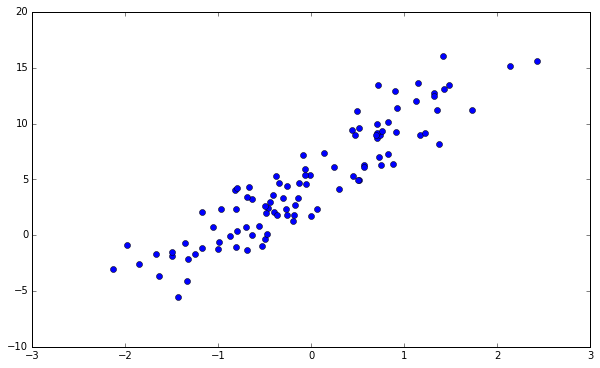

In [5]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(-3, 3), ylim=(-10, 20))
ax.plot(X[:,0],y,'o')
plt.show()

Now we build our first model using the method ```LinearRegression``` from the package ```scikit-learn```. Notice that when you work with ```scikit-learn``` training different models is very similar. Usually, training contains the following steps:
1) Create a class for the model and define all parameters
2) Use the method fit to train the model on the training examples
3) Use the method predict or predict\_proba to obtain predictions on the test examples.

In our example we do not have any test examples, that is why we train the linear regression model and obtain the coefficients from our model.

In [7]:
model = LinearRegression()
model.fit(X,y)
intercept = model.intercept_
slope = model.coef_[0]
best_fit = X[:,0] * slope + intercept
print "Parameters thetas: " + str(round(model.intercept_,2)) + ", " + ", ".join([str(round(x,2)) for x in model.coef_])

Parameters thetas: 4.98, 4.83


Finally, we visualize our data along with the regression line.

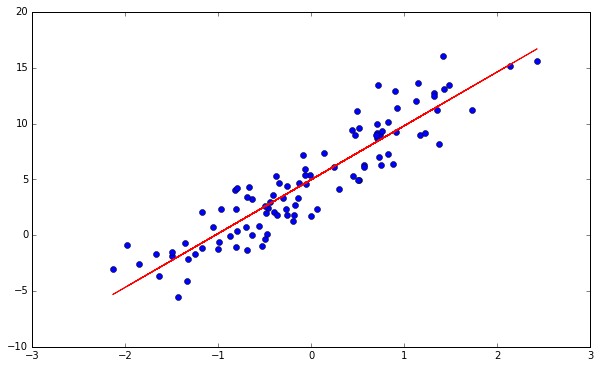

In [8]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(-3, 3), ylim=(-10, 20))
ax.plot(X[:,0],y,'o')
line, = ax.plot([], [], lw=2)
plt.plot(X[:,0], best_fit, 'k-', color = "r")
plt.show()

# Gradient Descent

The idea of Gradient Descent is to change $x$ by small value in the direction of the gradient. Consider some quadratic function, for example, $f(x) = x^2 - 6x + 5$:

Local minimum occurs at 3.05.



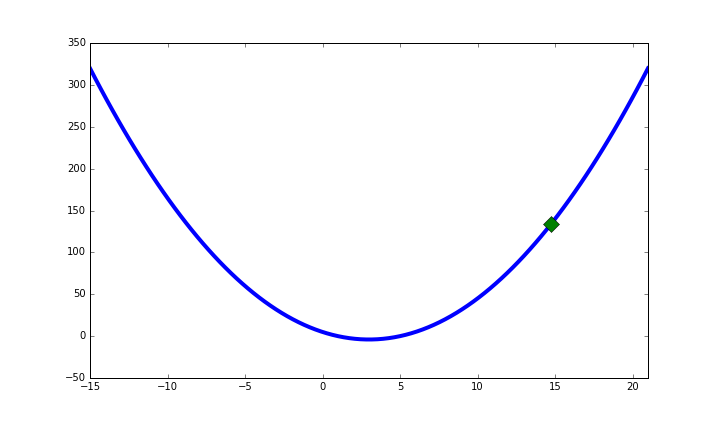
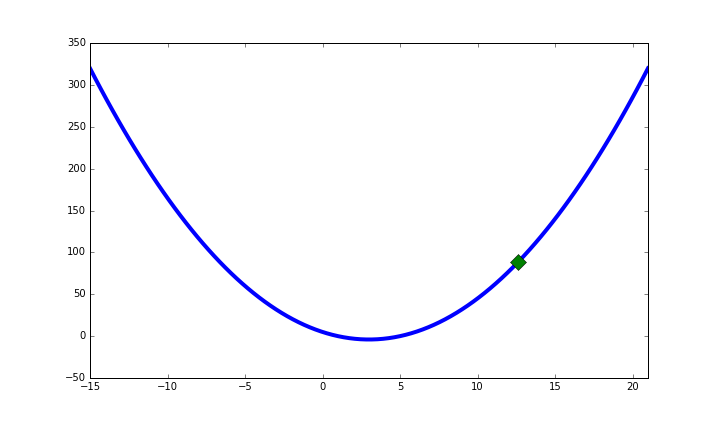
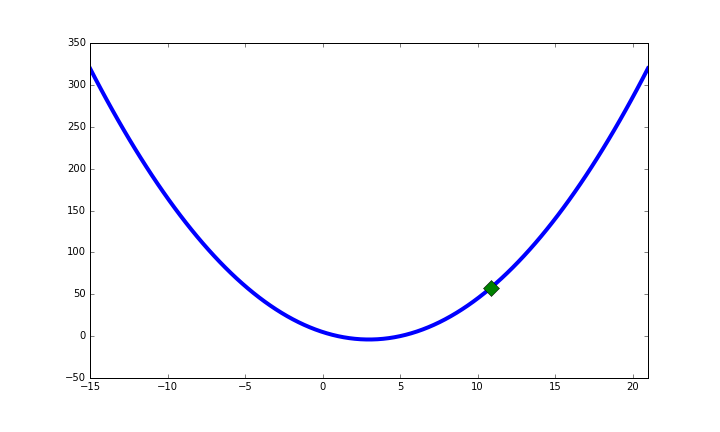
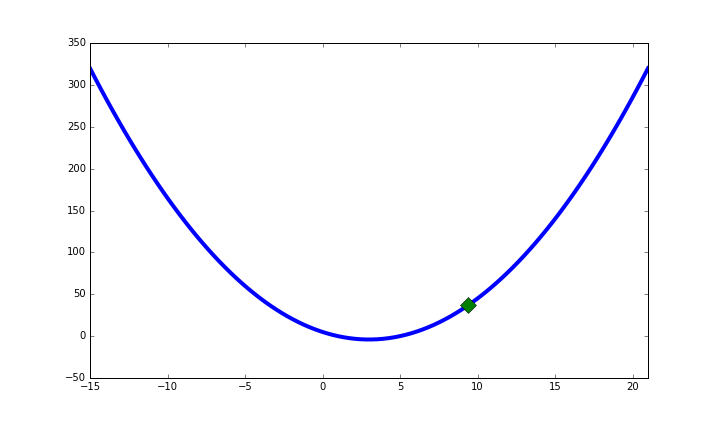
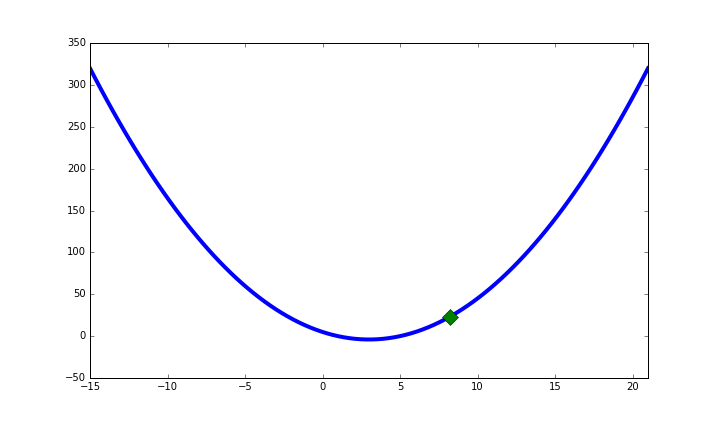
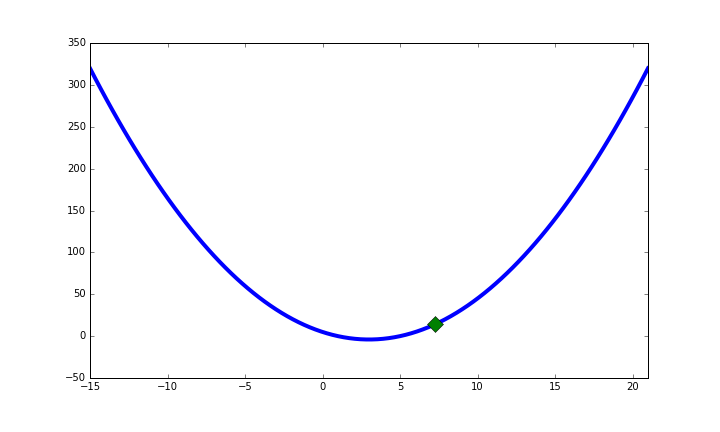
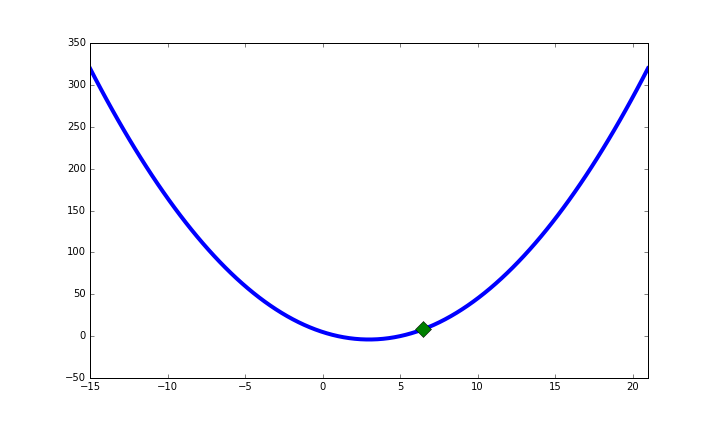
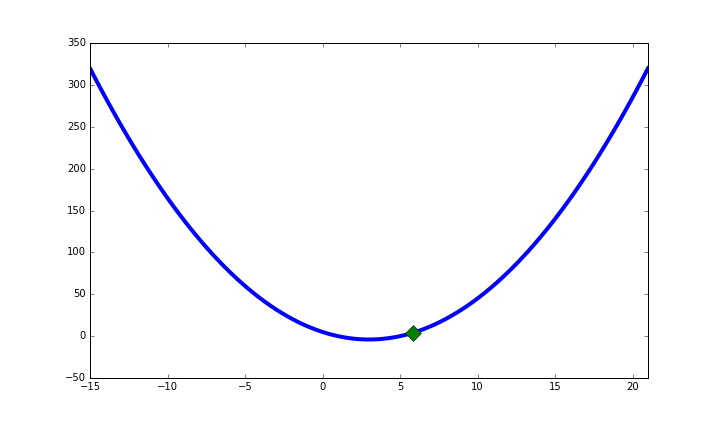
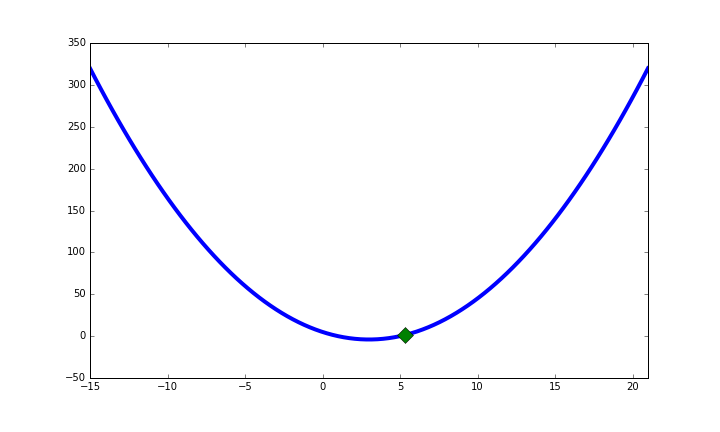
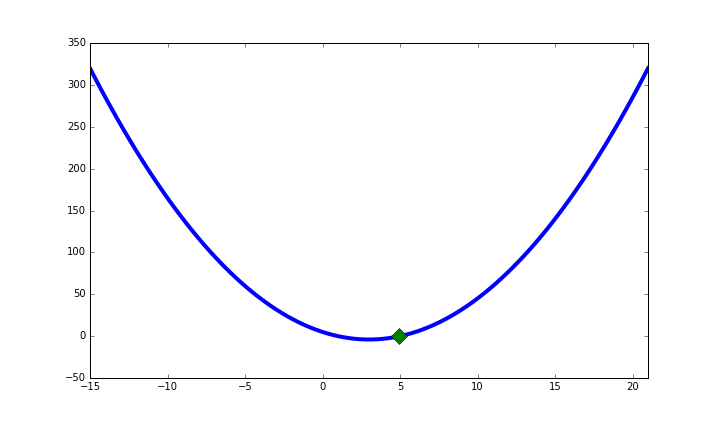
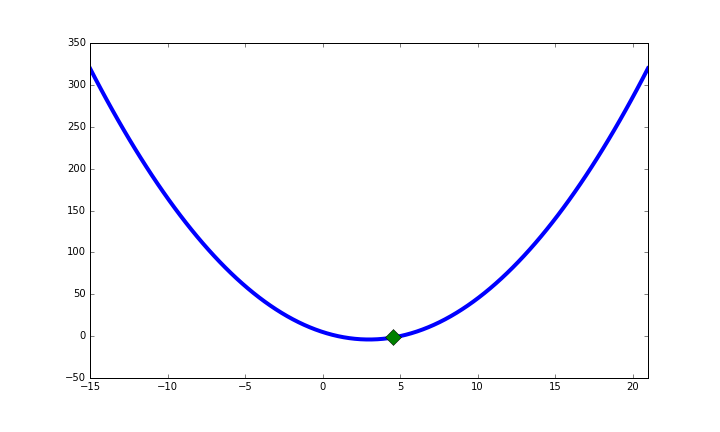
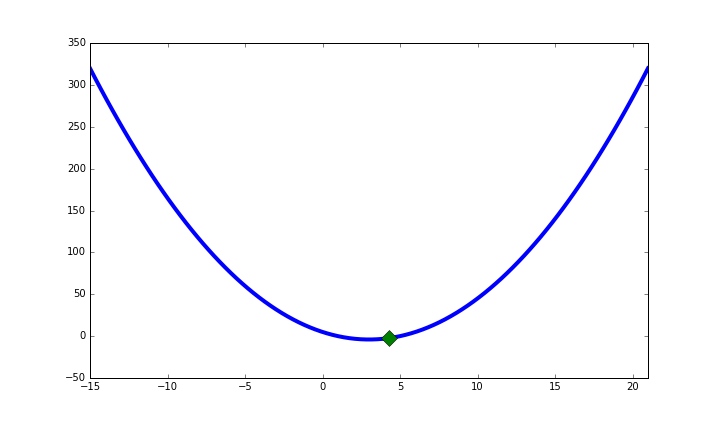
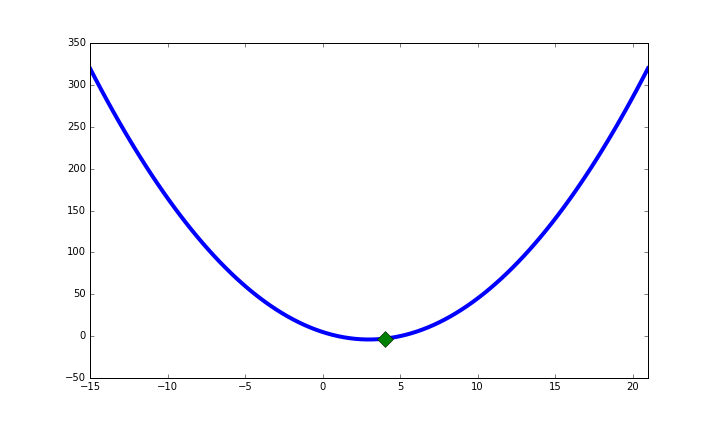
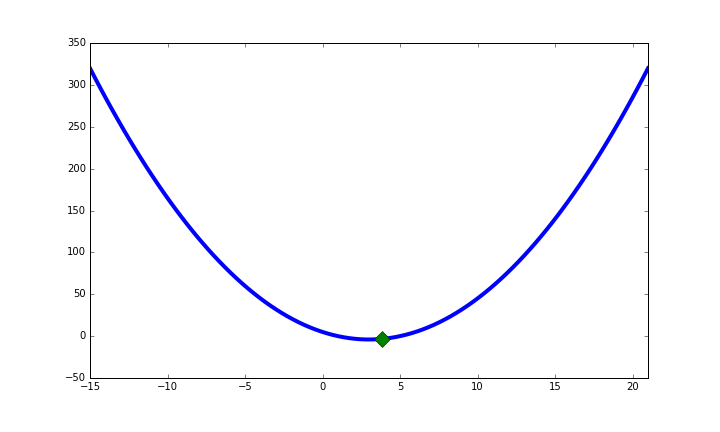
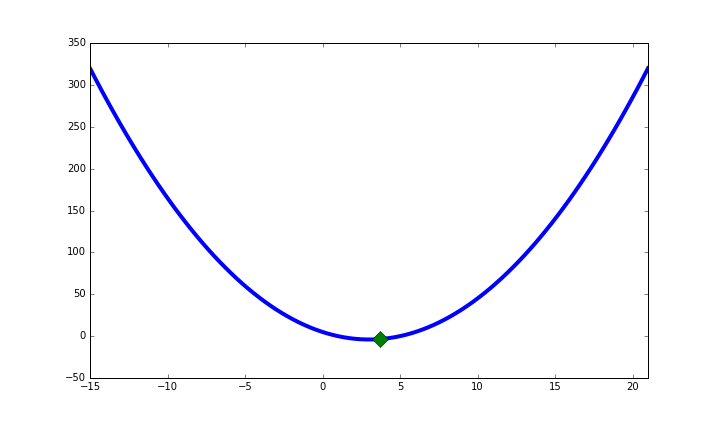
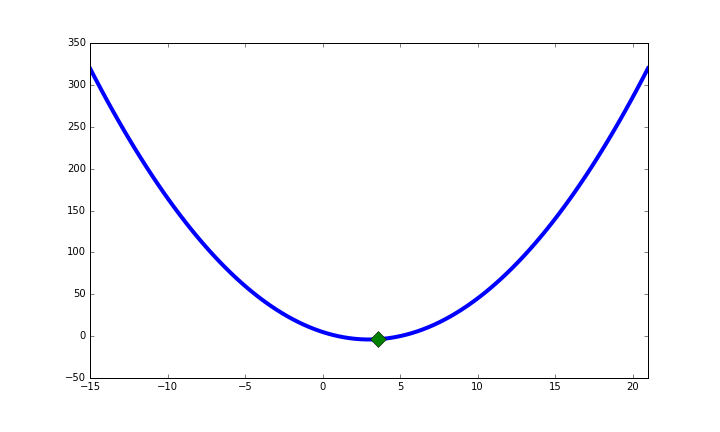
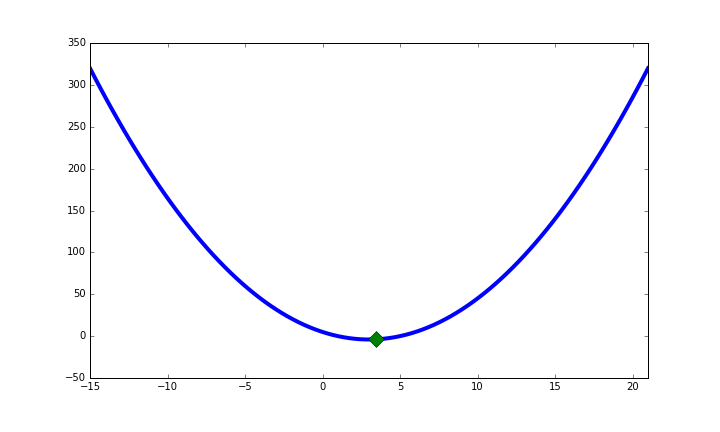
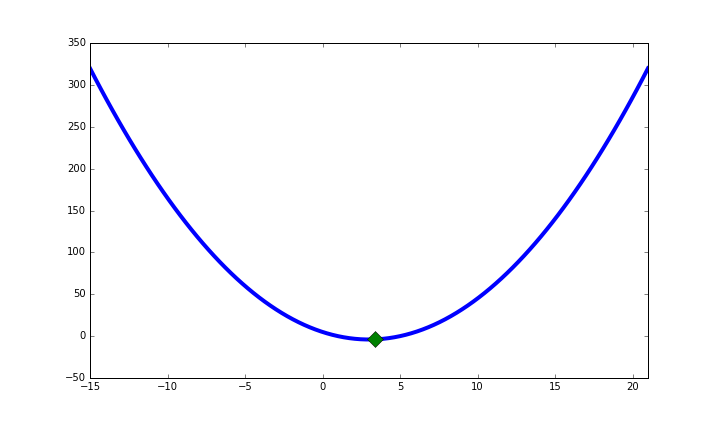
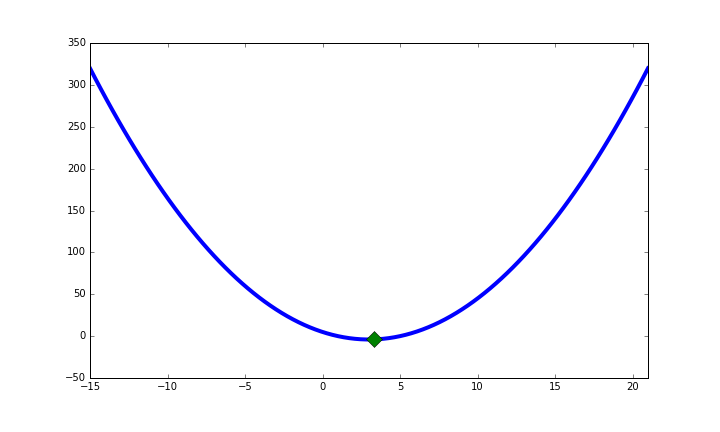
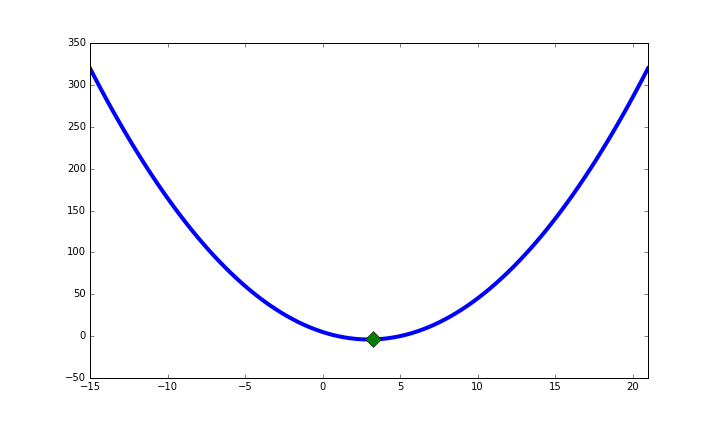
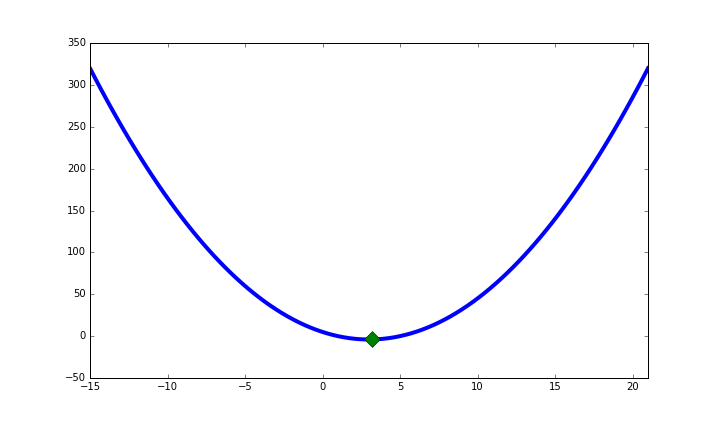
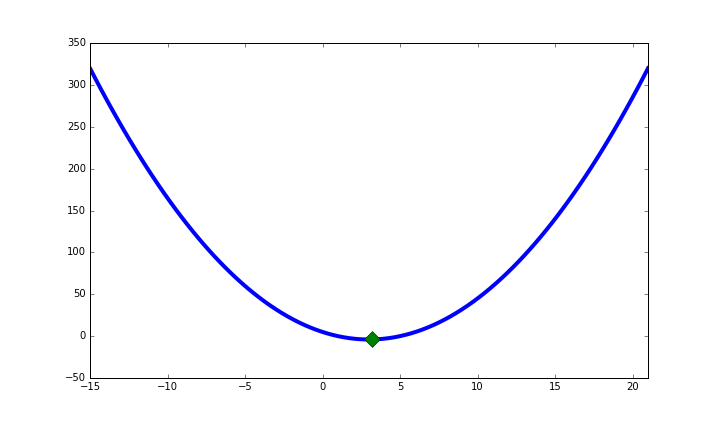
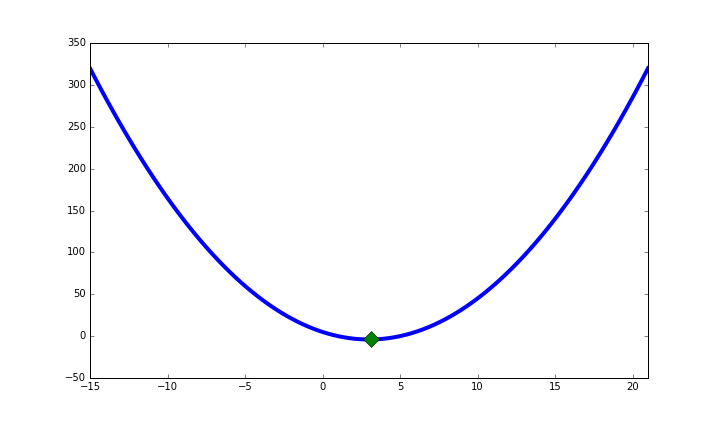
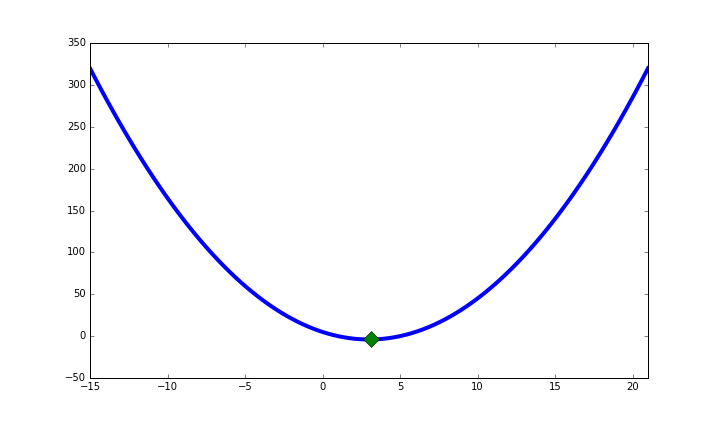
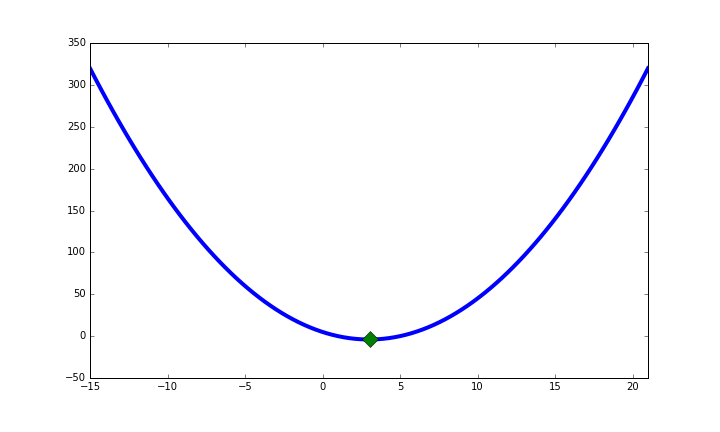
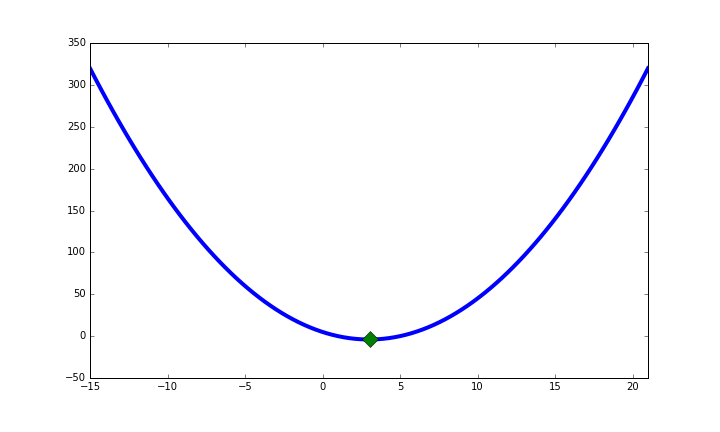
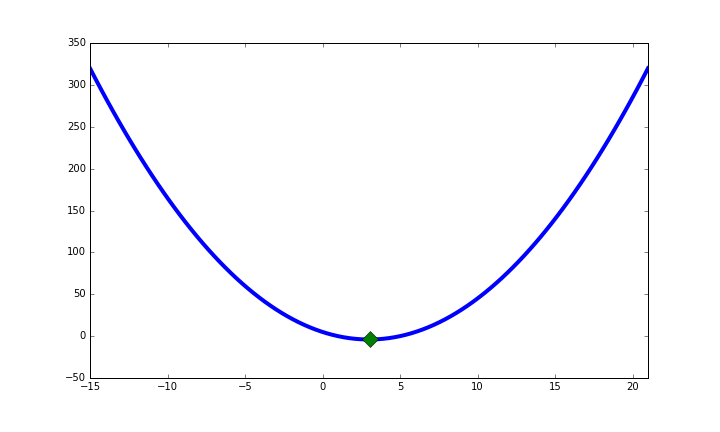
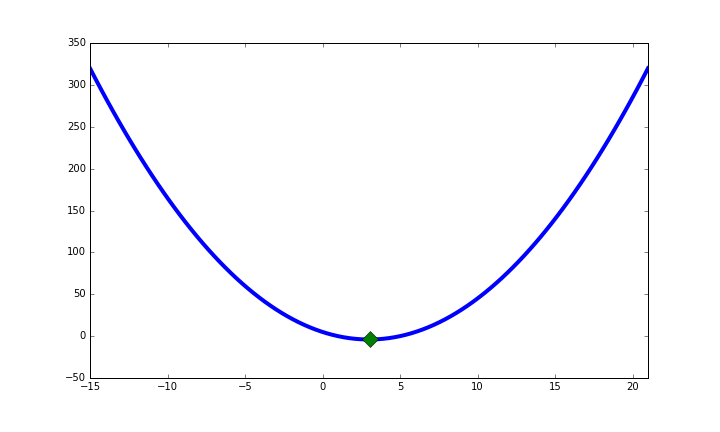

In [4]:
def init():
    line.set_data([], [])
    return line,

def animate(i):
    x_n = mins[0::10][i]
    y_n = x_n**2-6*x_n+5
    line.set_data(x_n, y_n)
    return line,

x = np.linspace(-15,21,100)
f = x**2-6*x+5

old_min = 0
temp_min = 15
step_size = 0.01
precision = 0.001
 
def f_derivative(x):
    return 2*x -6

mins = []
cost = []

while abs(temp_min - old_min) > precision:
    old_min = temp_min 
    gradient = f_derivative(old_min) 
    move = gradient * step_size
    temp_min = old_min - move
    cost.append((3-temp_min)**2)
    mins.append(temp_min)
 
print("Local minimum occurs at {}.".format(round(temp_min,2)))

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(xlim=(-15, 21), ylim=(-50, 350))
ax.plot(x,f, linewidth=4 )
line, = ax.plot([], [], "D", markersize=12)
animation.FuncAnimation(fig, animate, init_func=init,
                        frames=len(mins[0::10]), interval=200)

We can apply Gradient Descent for the function of many variables, for example, $z = x^2 + y^2$:

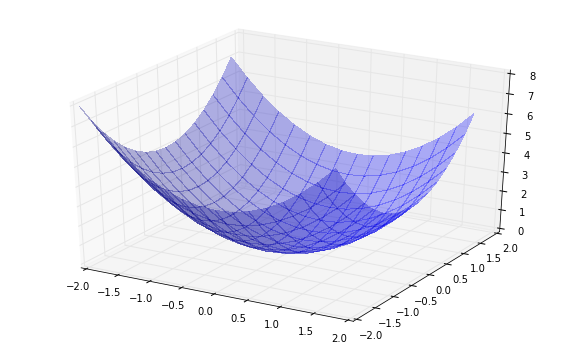

In [5]:
def fun(a,b):
    return a**2 + b**2

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
plt.hold(True)
a = np.arange(-2, 2, 0.25)
b = np.arange(-2, 2, 0.25)
a, b = np.meshgrid(a, b)
c = fun(a,b)
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.3, 
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.01, 8.01)

plt.show()

The Gradient Descent algorithm for the function $z = x^2 + y^2$ can be implemented as follows:

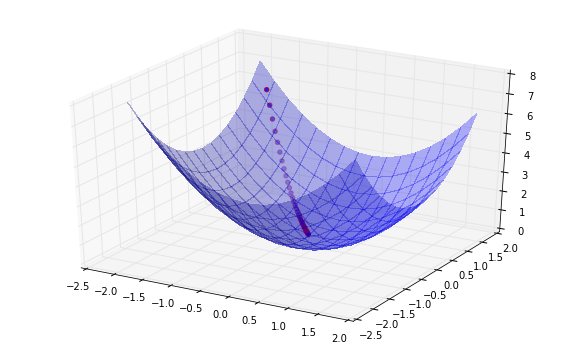

In [6]:
def gradient_descent(theta0, iters, alpha):
    history = [theta0] # to store all thetas
    theta = theta0 # initial values for thetas
    for i in range(iters):
        gradient = [2.0*x for x in theta]
        theta = [a - alpha*b for a,b in zip(theta, gradient)]  # update
        history.append(theta)
    return history

history = gradient_descent(theta0 = [-1.8, 1.6], iters = 30, alpha = 0.03)

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
plt.hold(True)
a = np.arange(-2, 2, 0.25)
b = np.arange(-2, 2, 0.25)
a, b = np.meshgrid(a, b)
c = fun(a,b)
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.3, 
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.01, 8.01)

a = np.array([x[0] for x in history])
b = np.array([x[1] for x in history])
c = fun(a,b)
ax.scatter(a, b, c, color="r"); 

plt.show()

Unfortunately, if the function has many extrema, then the Gradient Descent could find the local minimum instead of global minimum. One trick is to overcome this disadvantage is to run SGD several times with different initial values for $x$. Here is an example of function where Gradient Descent could be not effective:

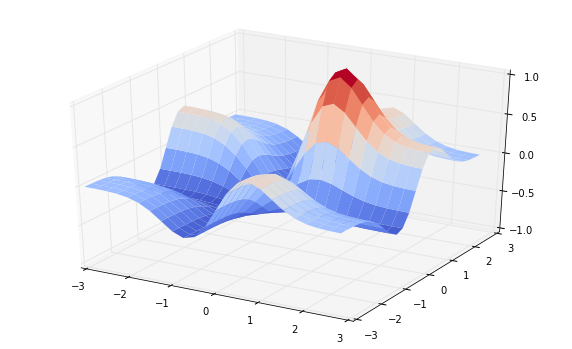

In [7]:
def fun(a,b):
    return 2*a*b*np.exp(-a**2 - b**2) + a*np.exp(-a**2) + b*np.exp(-b**2)

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
plt.hold(True)
a = np.arange(-3, 3, 0.25)
b = np.arange(-3, 3, 0.25)
a, b = np.meshgrid(a, b)
c = fun(a,b)
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=True)
ax.set_zlim(-1.01, 1.01)

plt.show()

# Gradient Descent for Linear Regression (one feature)

For the linear regression we consider the cost function $J(\theta) = \dfrac{1}{2} \sum\limits_{j=1}^{100} (h_{\theta} (x^{(j)}) - y^{(j)})^2$. If we have just one feature this function is a function of two variables, because we should add the bias term to the set of features:

In [8]:
X_bias = np.c_[np.ones(X.shape[0]), X]

As we can see the cost function $J(\theta)$ is a quadratic function of several variables:

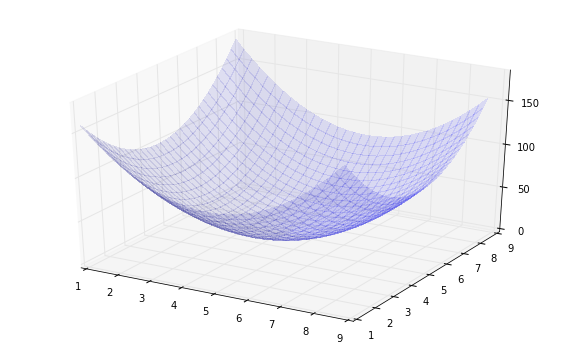

In [9]:
def cost_function(x, y, theta):
    return np.sum((np.dot(x, theta) - y) ** 2)/(2*10)

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
plt.hold(True)
a = np.arange(1, 9, 0.25)
b = np.arange(1, 9, 0.25)
a, b = np.meshgrid(a, b)
c = np.array([cost_function(X_bias,y,theta) for theta in zip(a.reshape(-1), b.reshape(-1))]).reshape(a.shape[0],-1)
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.1, 
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.01, 180.01)

plt.show()

The following code implements the Batch Gradient Descent algorithm for the linear regression:

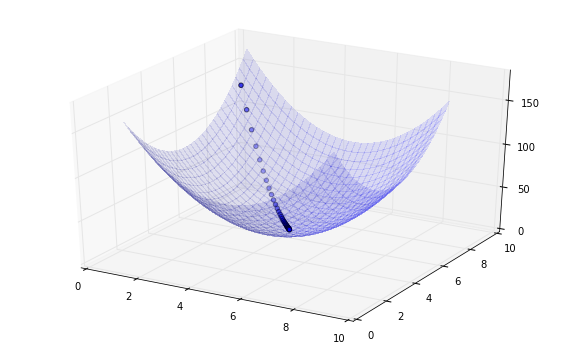

In [10]:
def batch_gradient_descent(x, y, theta0, iters, alpha):
    costs = []
    m = y.size # number of data points
    theta = theta0 # random start
    history = [theta] # to store all thetas
    preds = []
    for i in range(iters):
        pred = np.dot(x, theta)
        error = pred - y 
        cost = cost_function(x, y, theta)
        costs.append(cost)
        
        if i % 25 == 0: preds.append(pred)

        gradient = x.T.dot(error)
        theta = theta - alpha * gradient  # update
        history.append(theta)
        
    return history, costs, preds

history, costs, preds = batch_gradient_descent(X_bias, y, theta0 = [1.2, 8], iters = 30, alpha = 0.001)

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
plt.hold(True)
a = np.arange(1, 9, 0.25)
b = np.arange(1, 9, 0.25)
a, b = np.meshgrid(a, b)
c = np.array([cost_function(X_bias,y,theta) for theta in zip(a.reshape(-1), b.reshape(-1))]).reshape(a.shape[0],-1)
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.1, 
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.01, 180.01)

a = np.array([x[0] for x in history])
b = np.array([x[1] for x in history])
c = [cost_function(X_bias, y, theta) for theta in zip(a,b)]
ax.scatter(a, b, c, color="k"); 

plt.show()

As you can see, the algorithm found the fastest path to the minimum. Compare it with the Stochastic Gradient Descent, which does not find the shortest path, but in most cases it is much faster because it does not use all training examples to update the parameters:

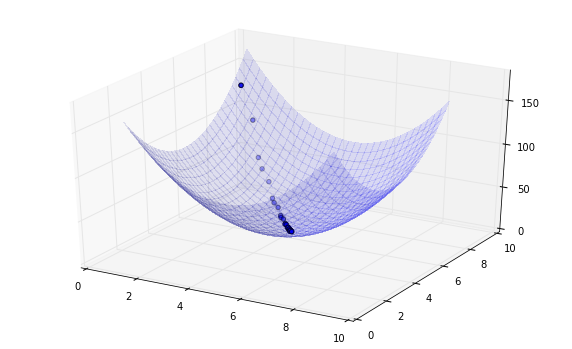

In [11]:
def stochastic_gradient_descent(x, y, theta0, iters, alpha):
    costs = []
    m = y.size # number of data points
    theta = theta0 # random start
    history = [theta] # to store all thetas
    for i in range(iters):
        for j in range(m):
            pred = np.dot(x[j,:], theta)
            error = pred - y[j]
        
            gradient = error * x[j,:]
            theta = theta - alpha * gradient  # update
            if j % 40 == 0: history.append(theta)
        
    return history, costs

history, costs = stochastic_gradient_descent(X_bias, y, theta0 = [1.2, 8], iters = 10, alpha = 0.005)

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
plt.hold(True)
a = np.arange(1, 9, 0.25)
b = np.arange(1, 9, 0.25)
a, b = np.meshgrid(a, b)
c = np.array([cost_function(X_bias,y,theta) for theta in zip(a.reshape(-1), b.reshape(-1))]).reshape(a.shape[0],-1)
surf = ax.plot_surface(a, b, c, rstride=1, cstride=1, alpha=0.1, 
                       linewidth=0, antialiased=False)
ax.set_zlim(-0.01, 180.01)

a = np.array([x[0] for x in history])
b = np.array([x[1] for x in history])
c = [cost_function(X_bias, y, theta) for theta in zip(a,b)]
ax.scatter(a, b, c, color="k"); 

plt.show()

When we apply the Gradient Descent algorithm to the linear regression our straight line gradually approaching to the line which fits our data in the best way:

In [12]:
def gradient_descent(x, y, iters, alpha):
    costs = []
    m = y.size # number of data points
    theta = np.random.rand(2) # random start
    history = [theta] # to store all thetas
    preds = []
    for i in range(iters):
        pred = np.dot(x, theta)
        error = pred - y 
        cost = np.sum(error ** 2) / (2 * m)
        costs.append(cost)
        
        if i % 25 == 0: preds.append(pred)

        gradient = x.T.dot(error)/m 
        theta = theta - alpha * gradient  # update
        history.append(theta)
        
    return history, costs, preds

alpha = 0.001 # set step-size
iters = 5000 # set number of iterations
history, cost, preds = gradient_descent(X_bias, y, iters, alpha)
theta = history[-1]
print "Parameters thetas after gradient descent: " + ", ".join([str(round(x,2)) for x in theta])
best_fit_gradient_descent = theta[0] + X[:,0] * theta[1]

Parameters thetas after gradient descent: 4.94, 4.77


Compare the results from our manual implementation of Gradient Descent with the previous result from scikit-learn:

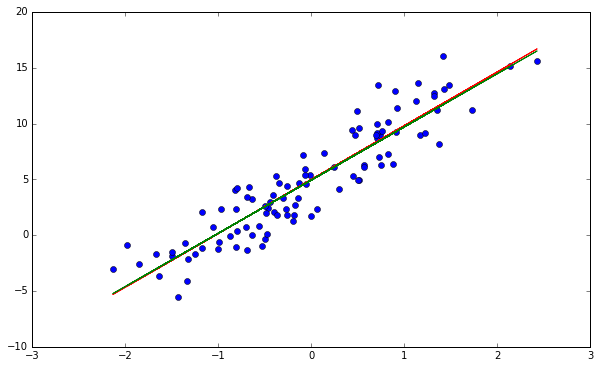

In [13]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(-3, 3), ylim=(-10, 20))
ax.plot(X[:,0],y,'o')
line, = ax.plot([], [], lw=2)
plt.plot(X[:,0], best_fit, 'k-', color = "r")
plt.plot(X[:,0], best_fit_gradient_descent, 'k-', color = "g")
plt.show()

And, finally, we want to show the animated plot how the Gradient Descent works:


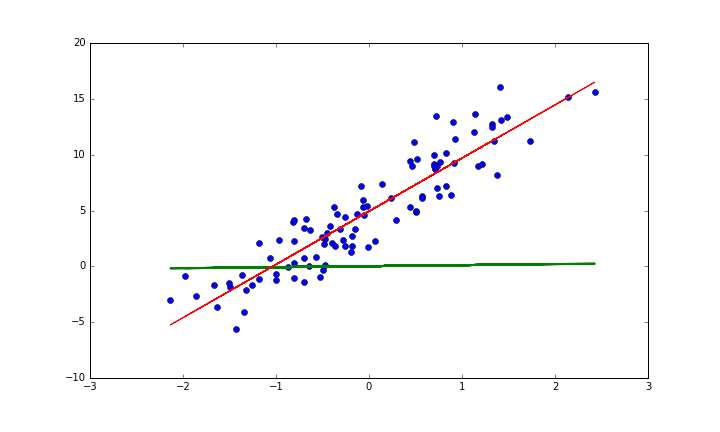
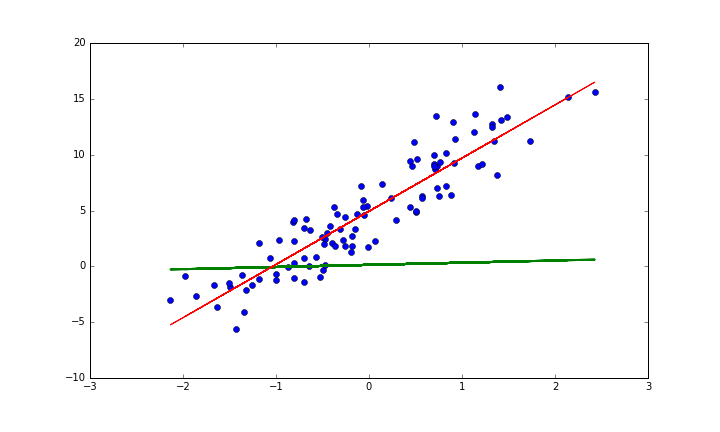
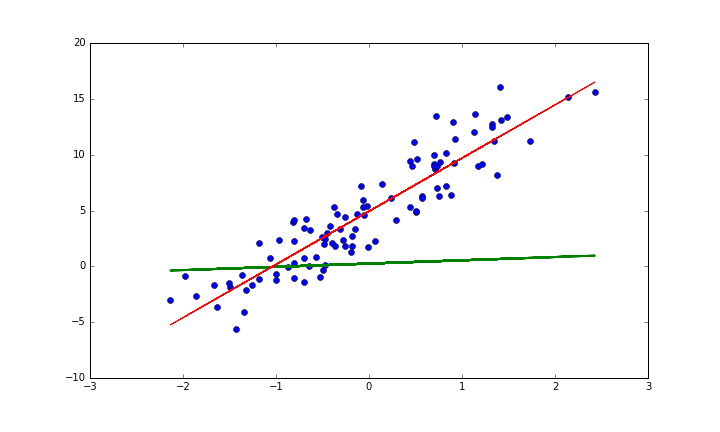
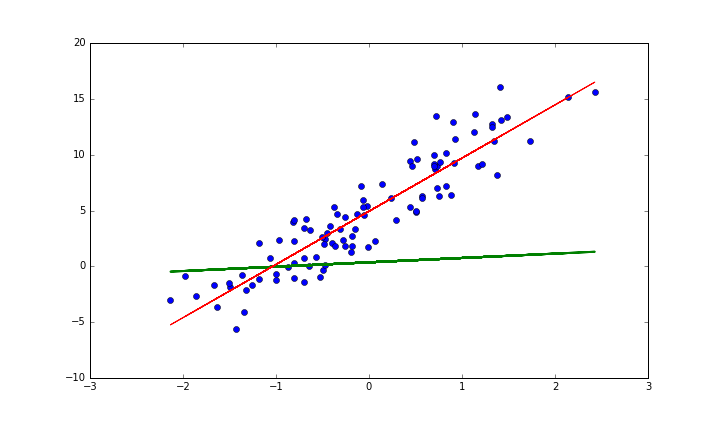
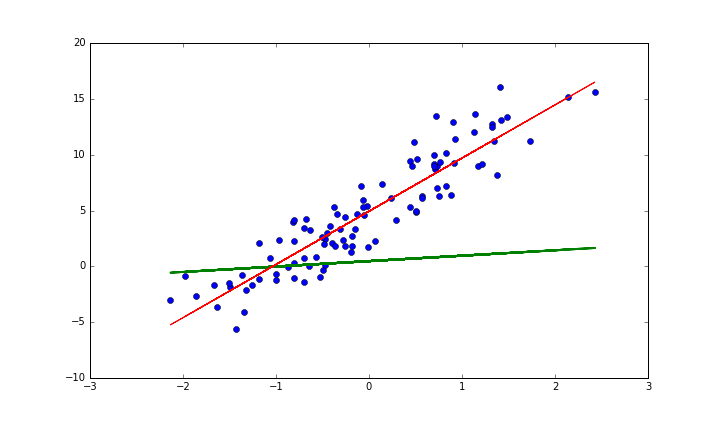
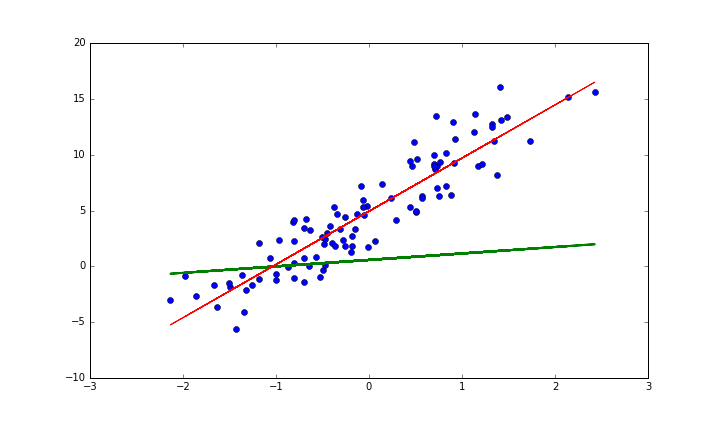
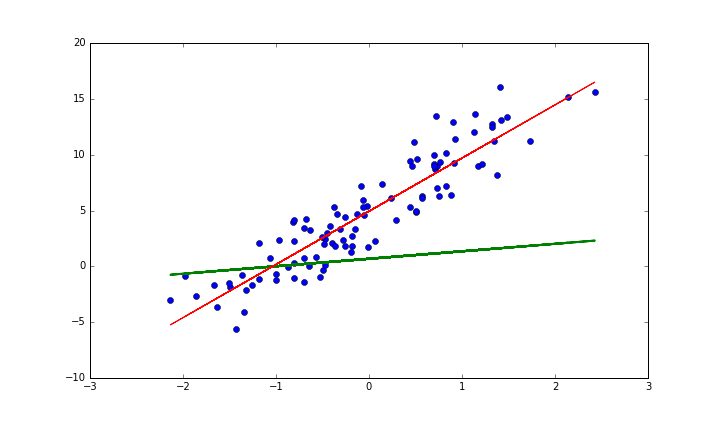
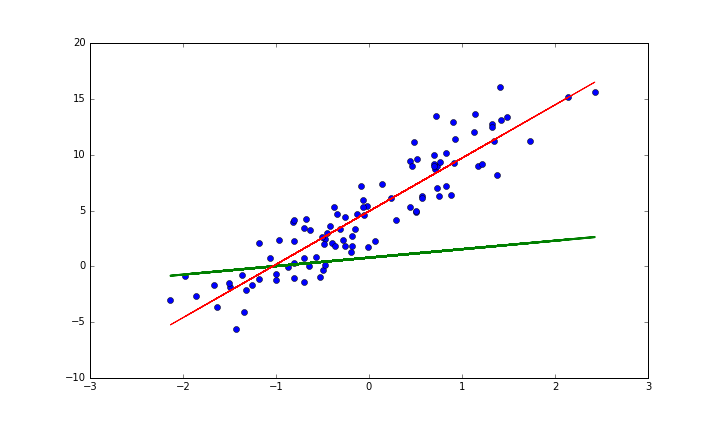
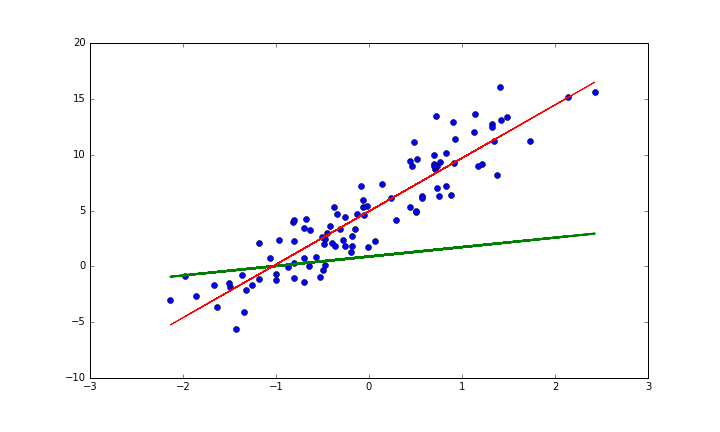
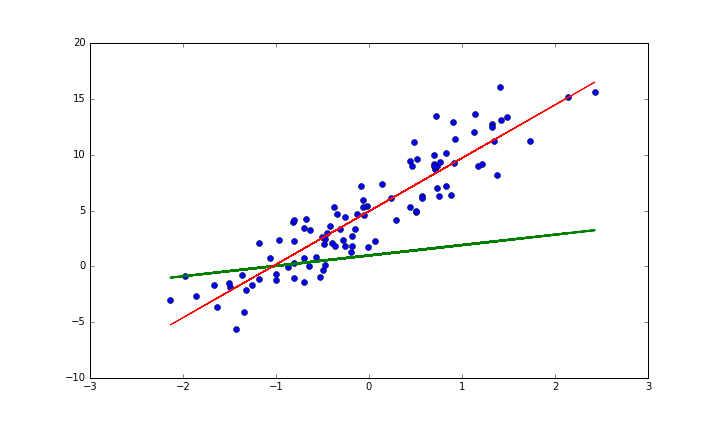
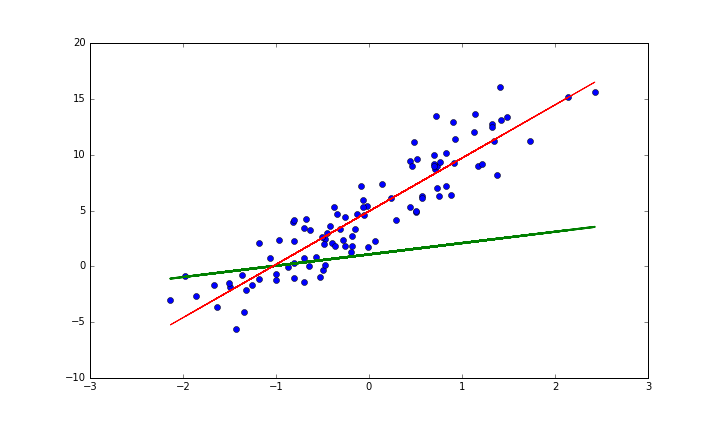
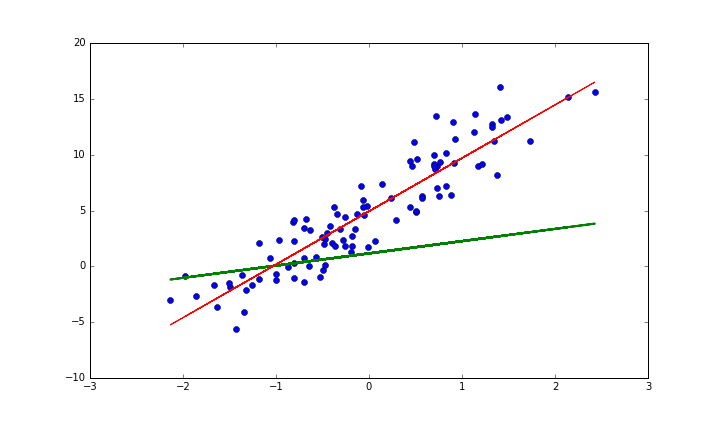
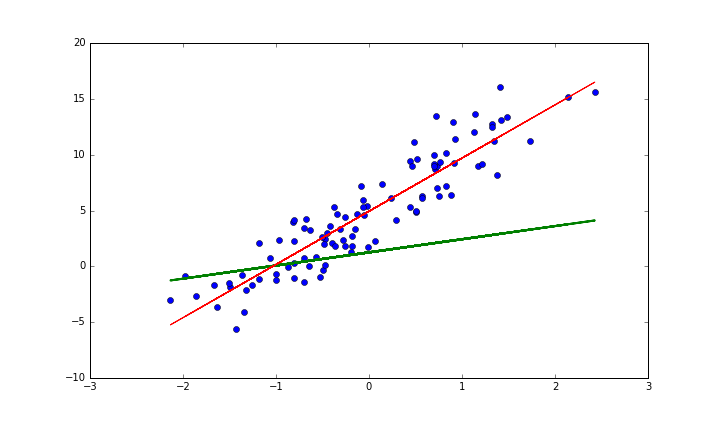
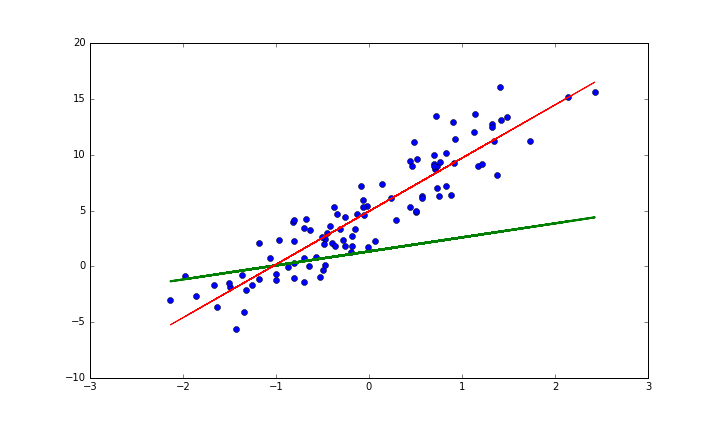
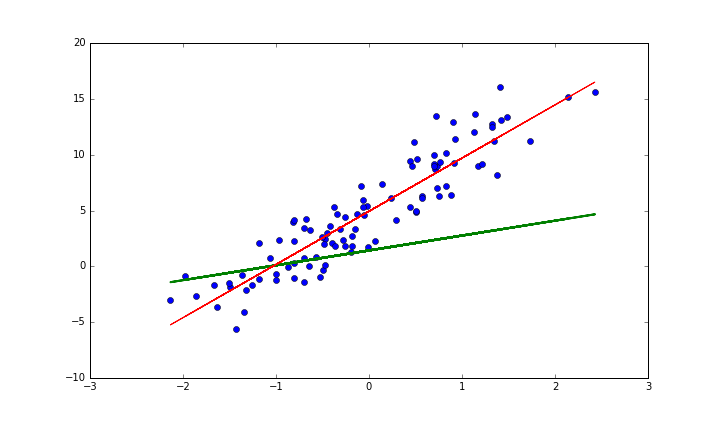
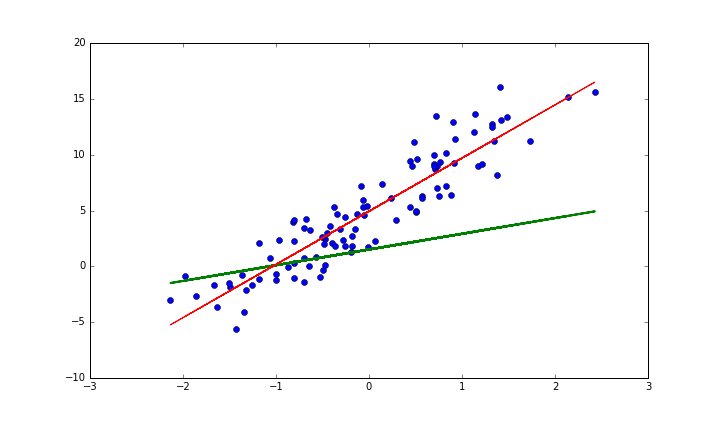
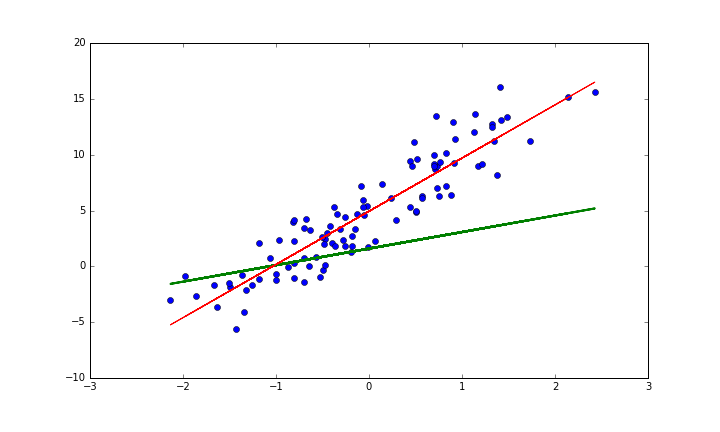
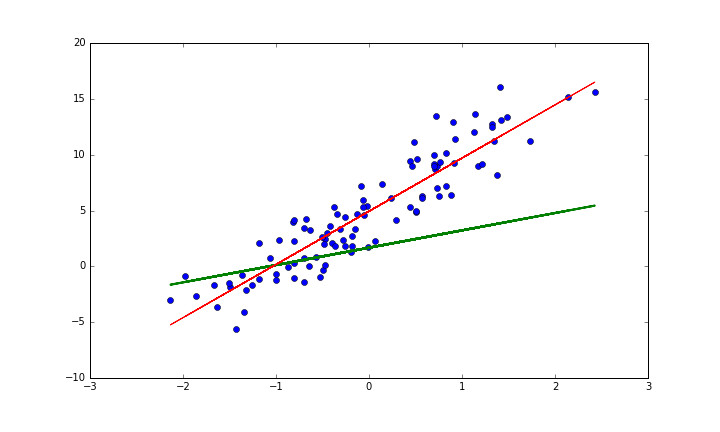
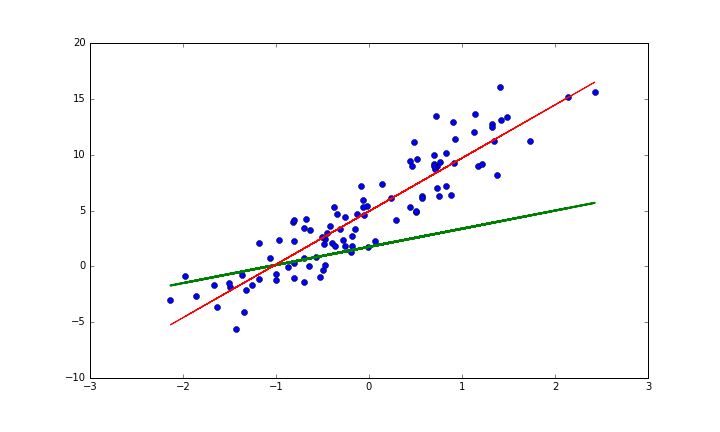
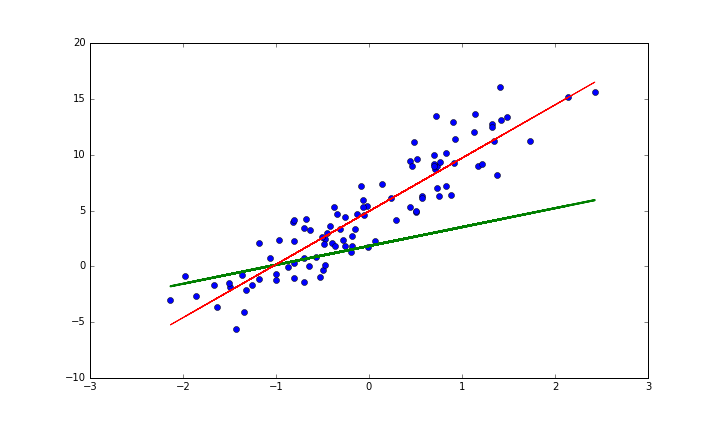
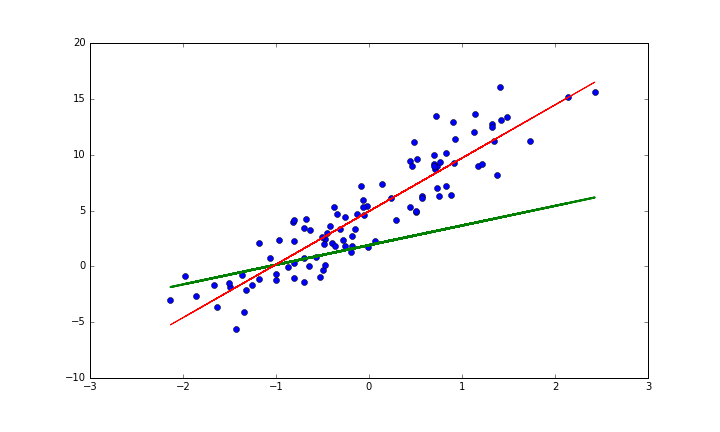
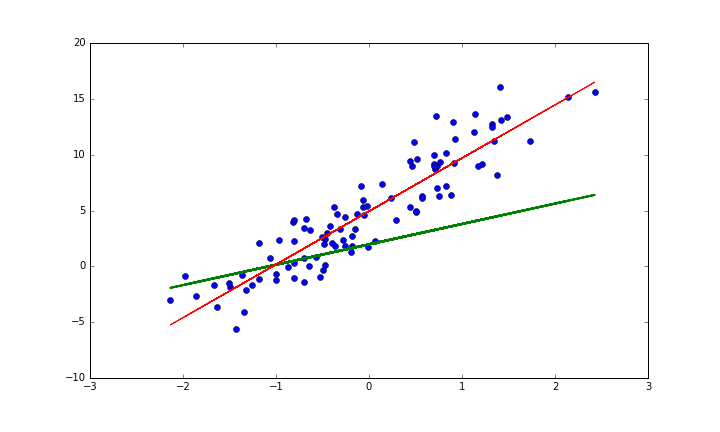
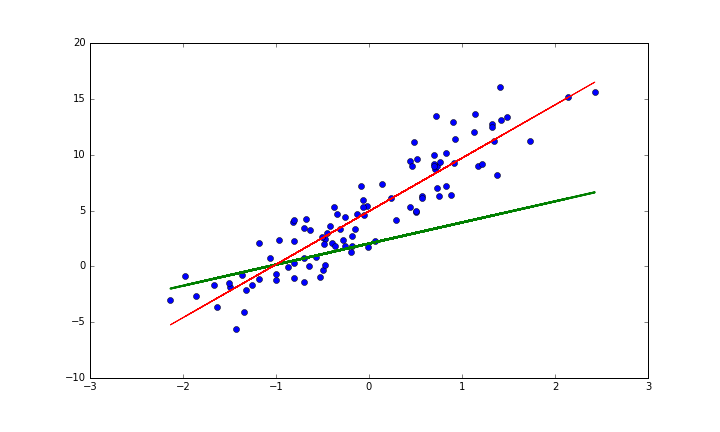
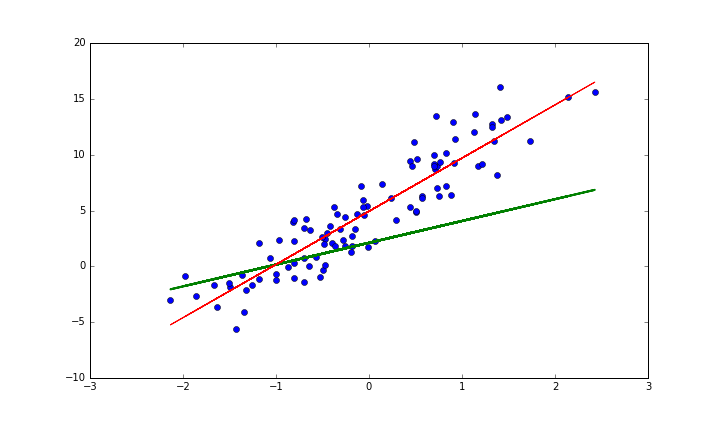
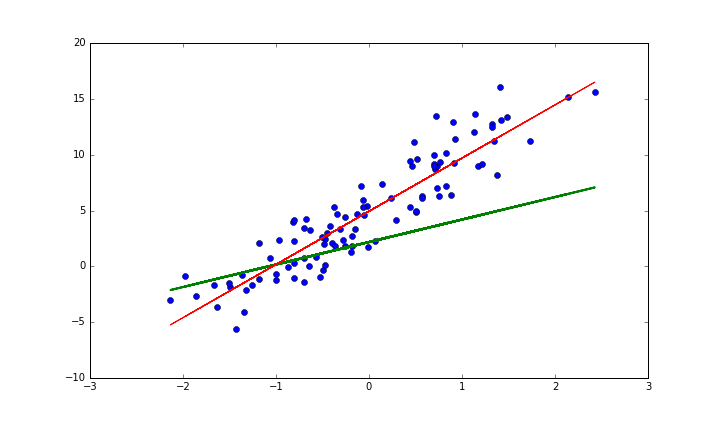
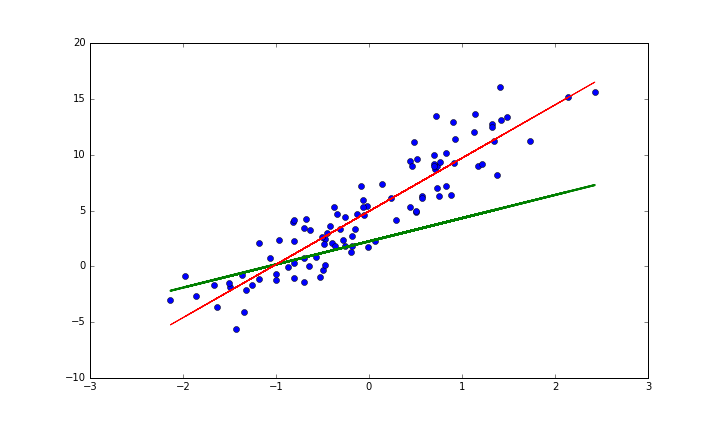
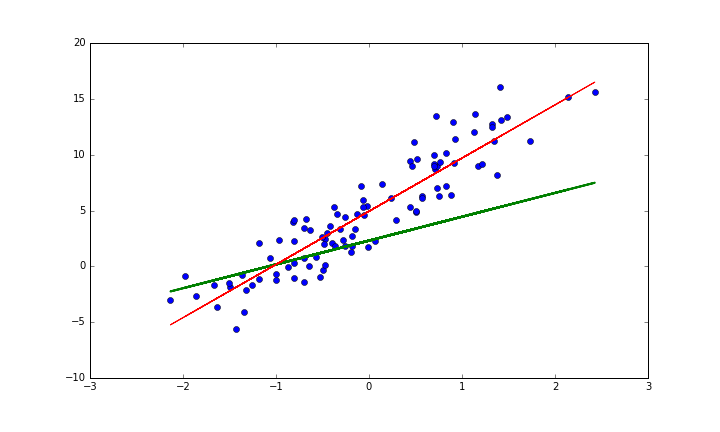
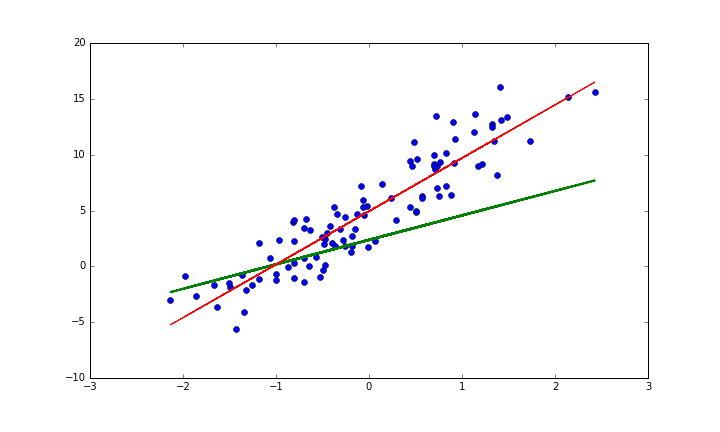
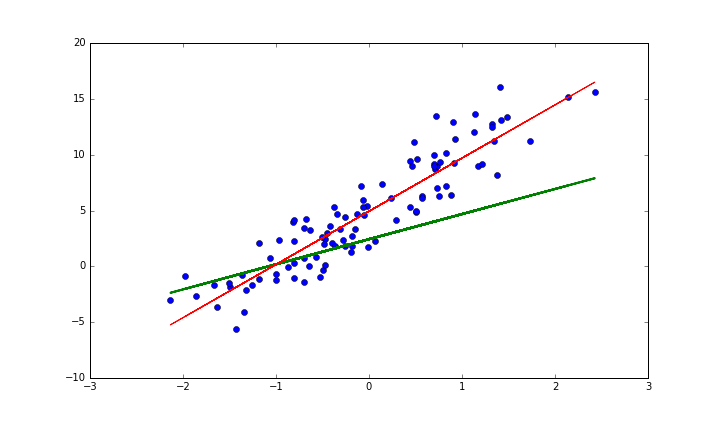
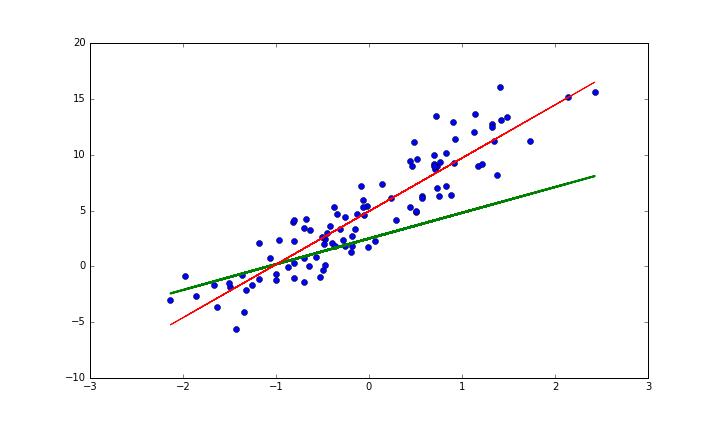
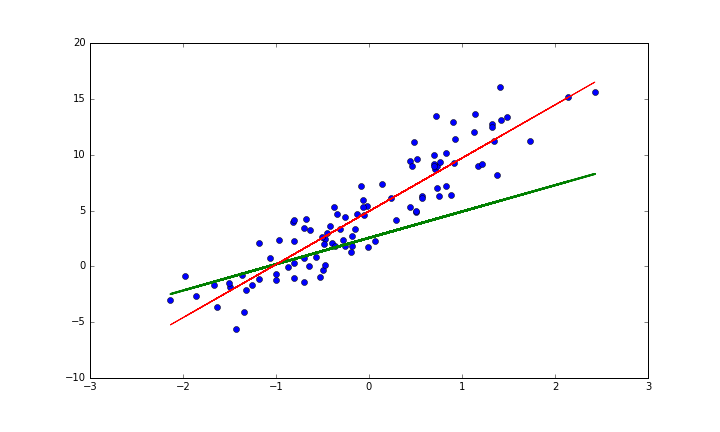
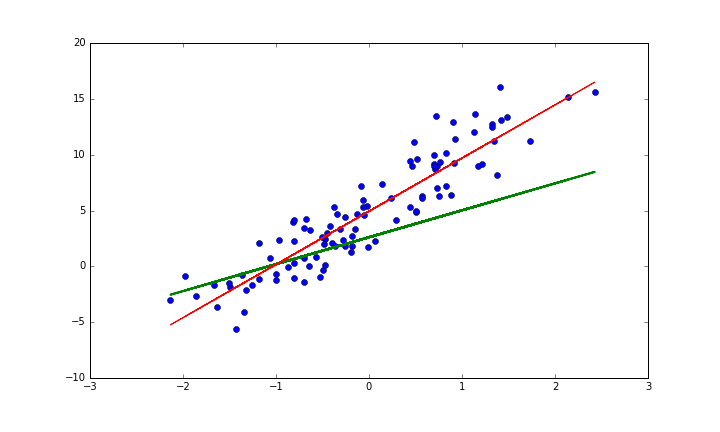
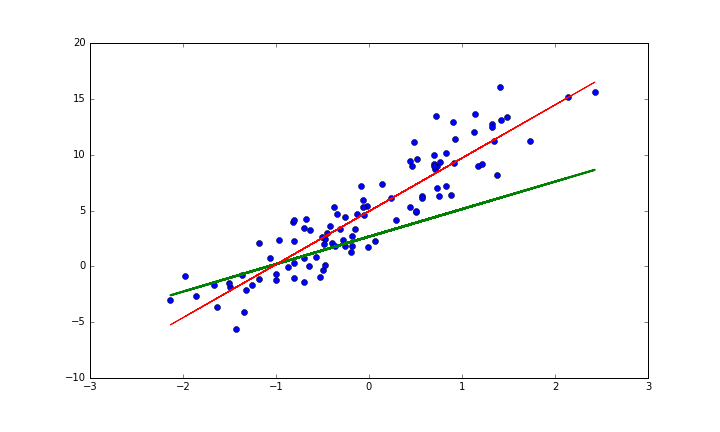
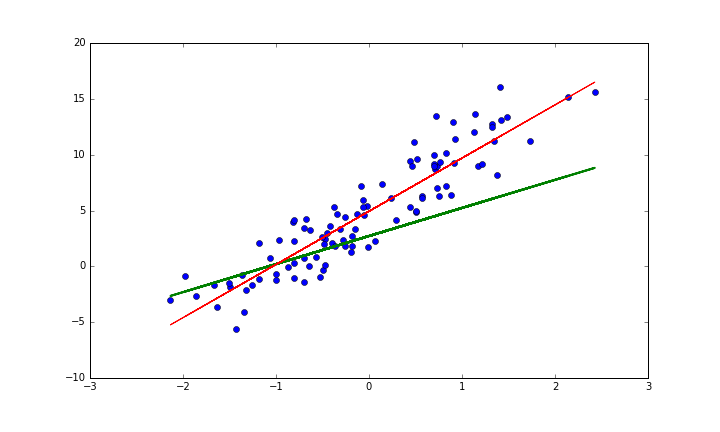
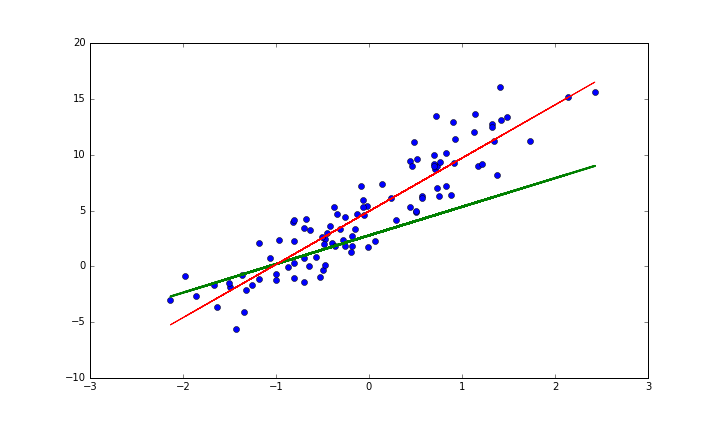
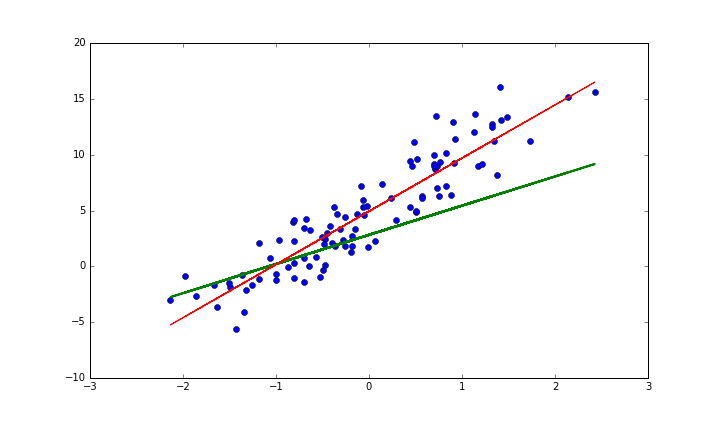
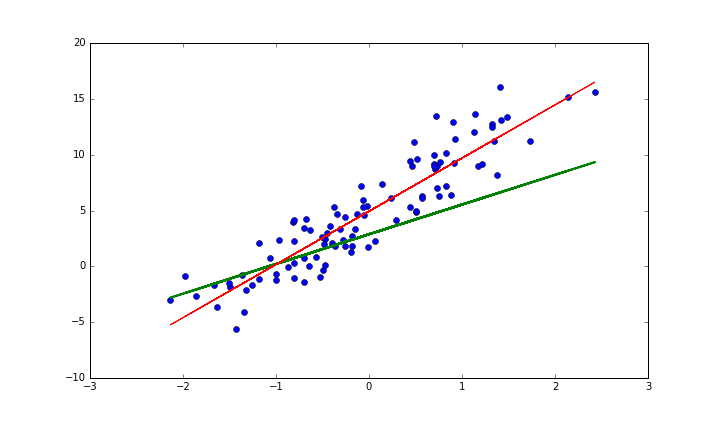
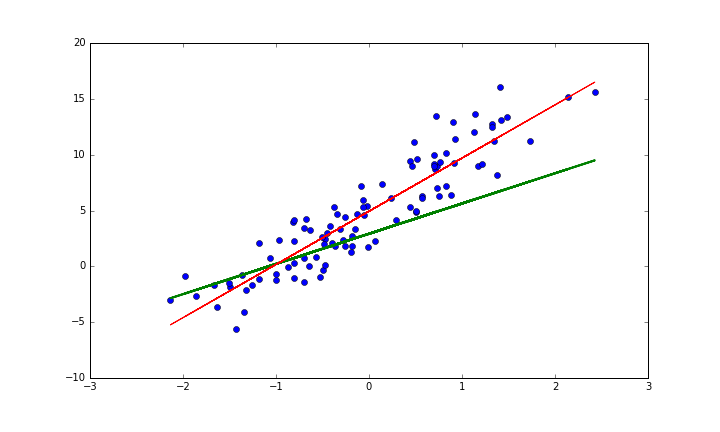
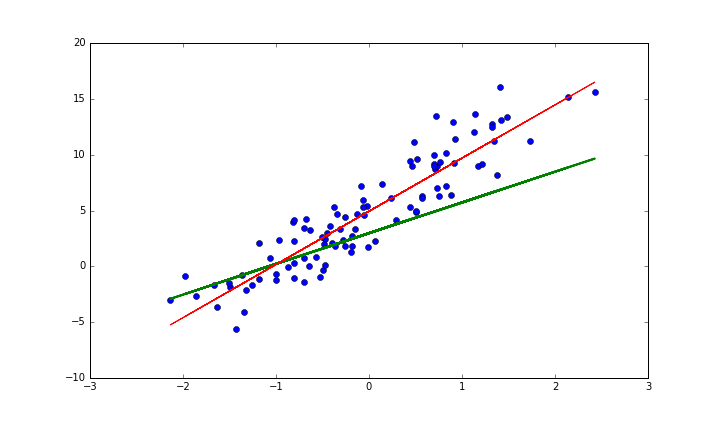
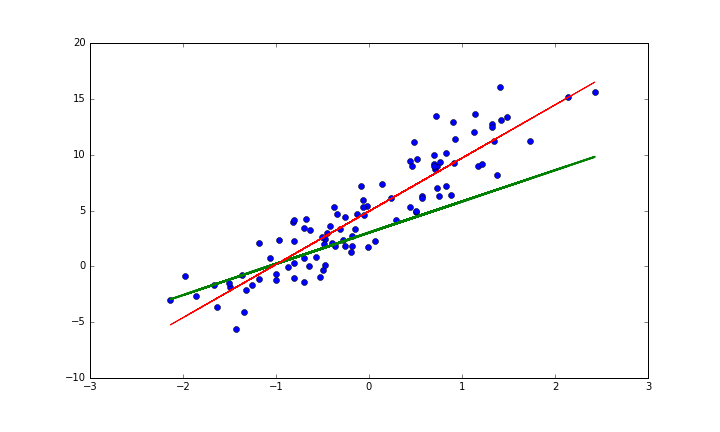
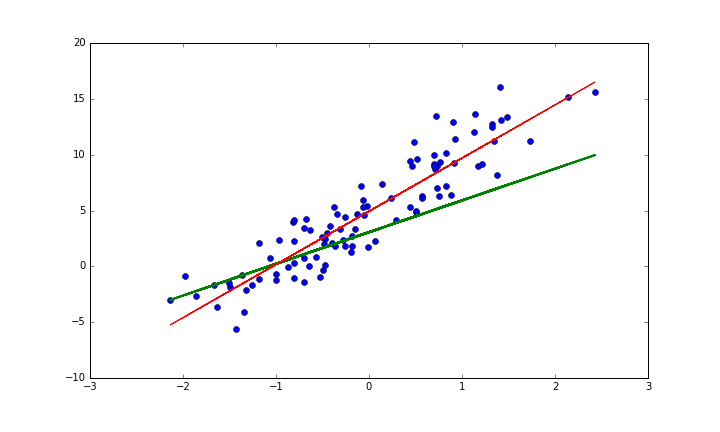
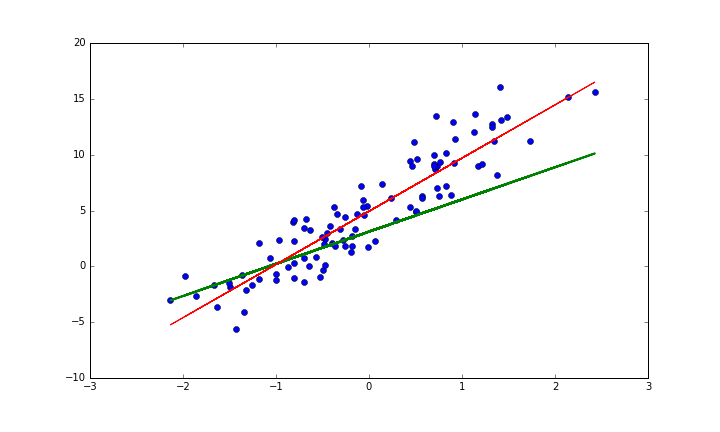
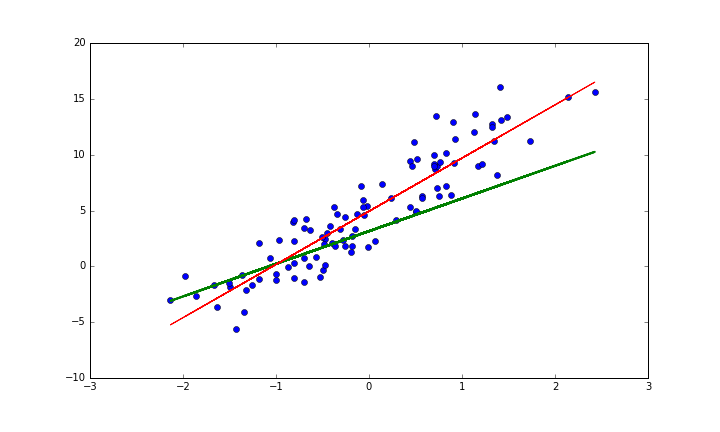
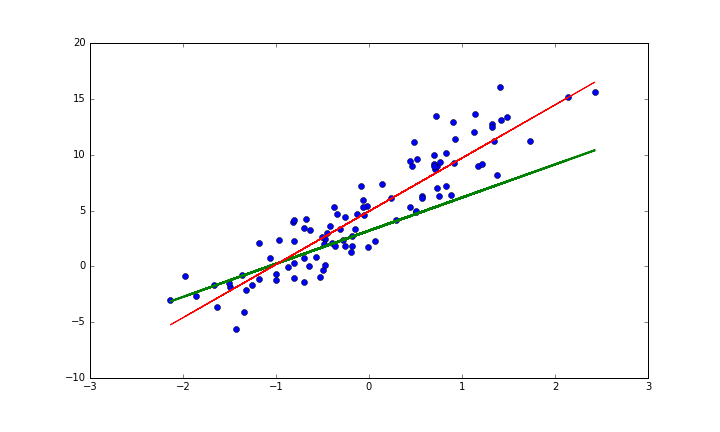
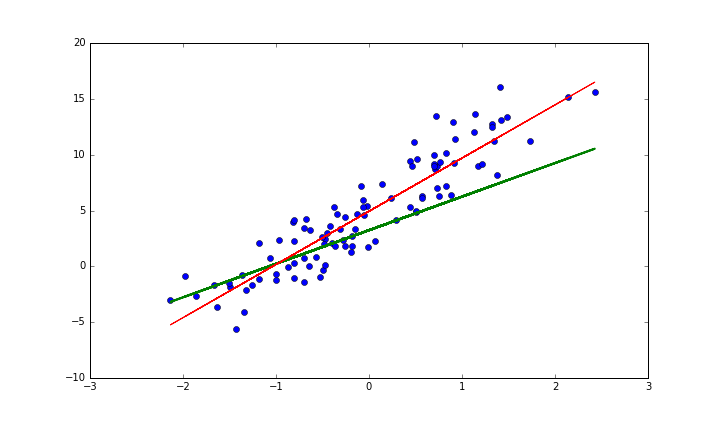
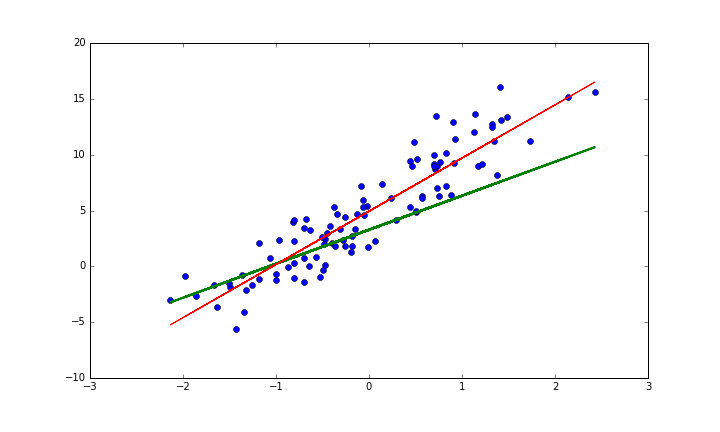
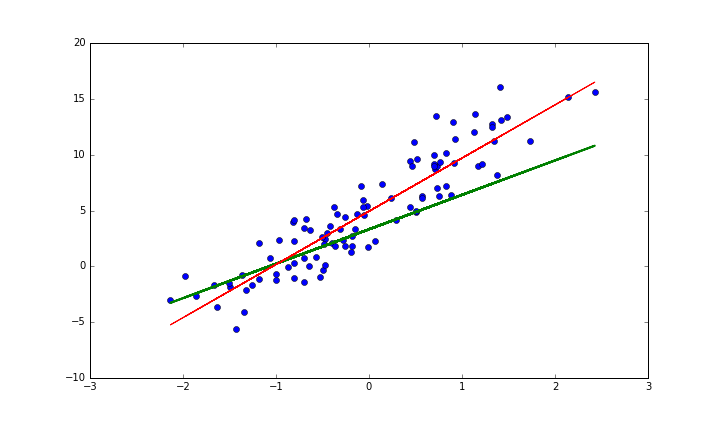
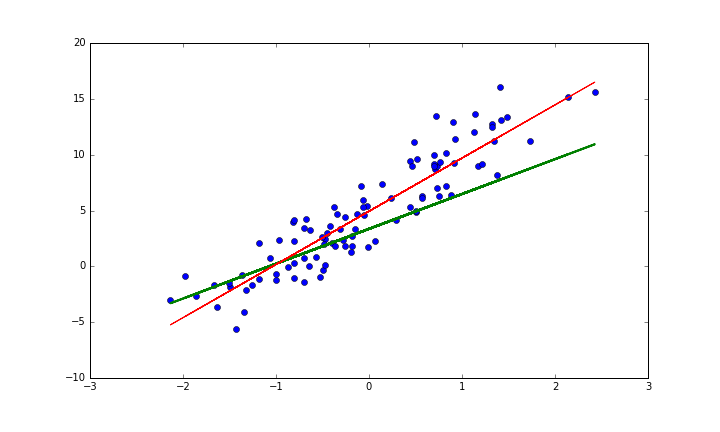
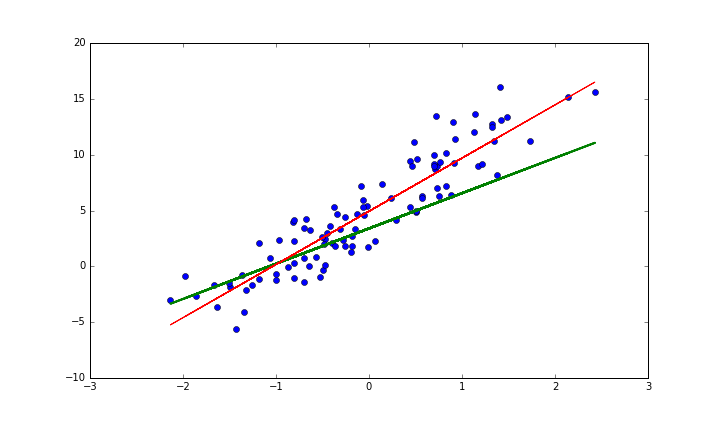
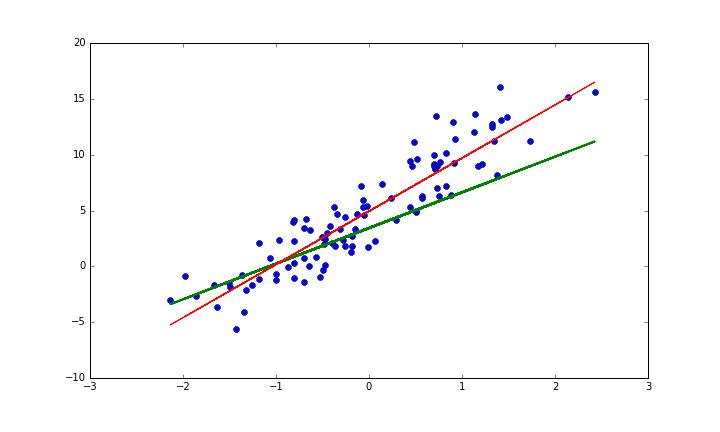
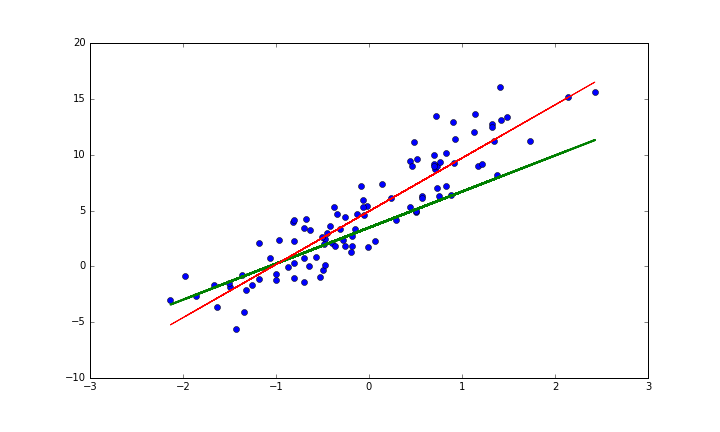
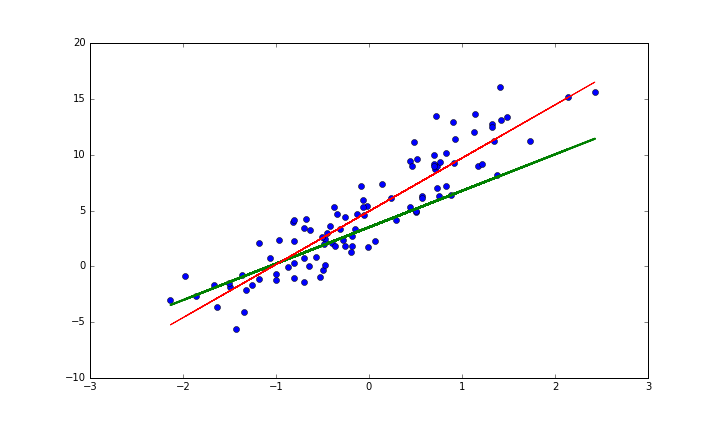
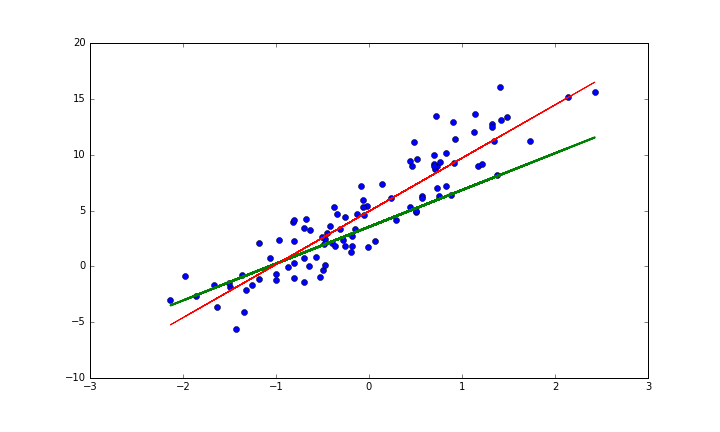
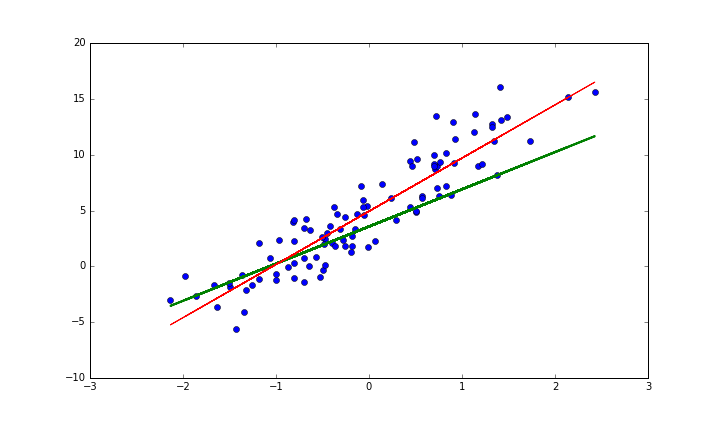
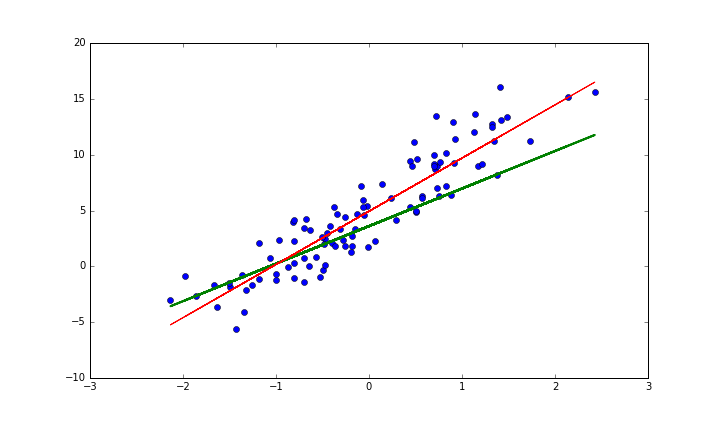
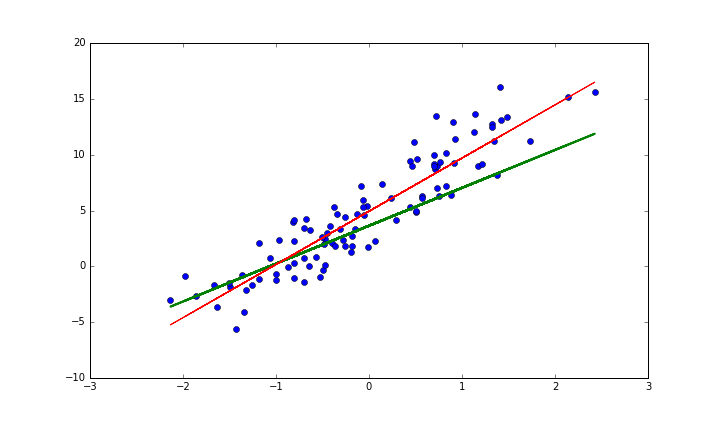
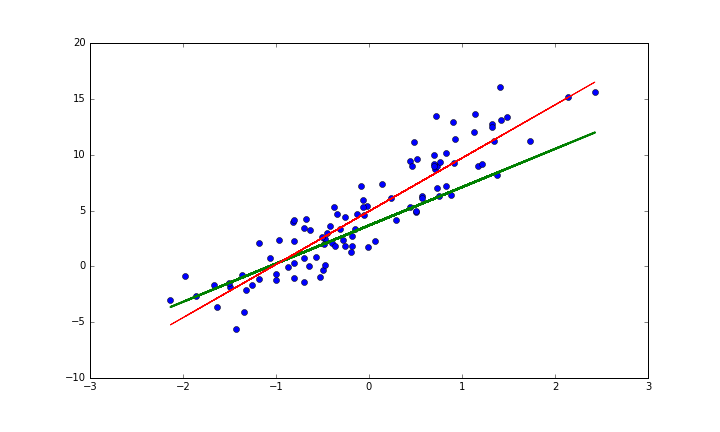
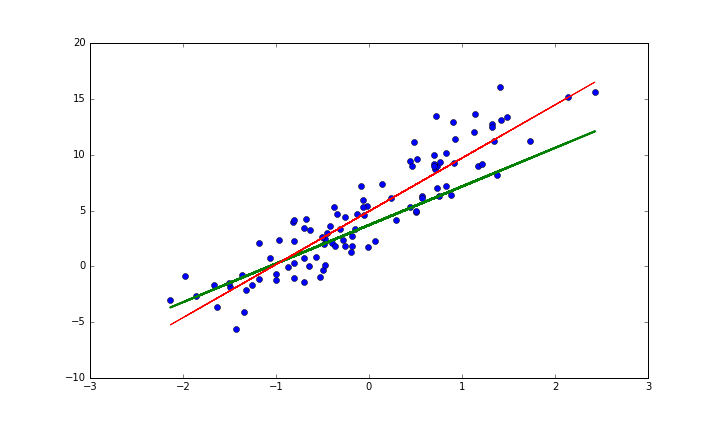
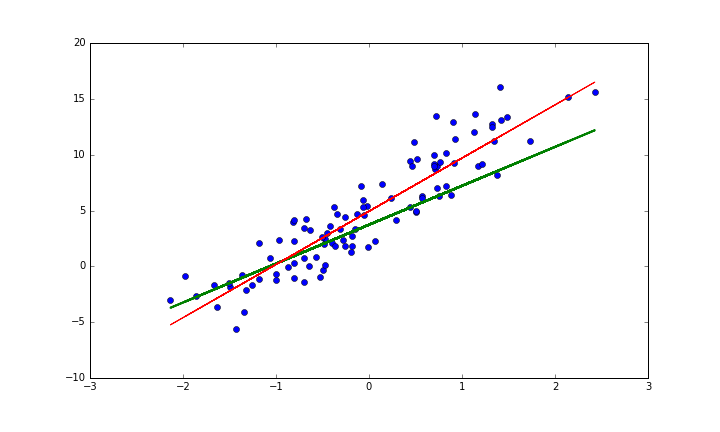
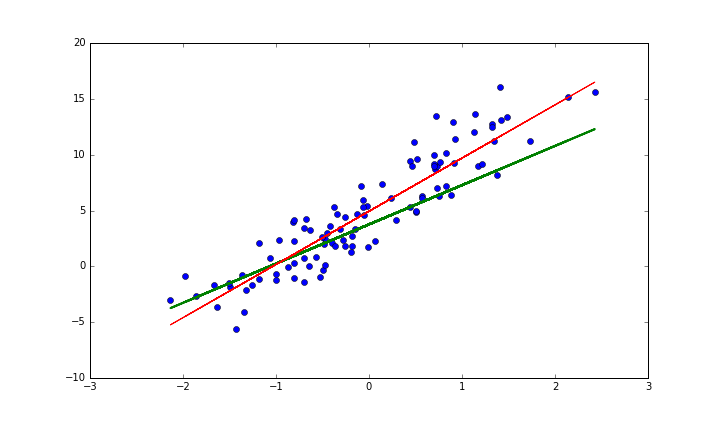
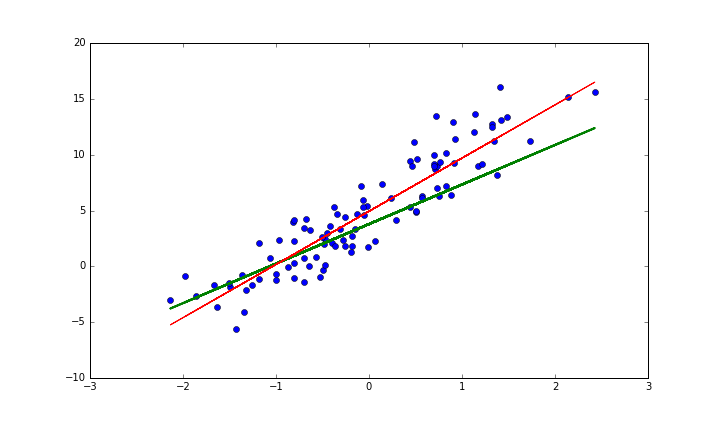
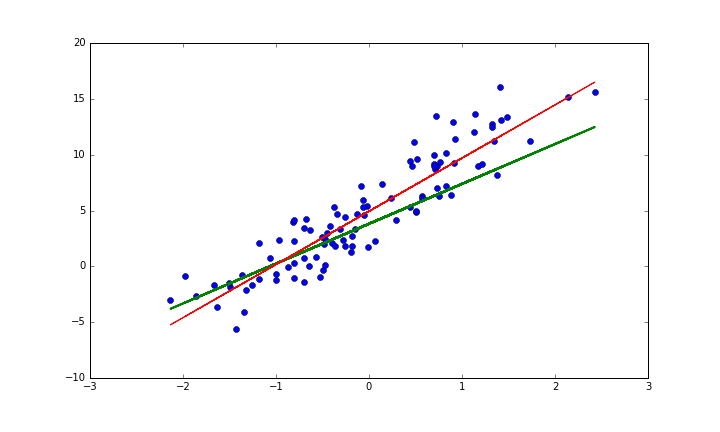
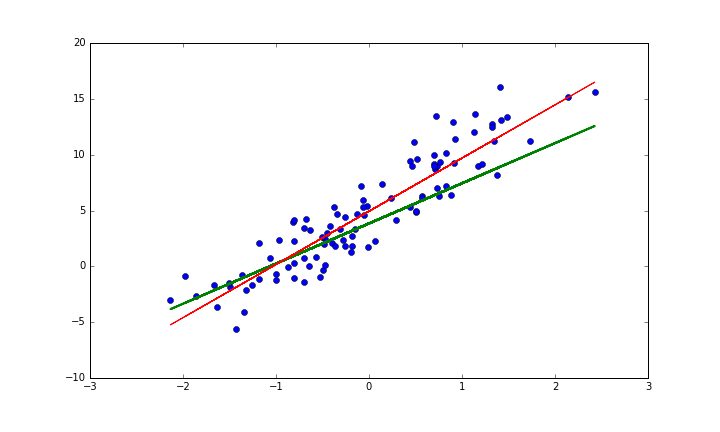
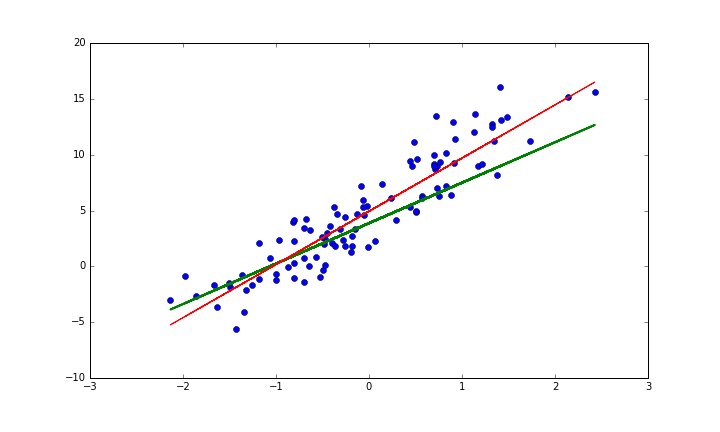
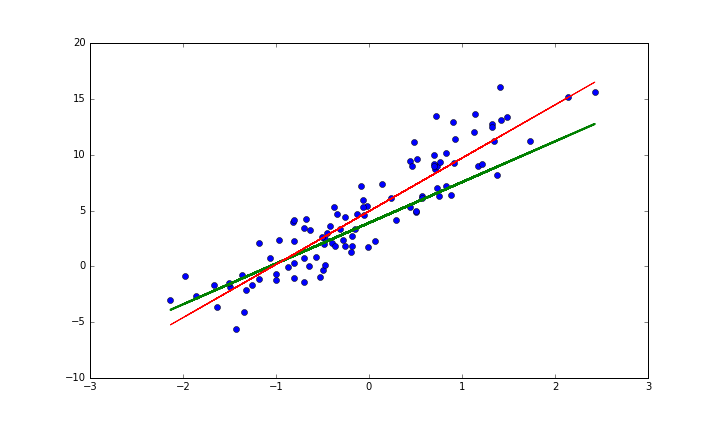
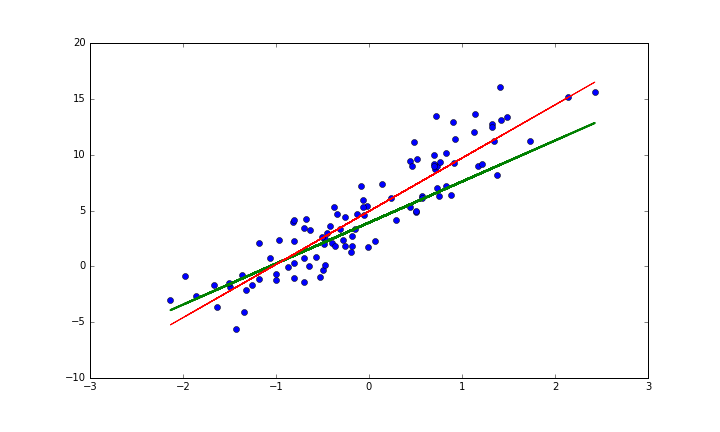
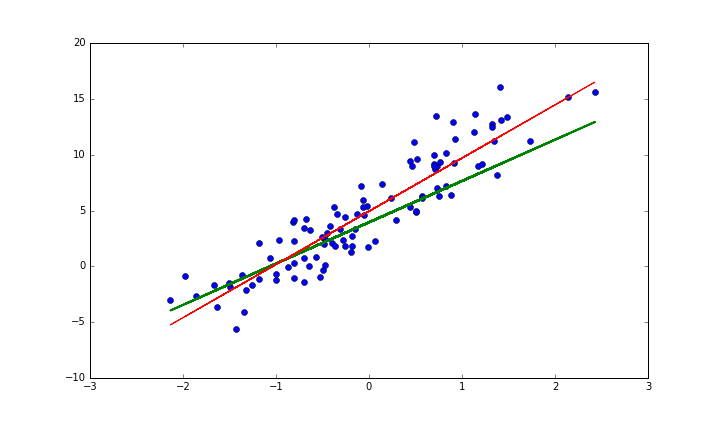
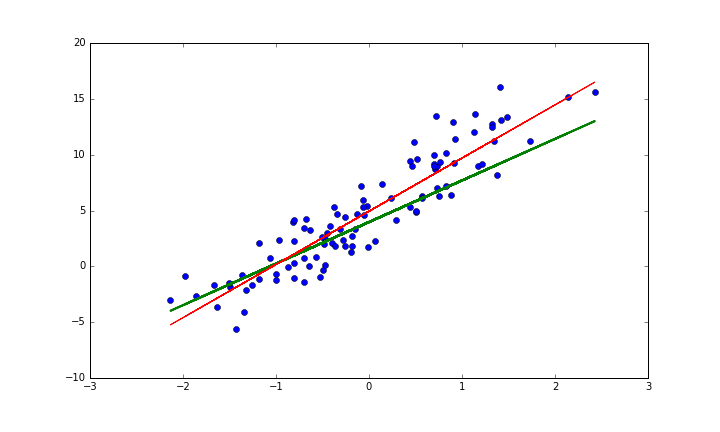
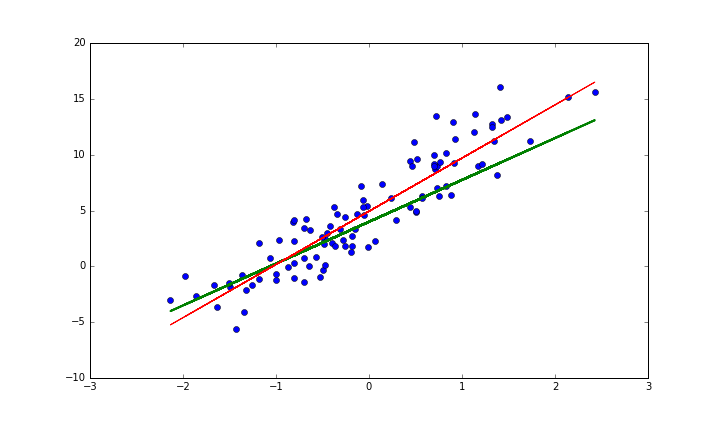
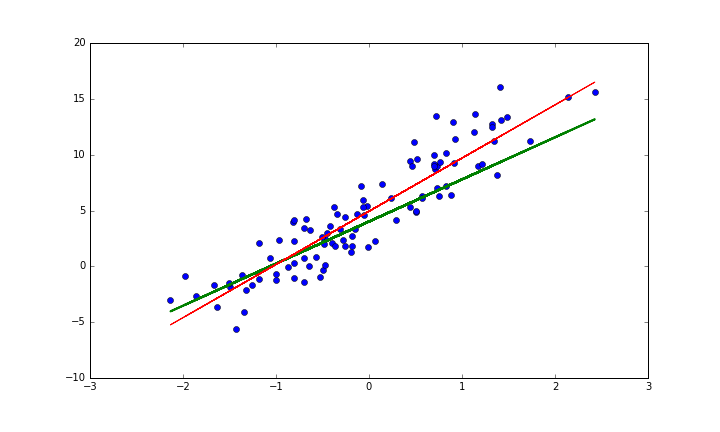
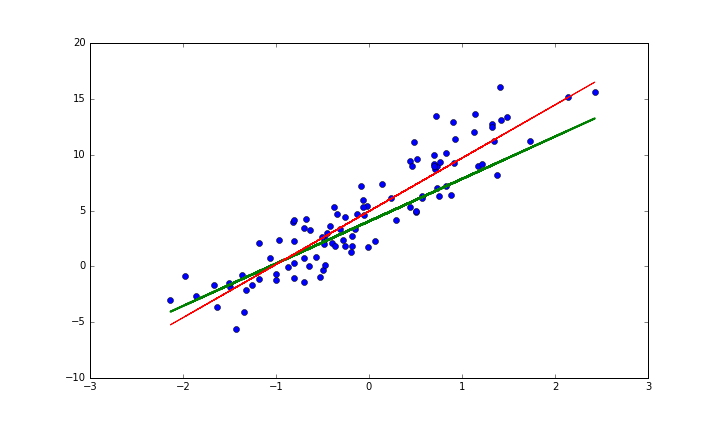
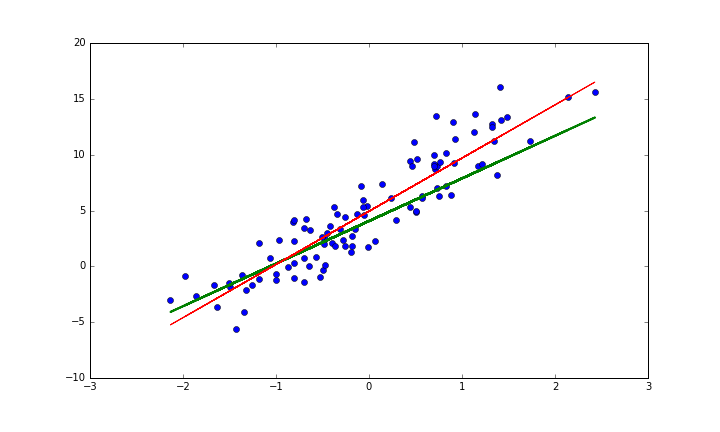
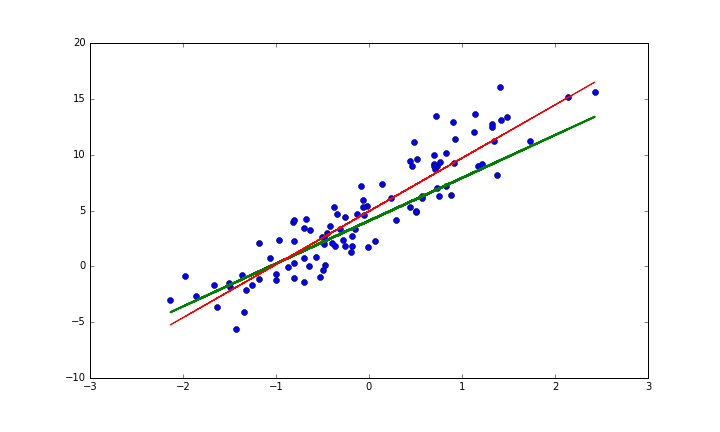
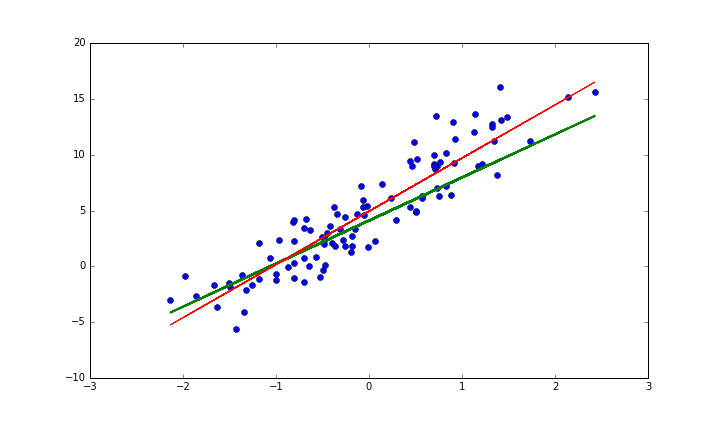
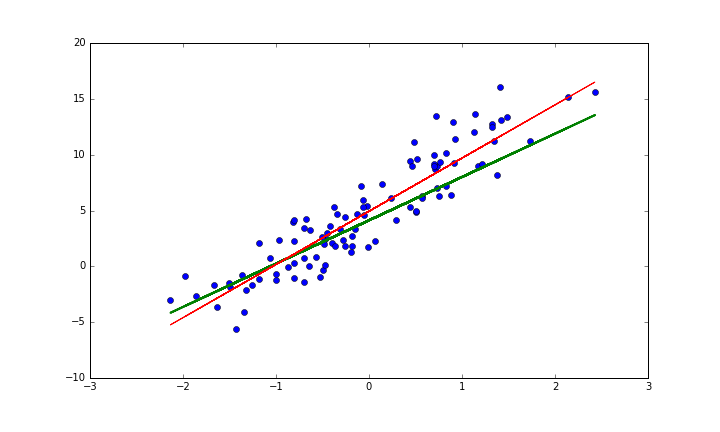
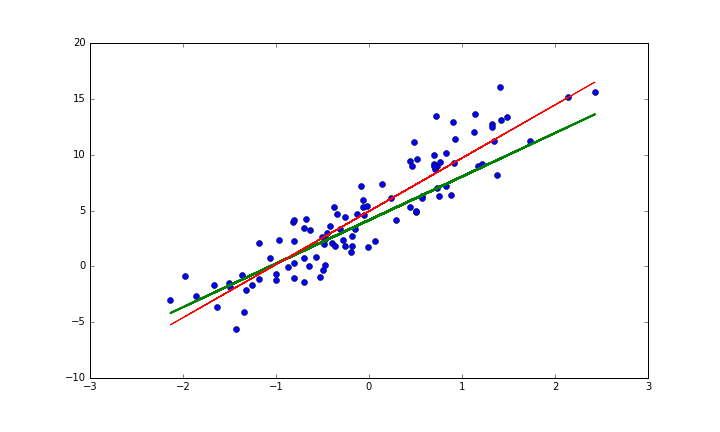
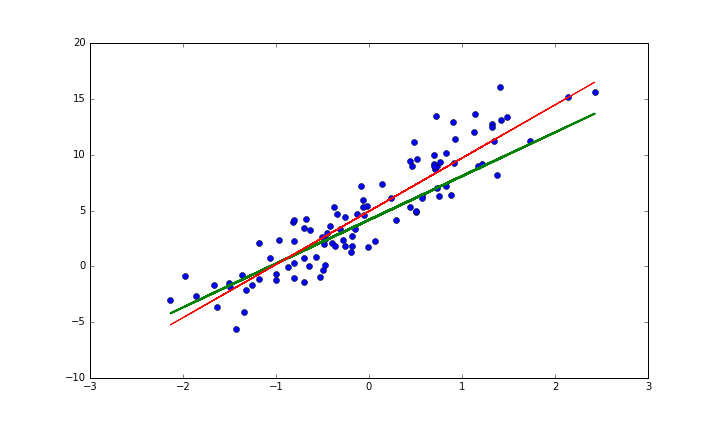
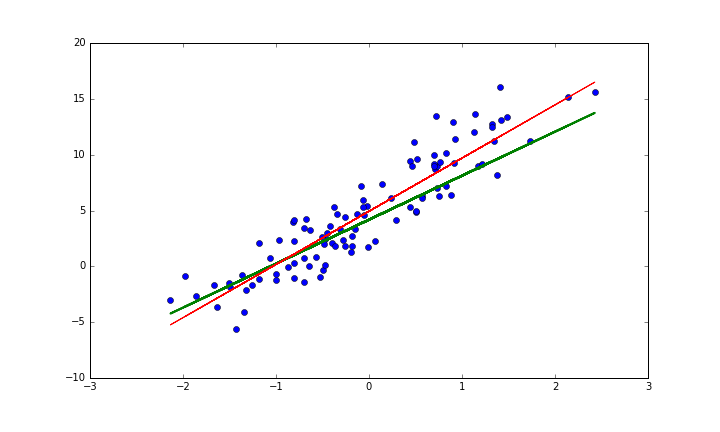
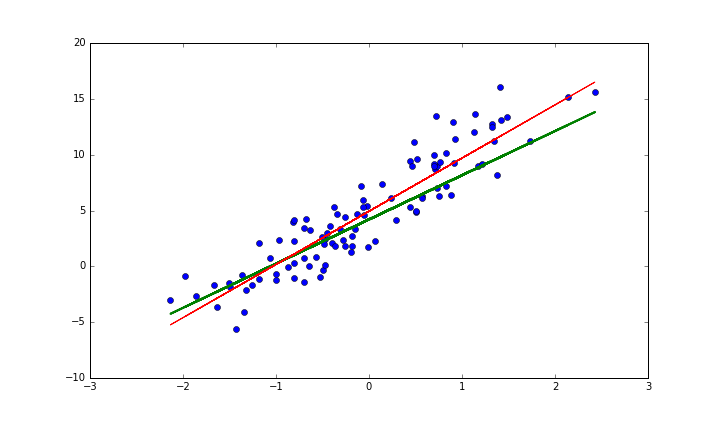
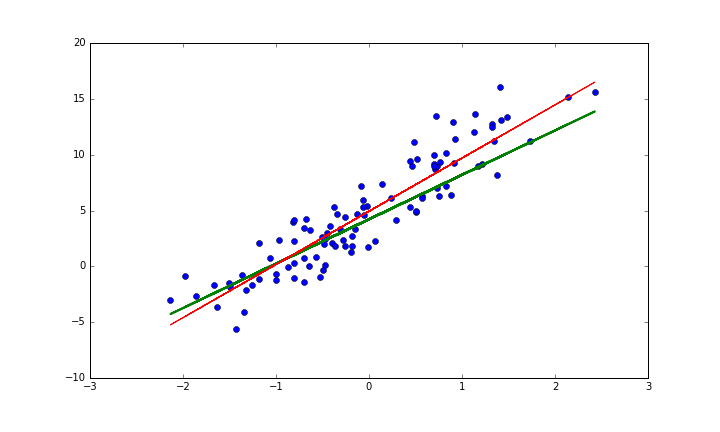
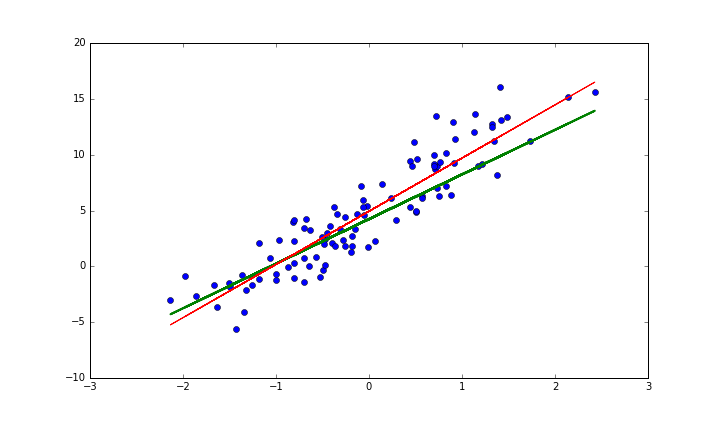
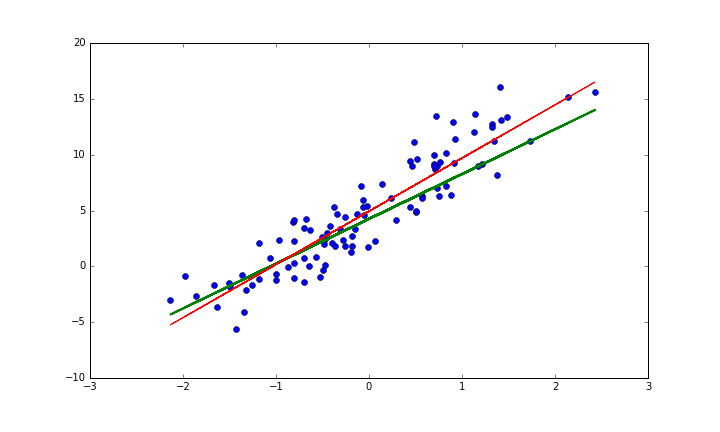
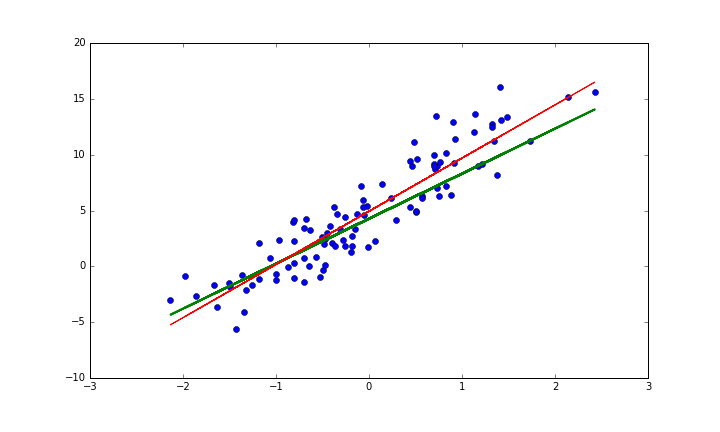
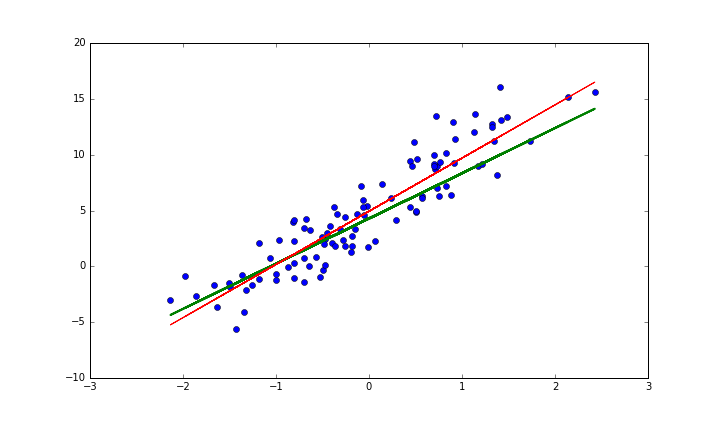
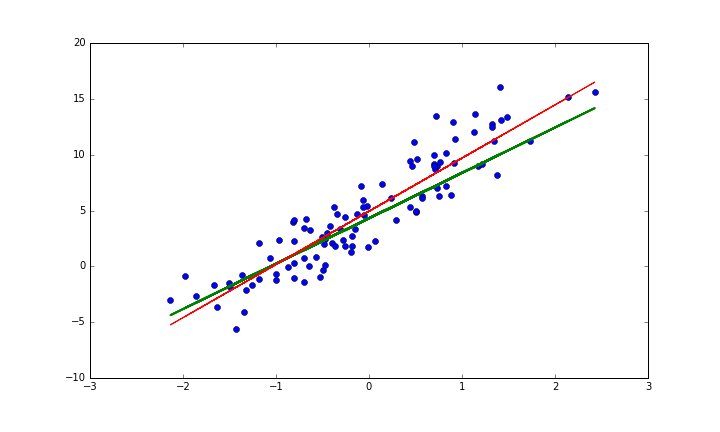
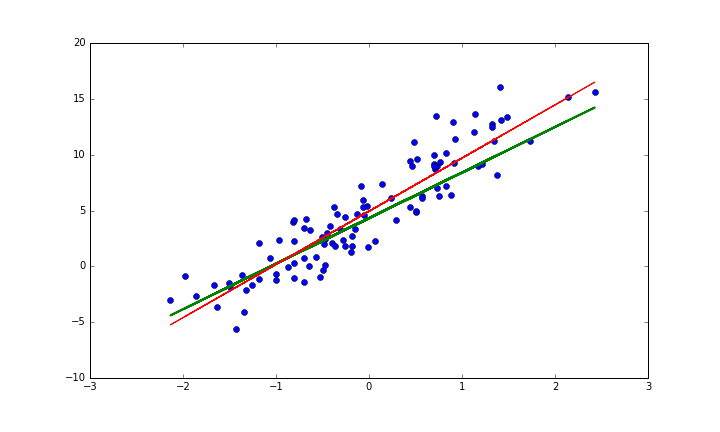
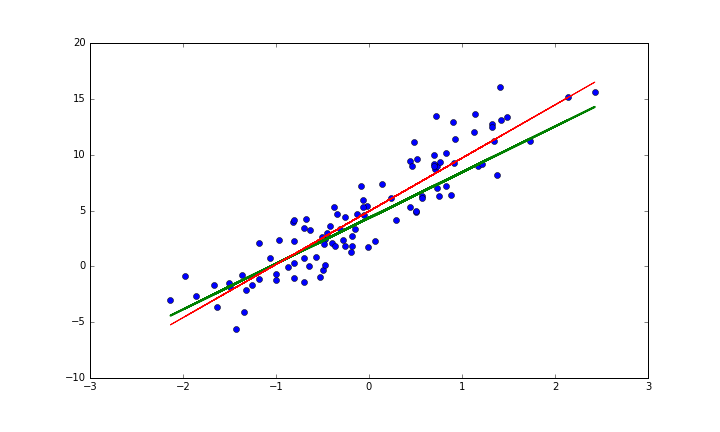
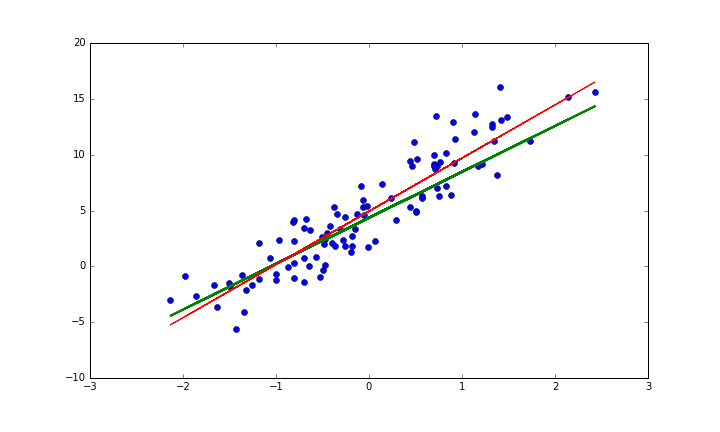
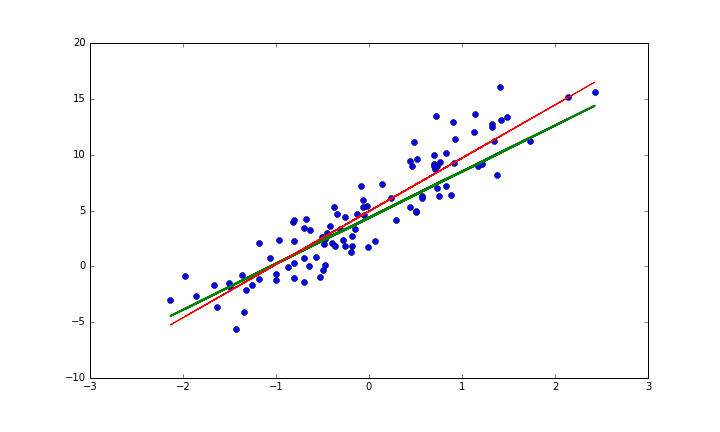
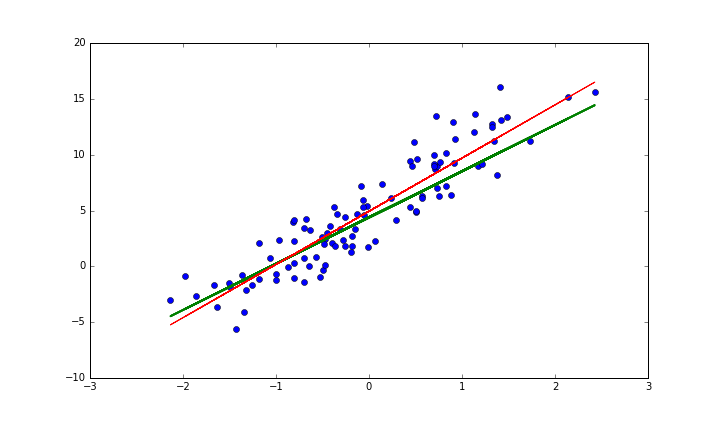
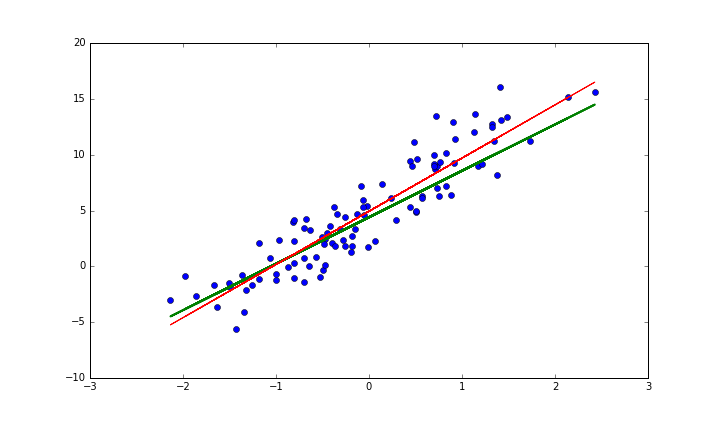
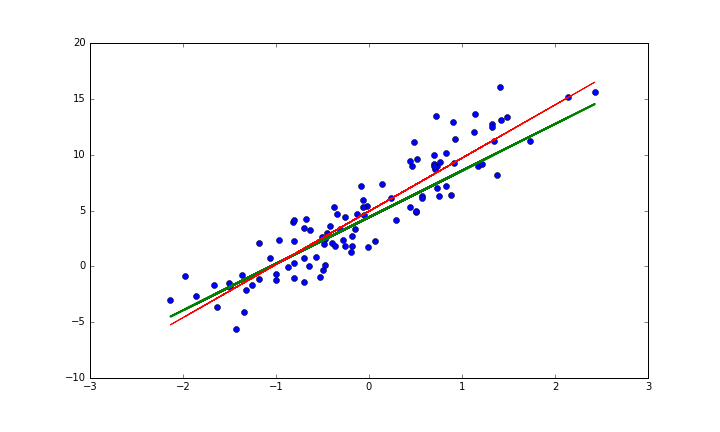
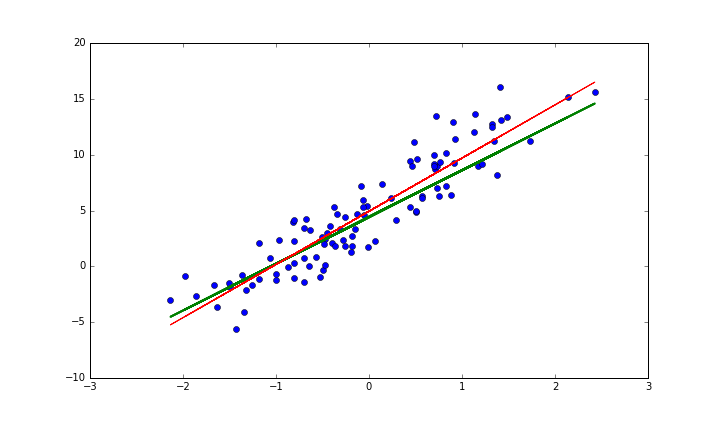
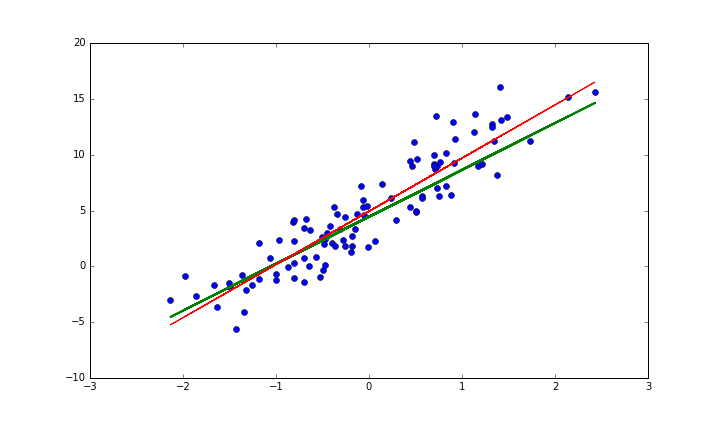
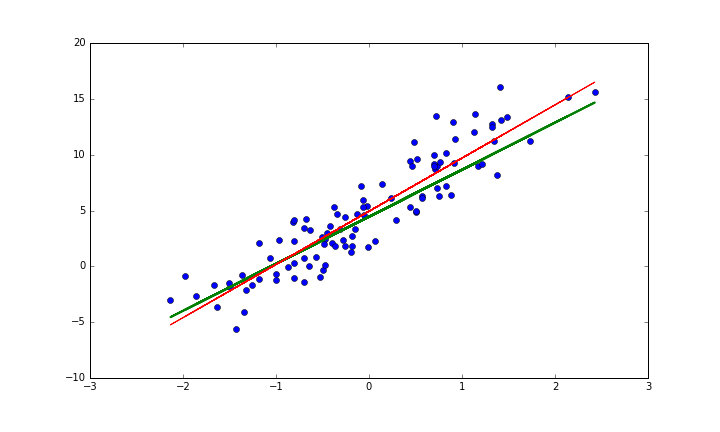
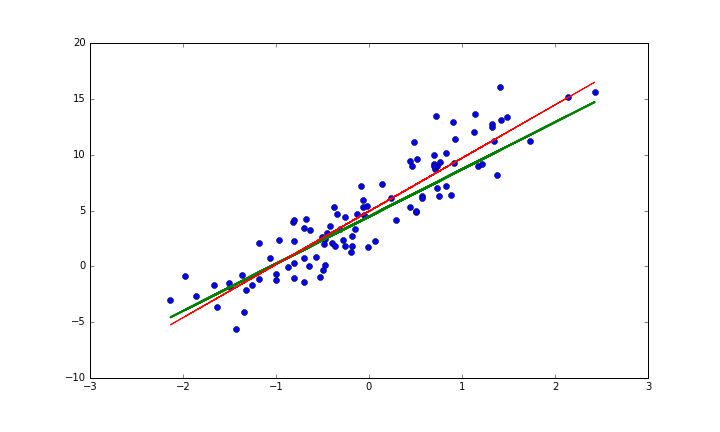
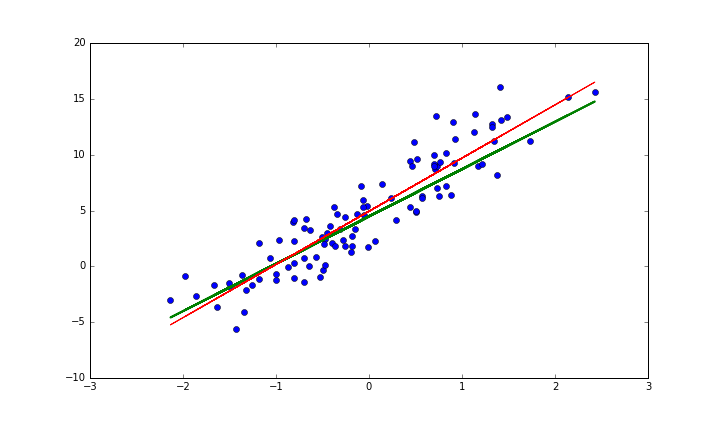
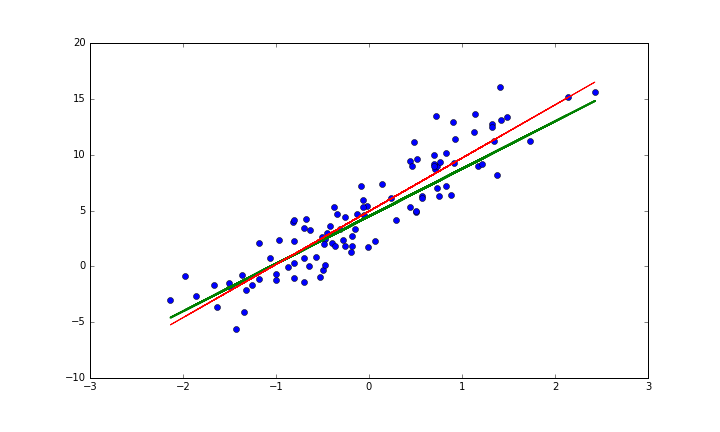
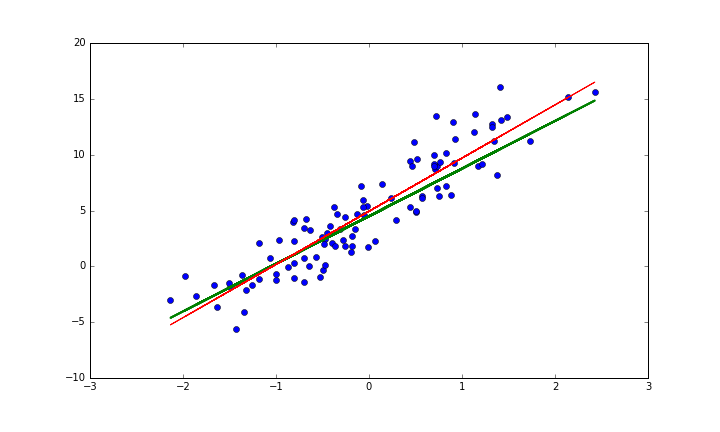
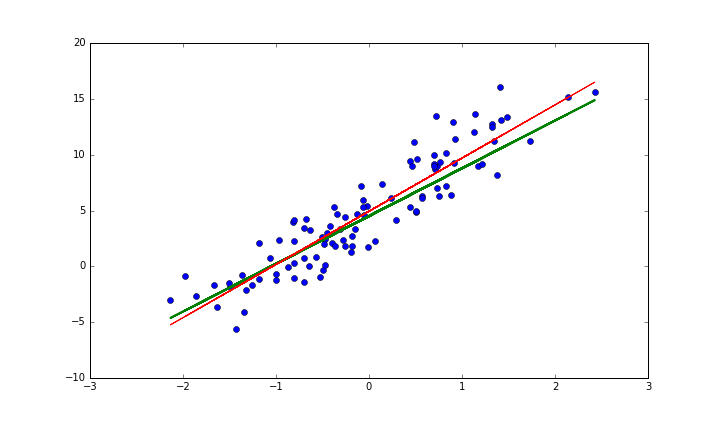
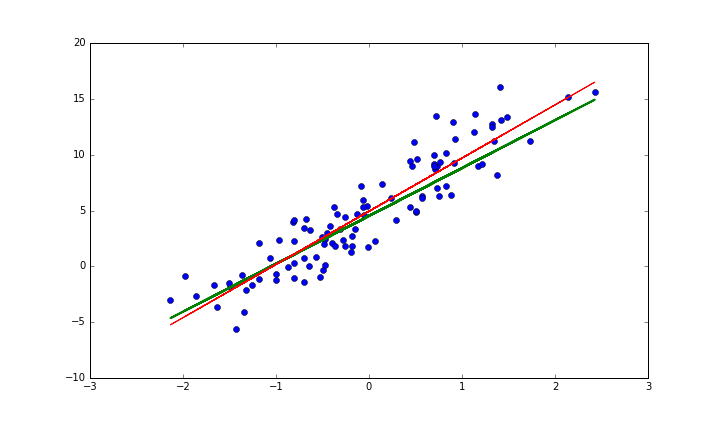
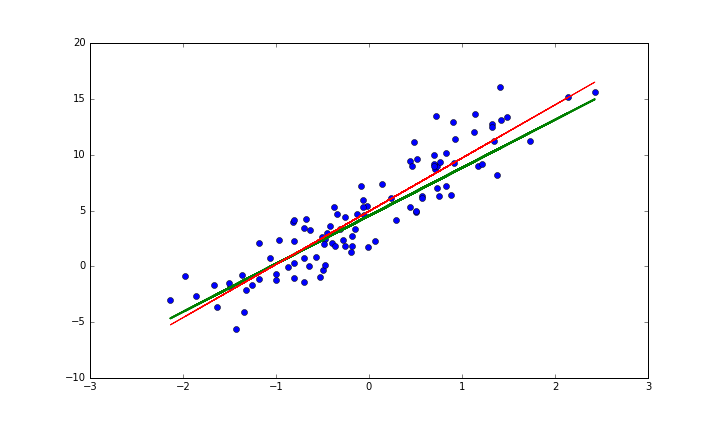
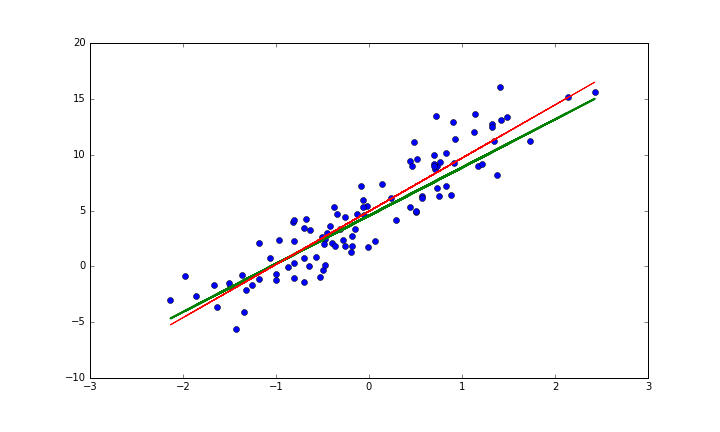
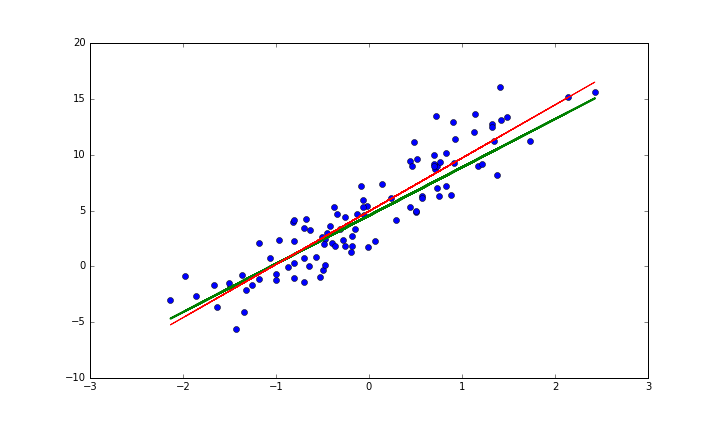
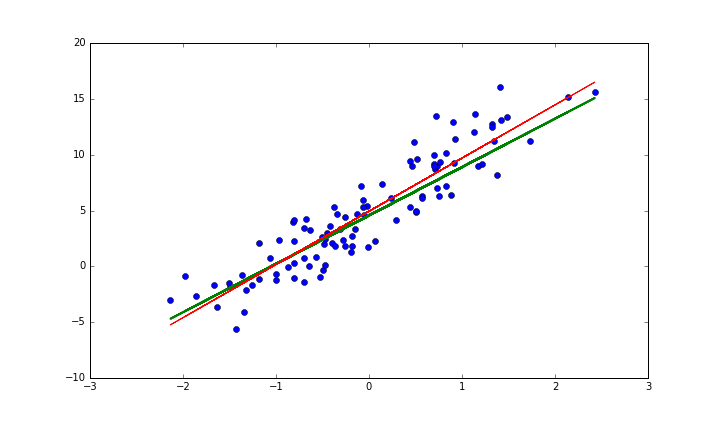
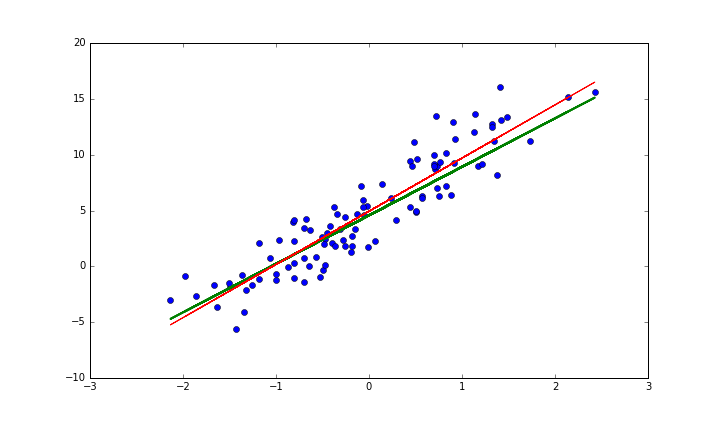
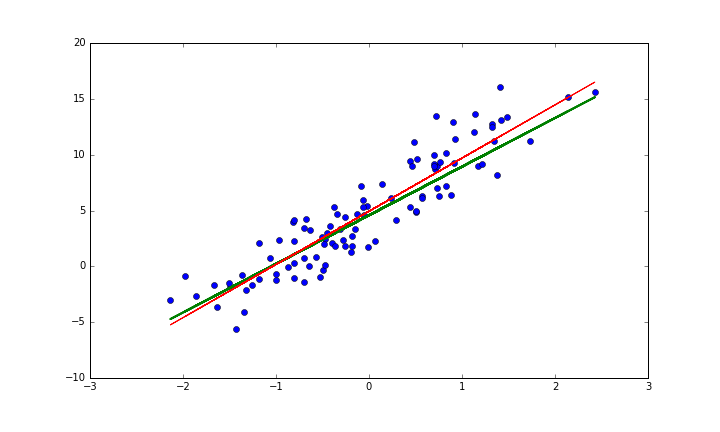
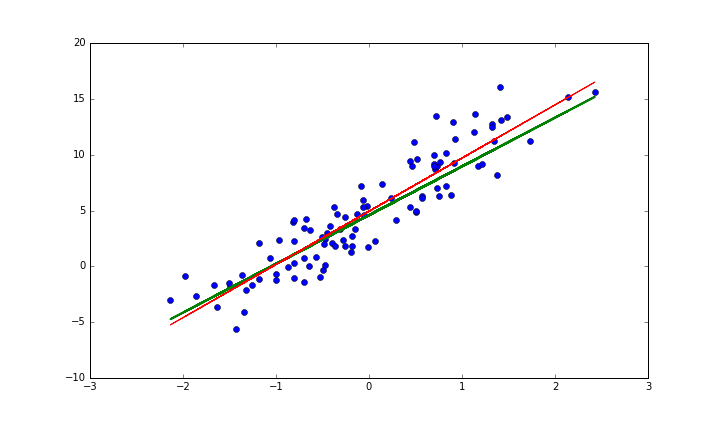
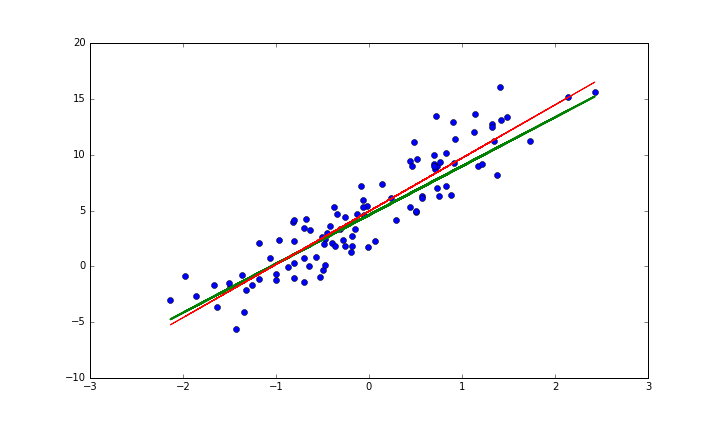
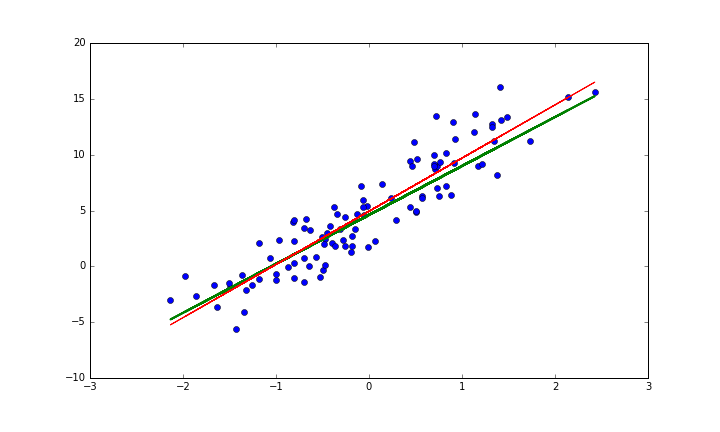
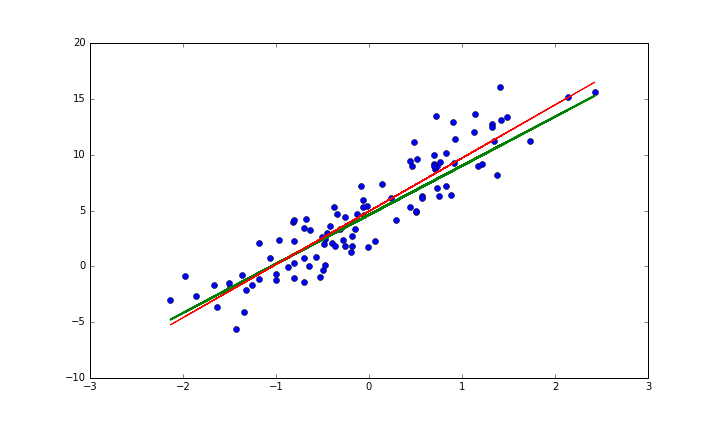
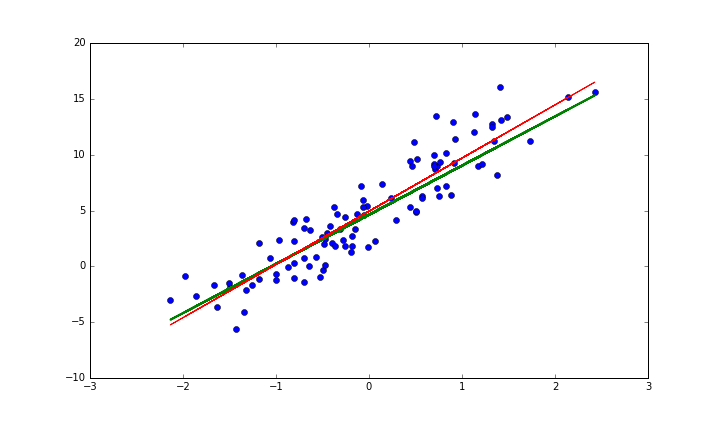
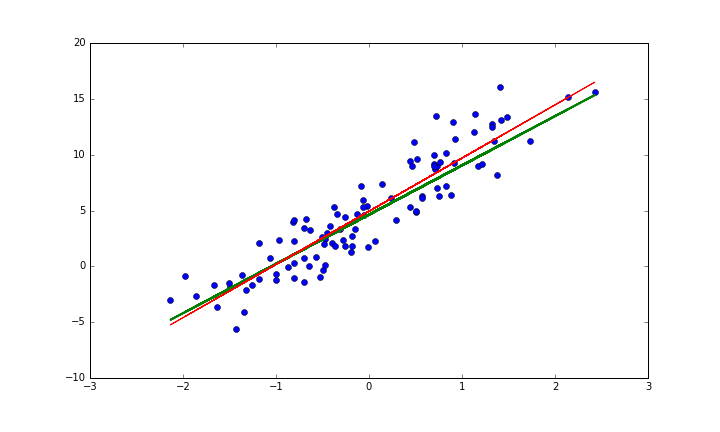
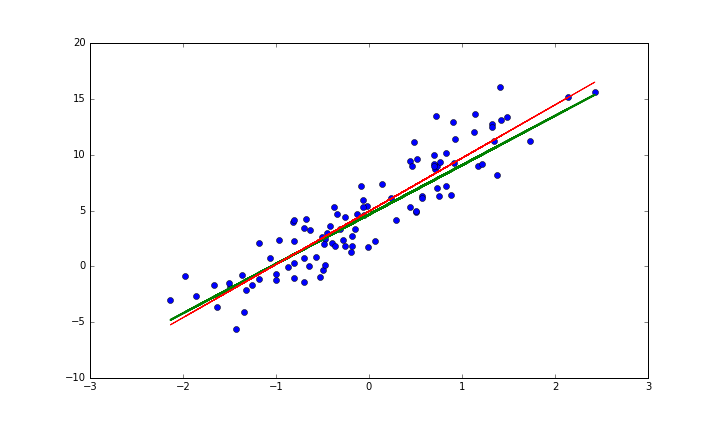
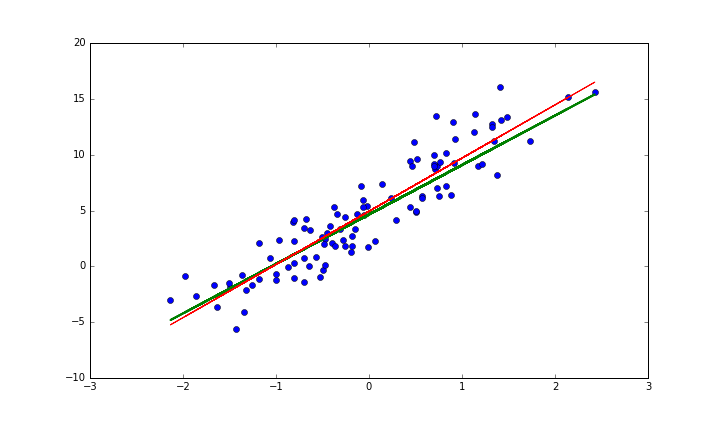
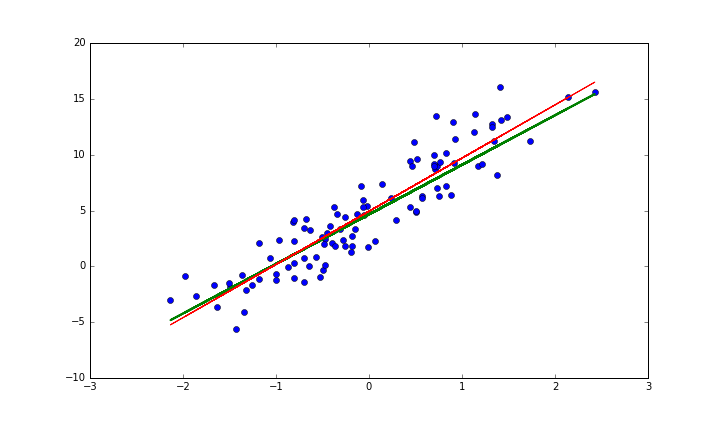
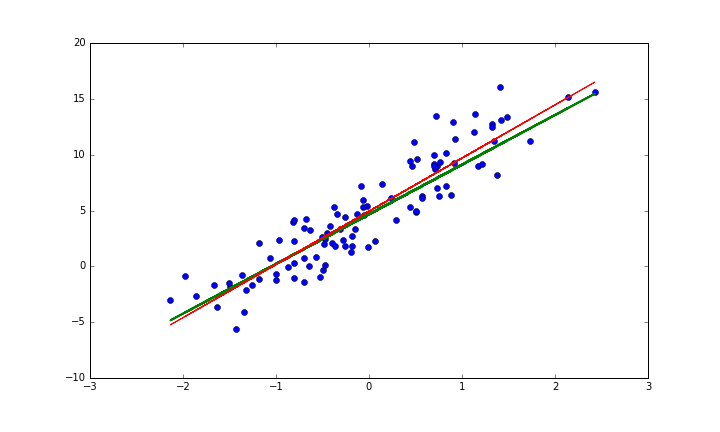
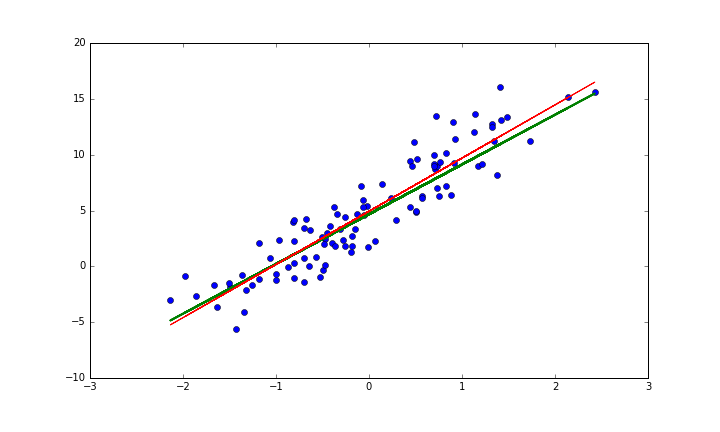
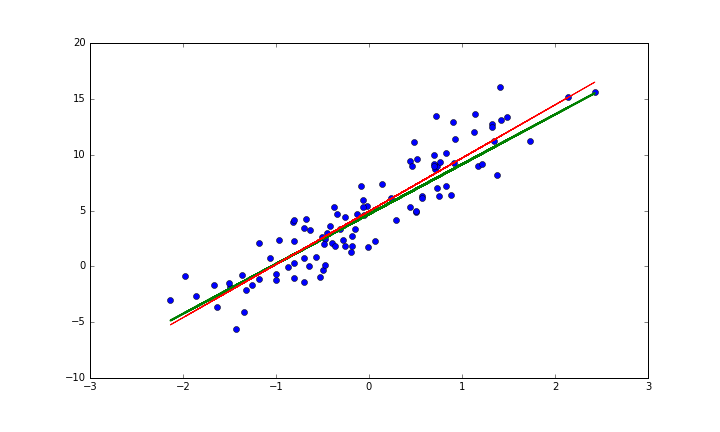
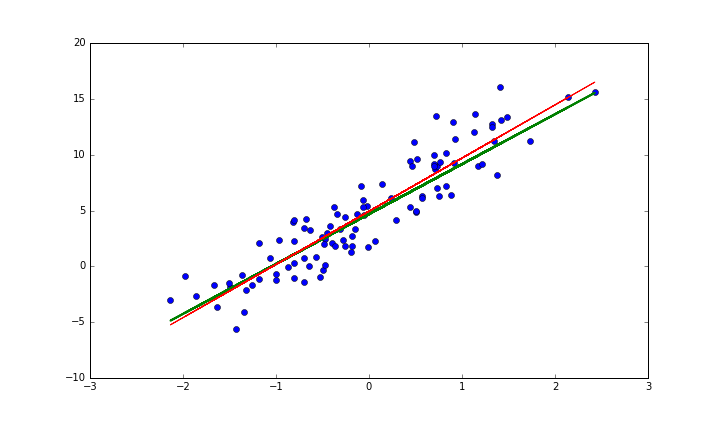
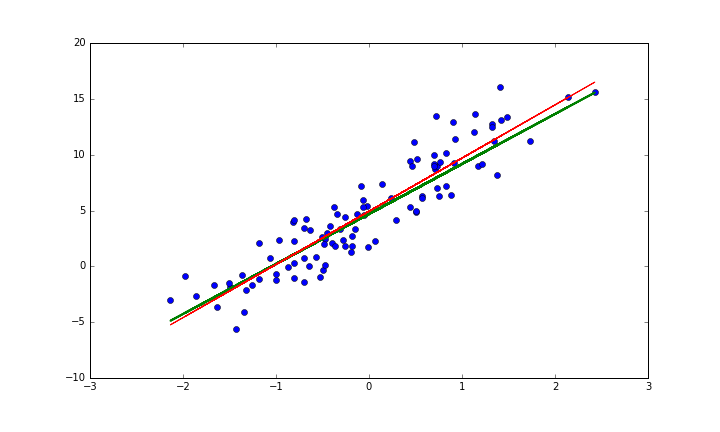
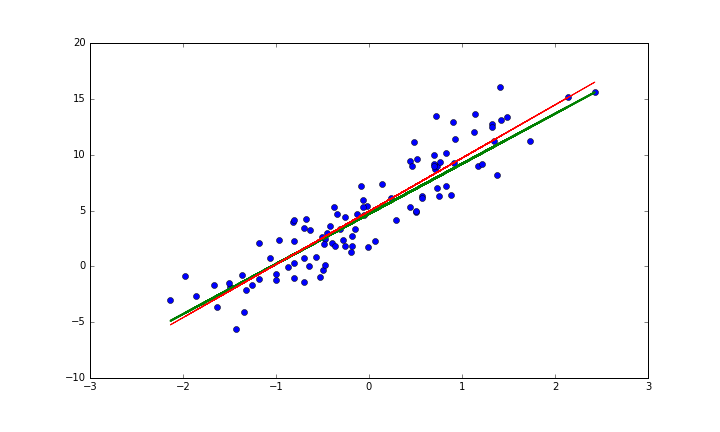
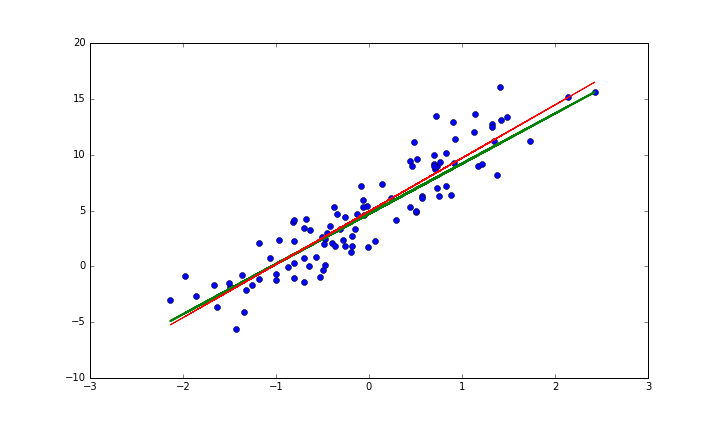
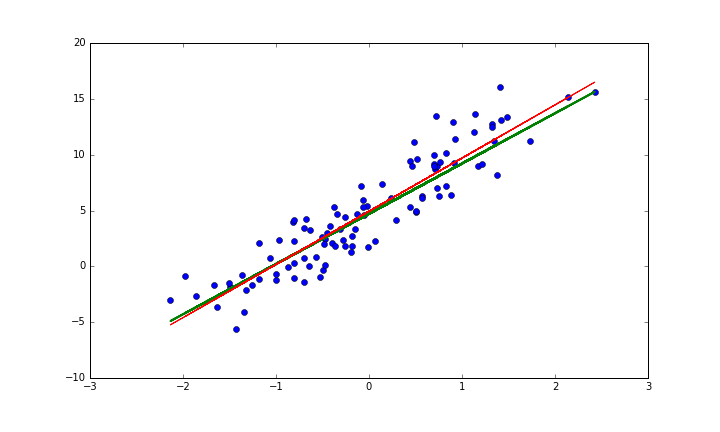
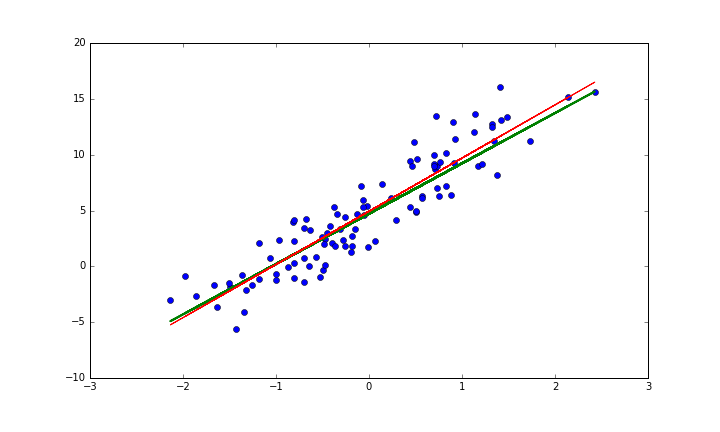
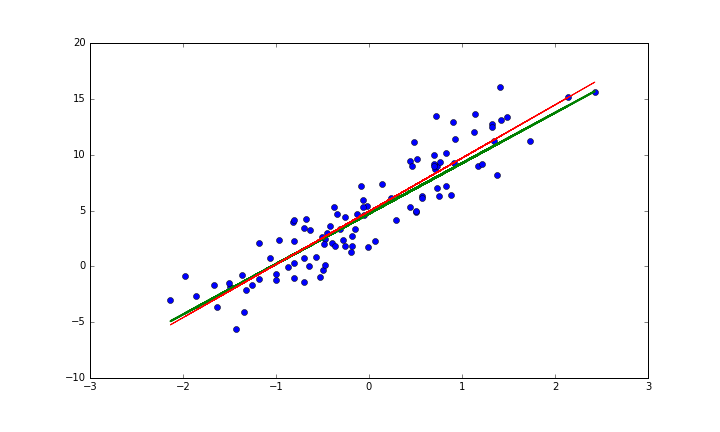
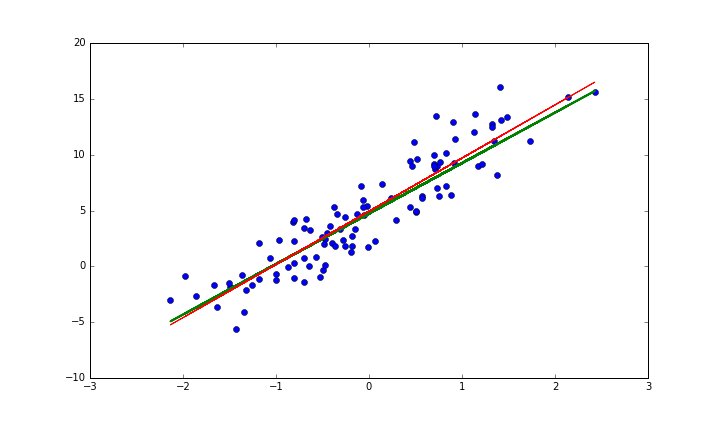
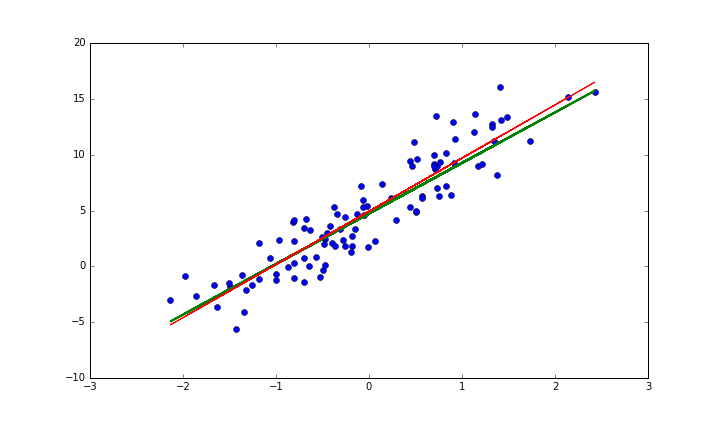
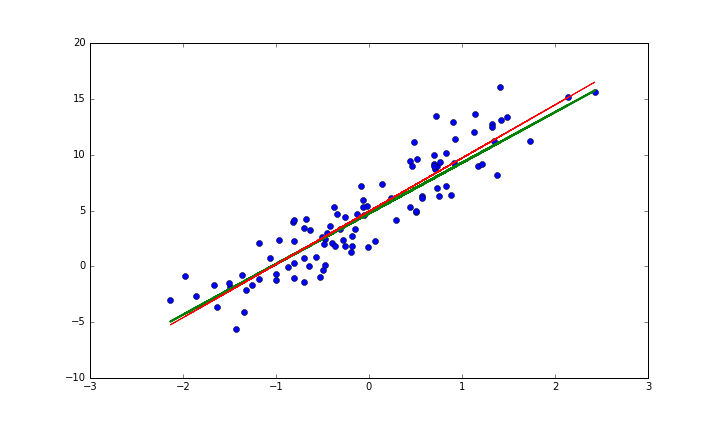
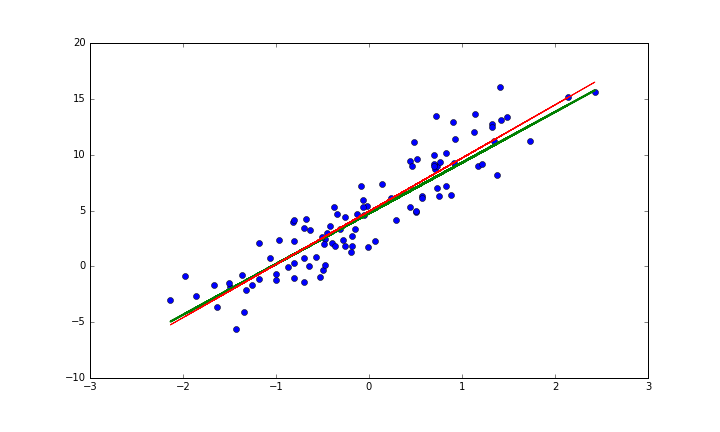
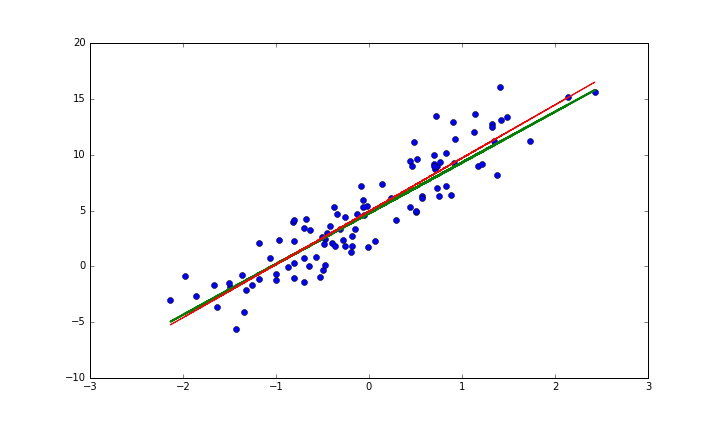
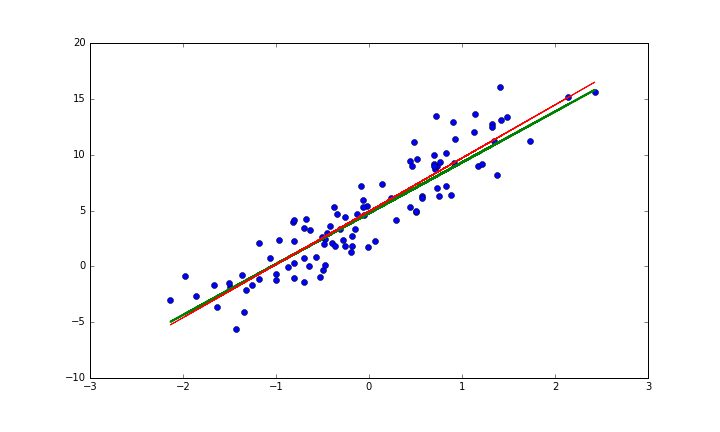
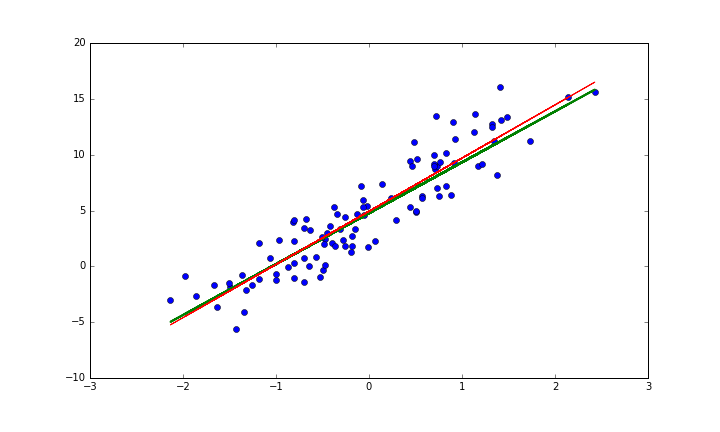
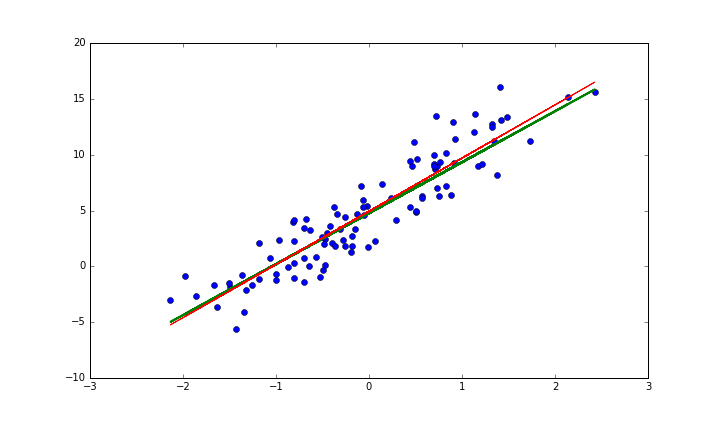
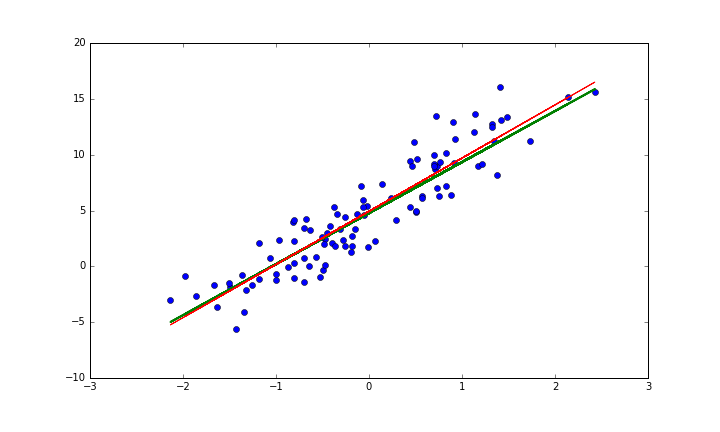
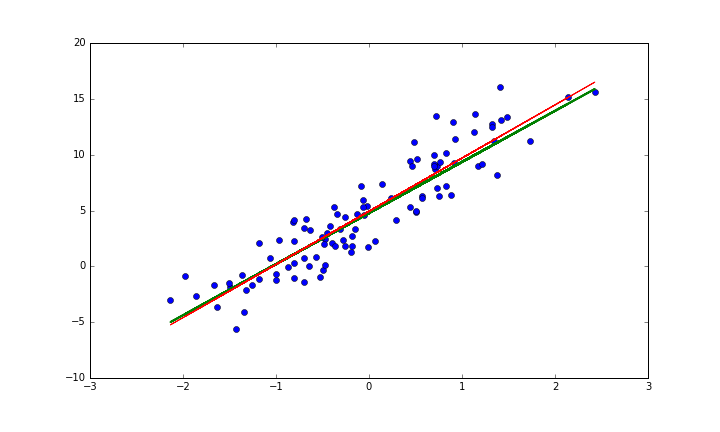
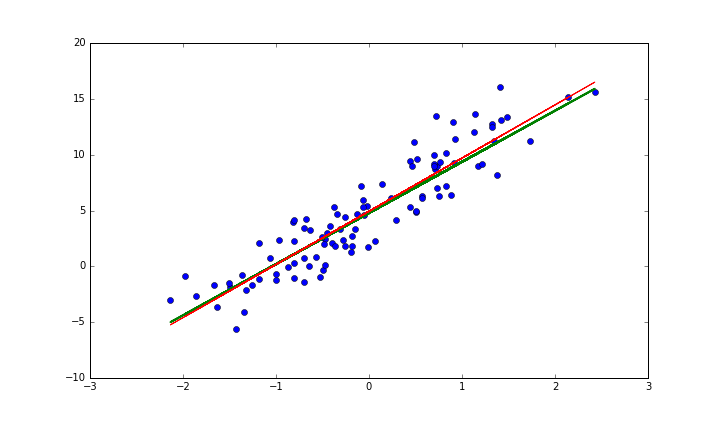
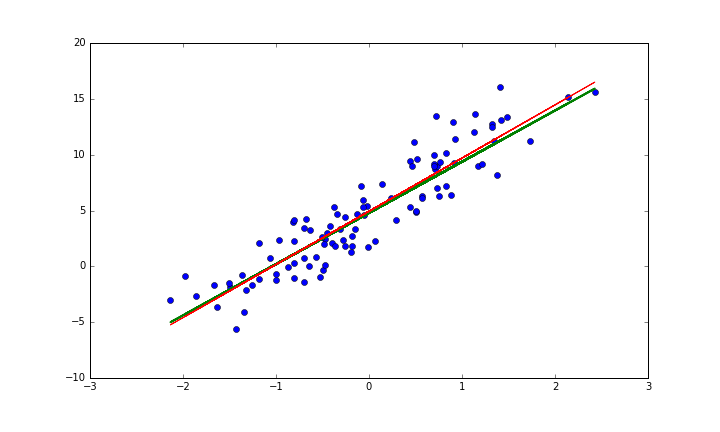
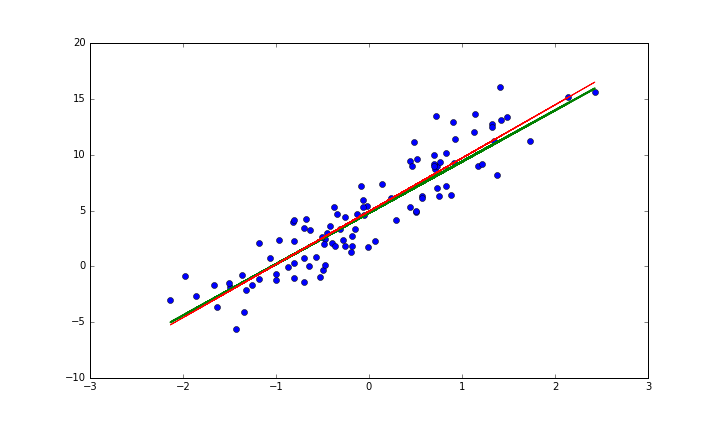
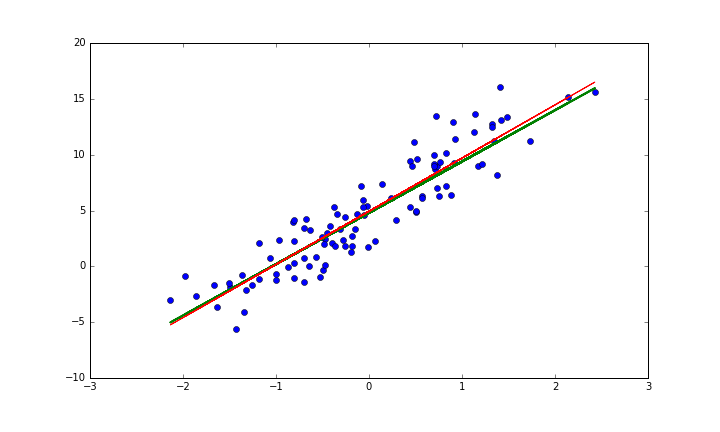
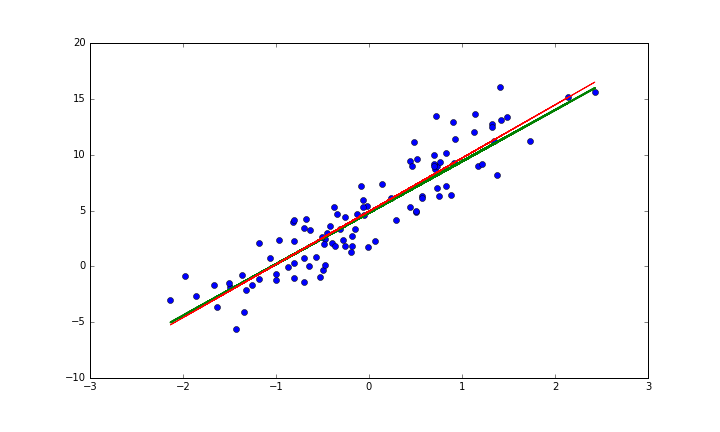
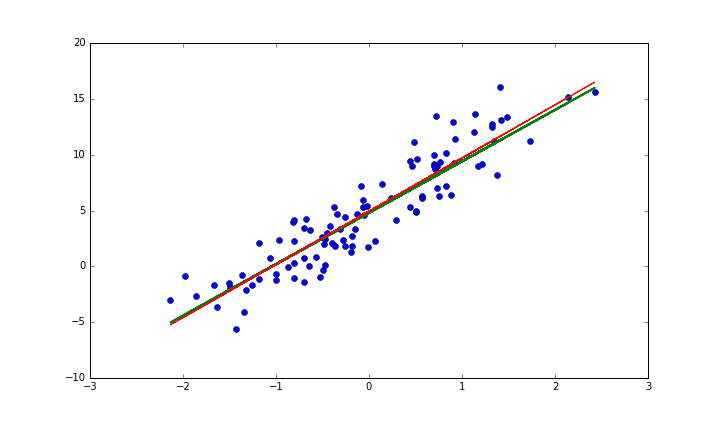
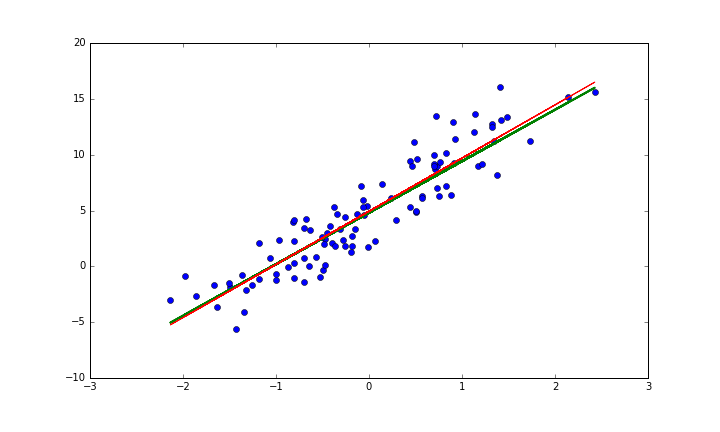
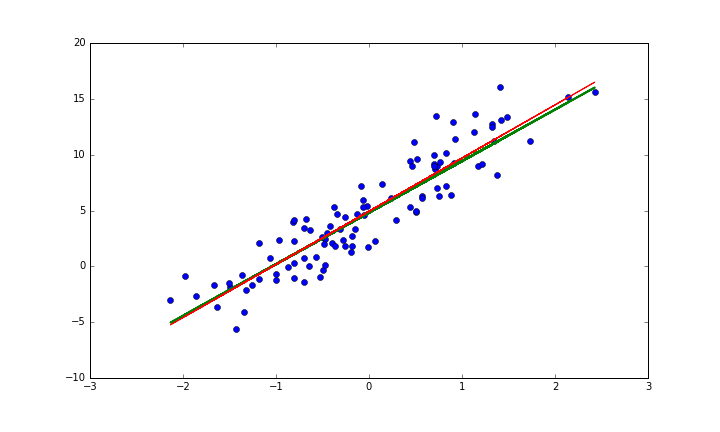
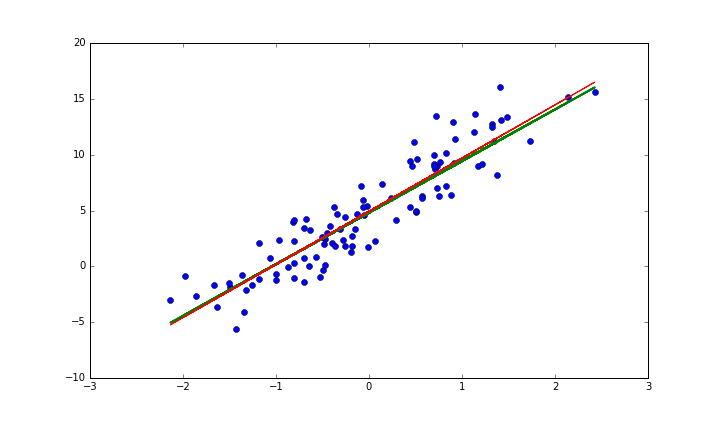
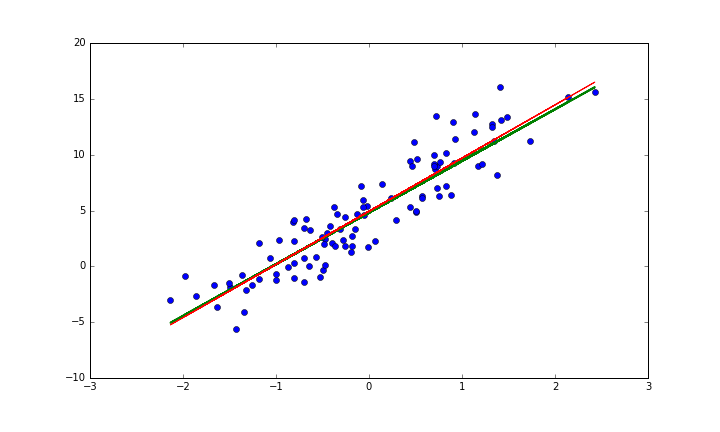
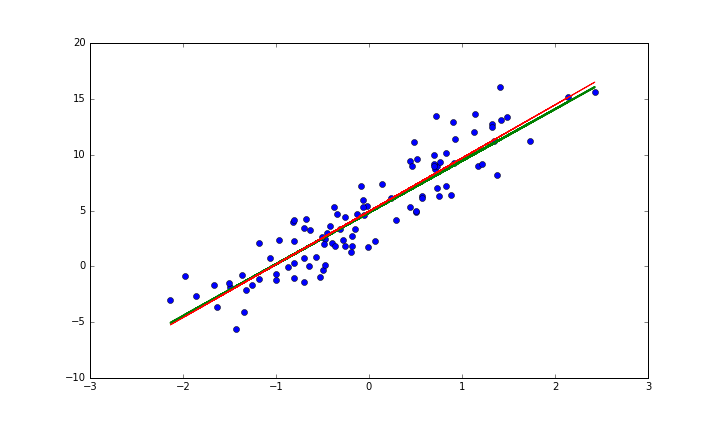
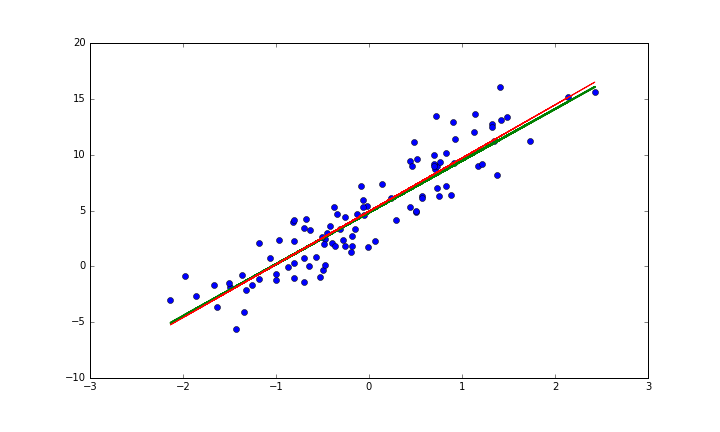
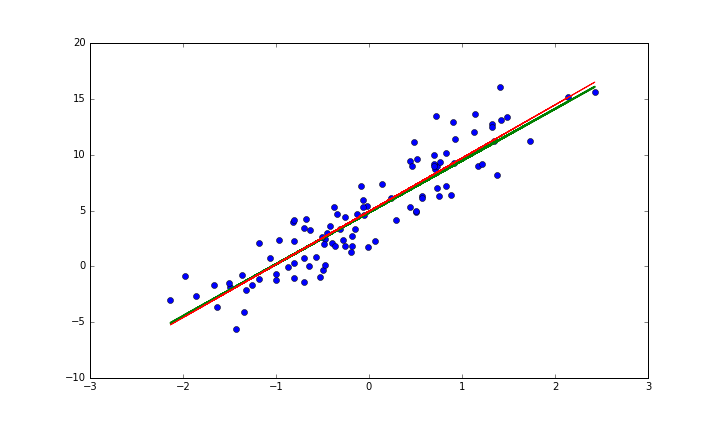
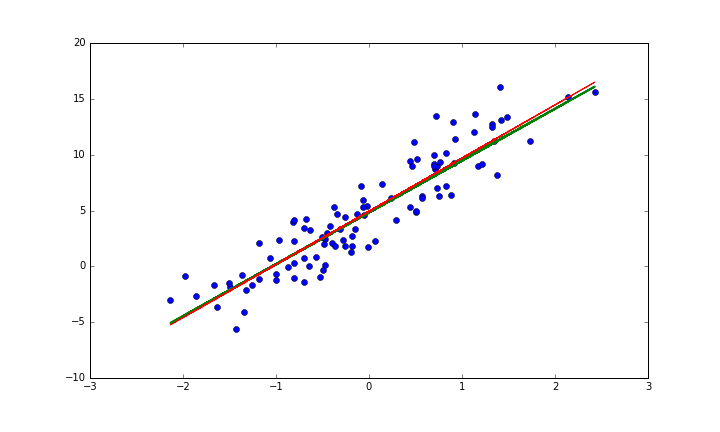
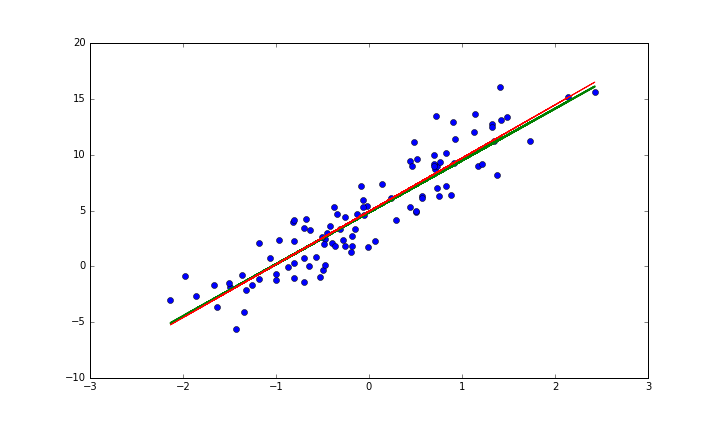
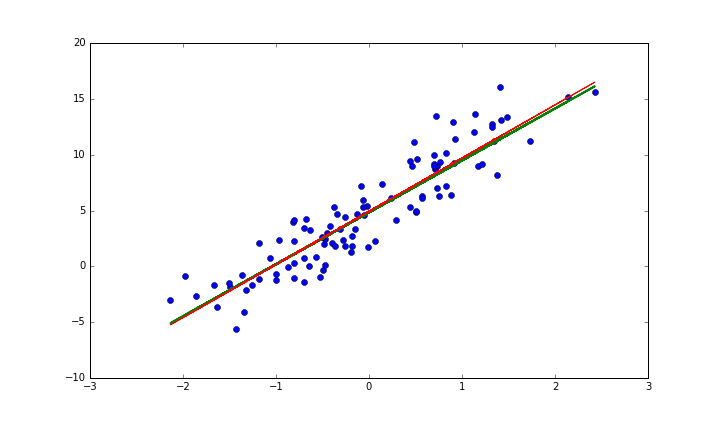
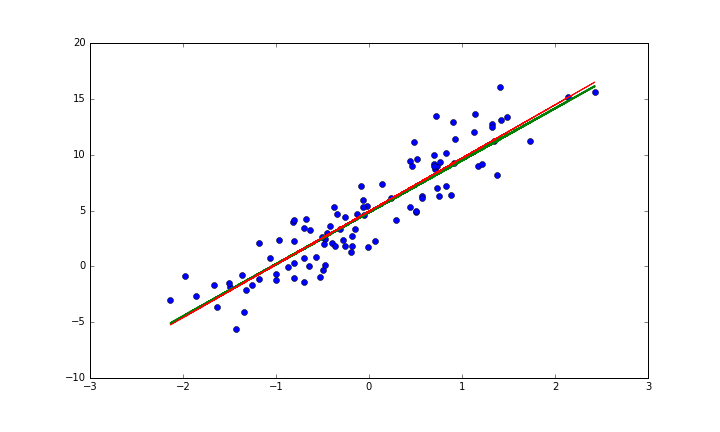
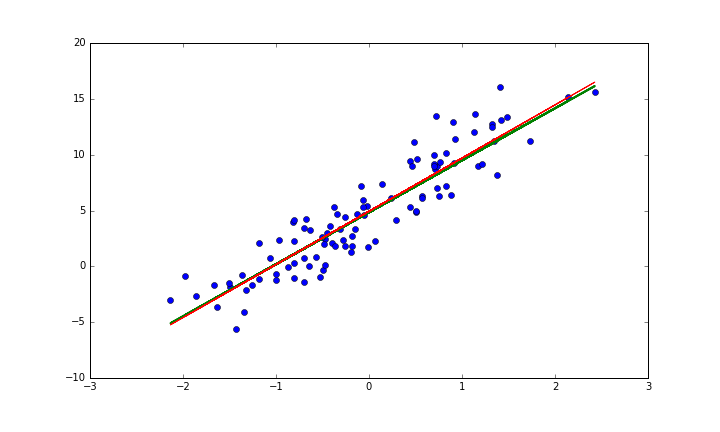
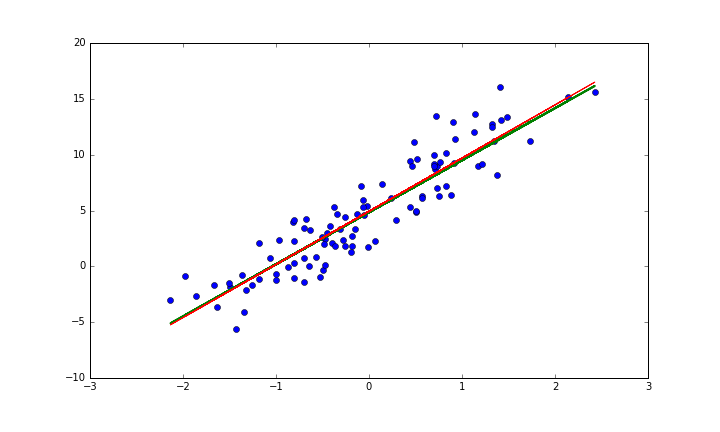
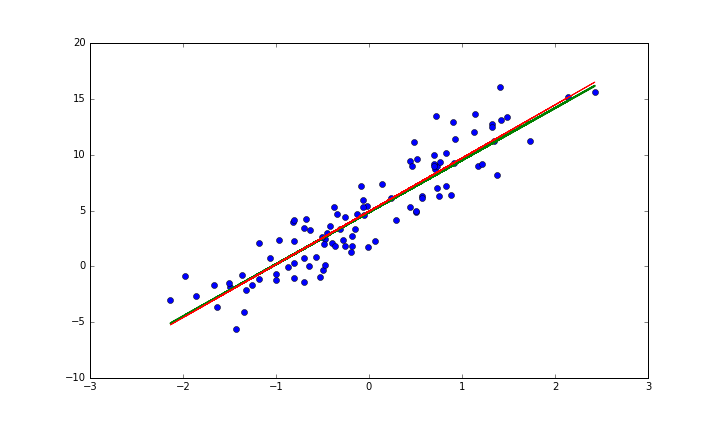
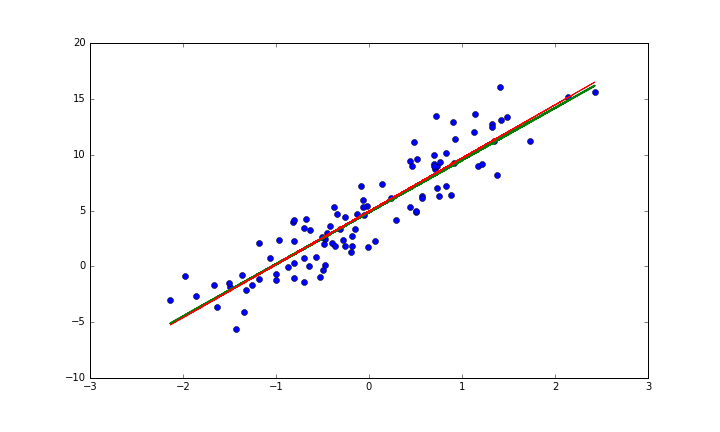
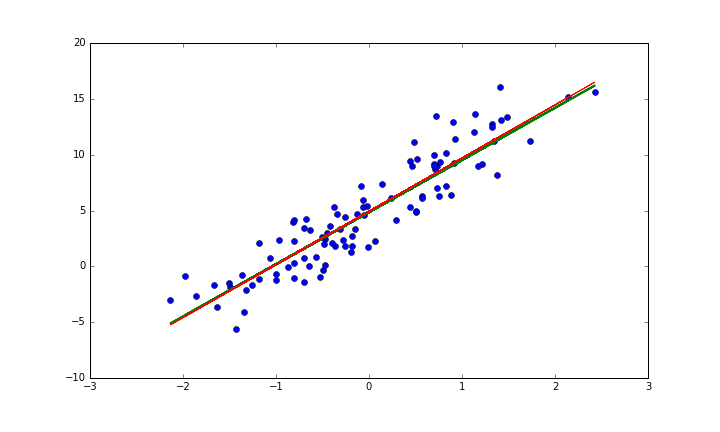
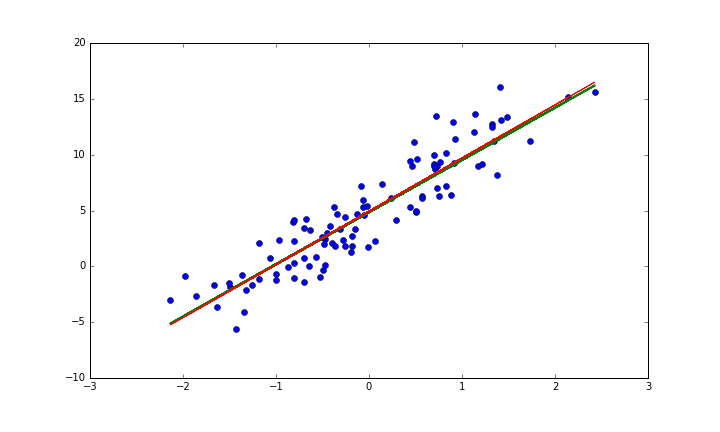
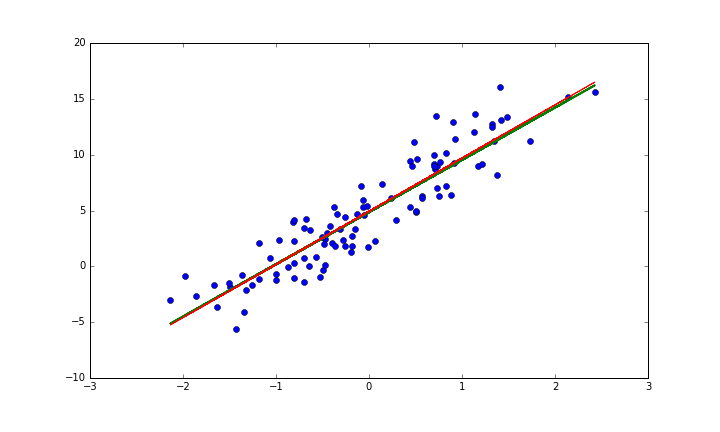
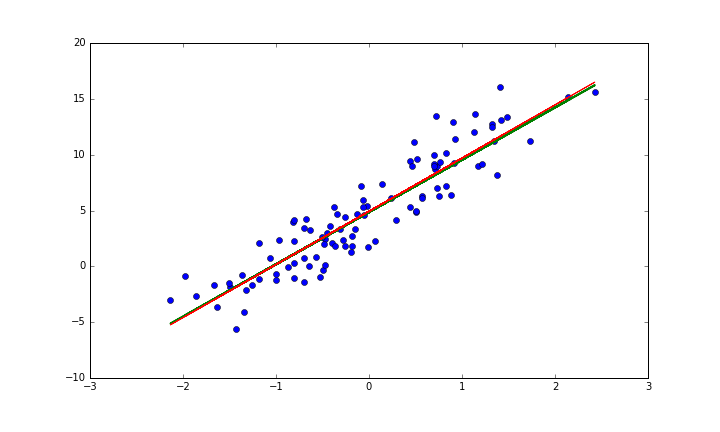
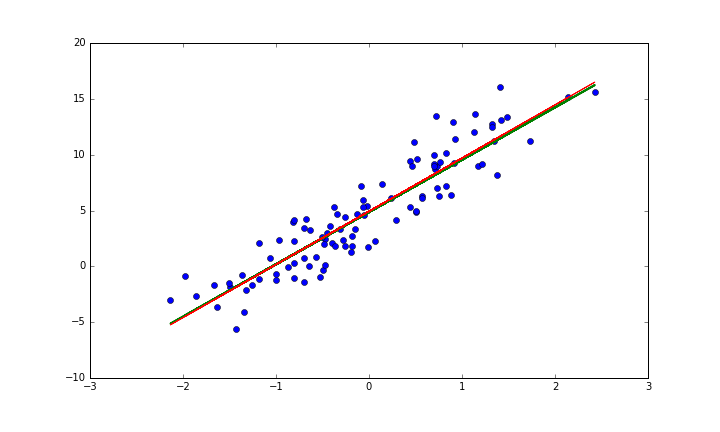
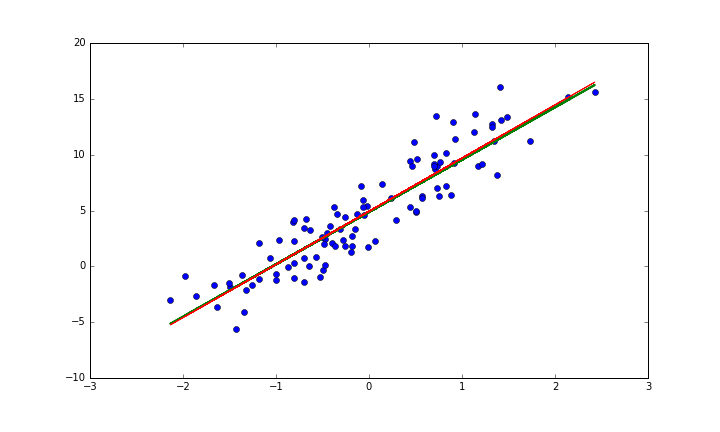
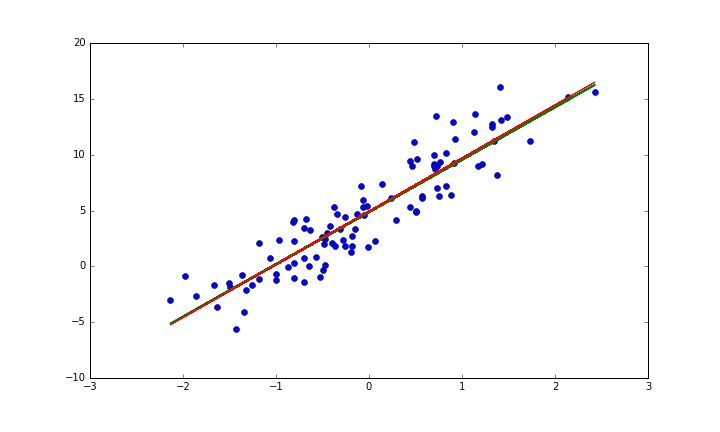
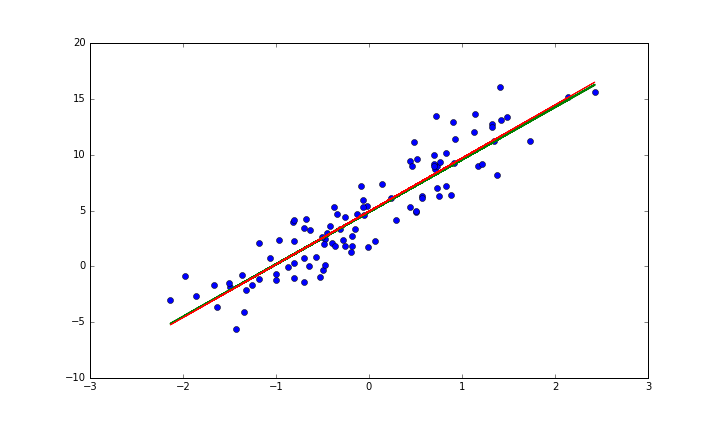
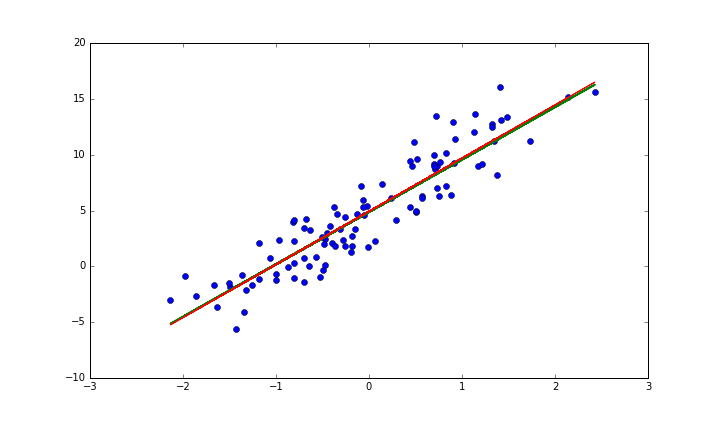
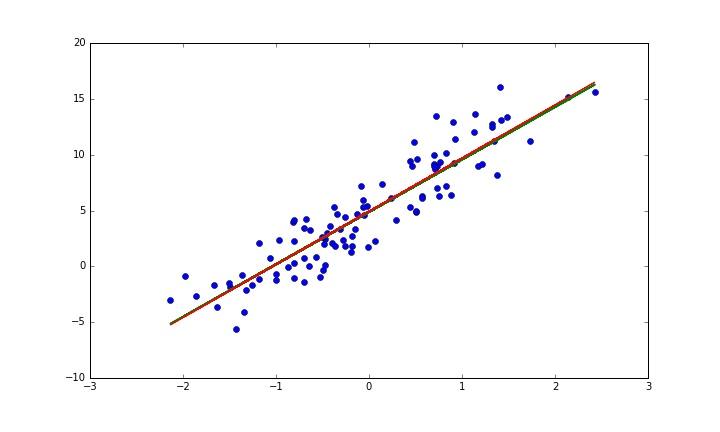
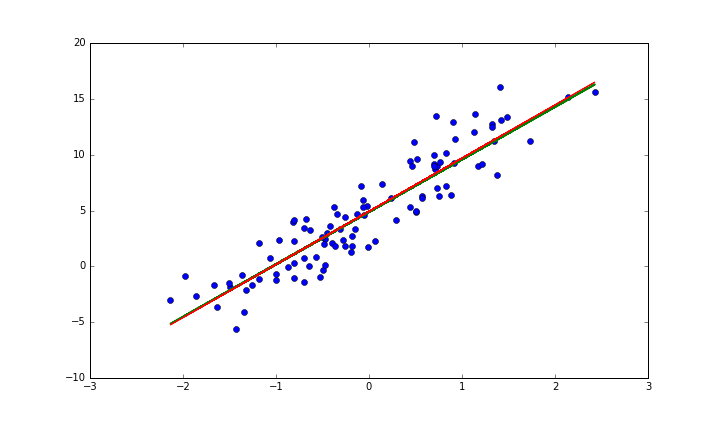
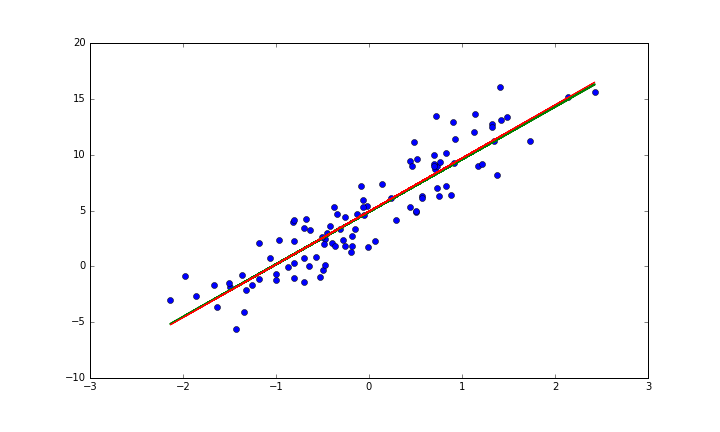
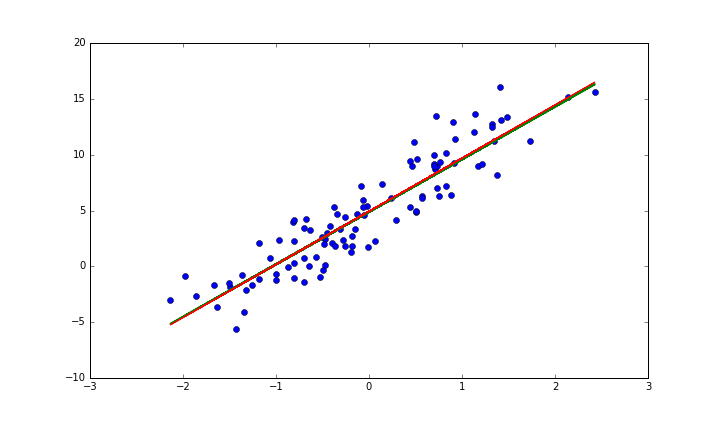
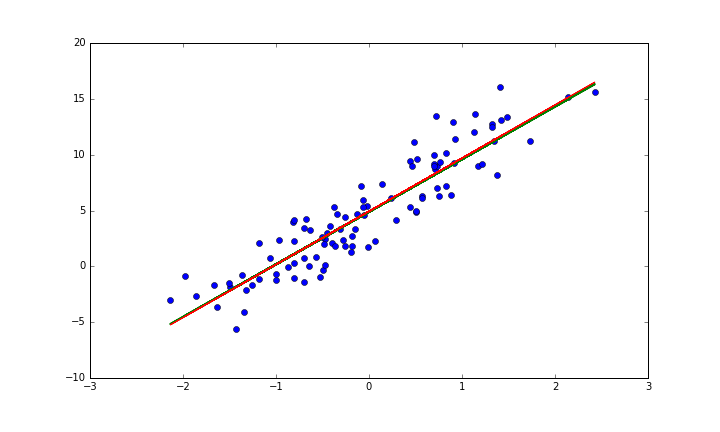
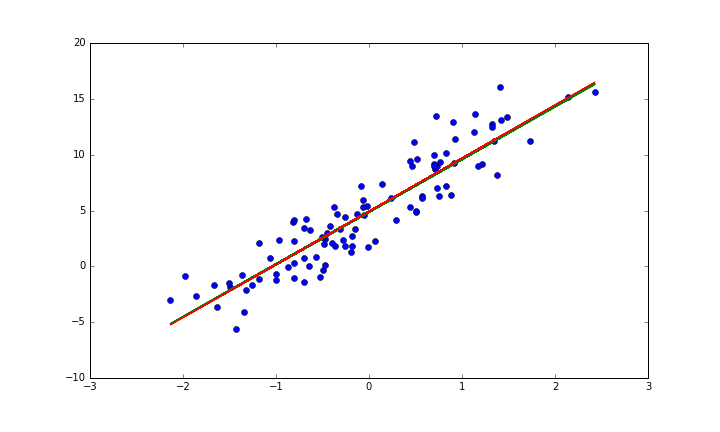
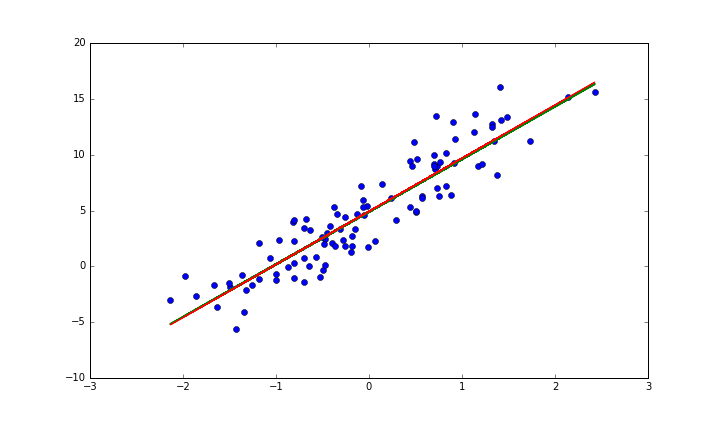
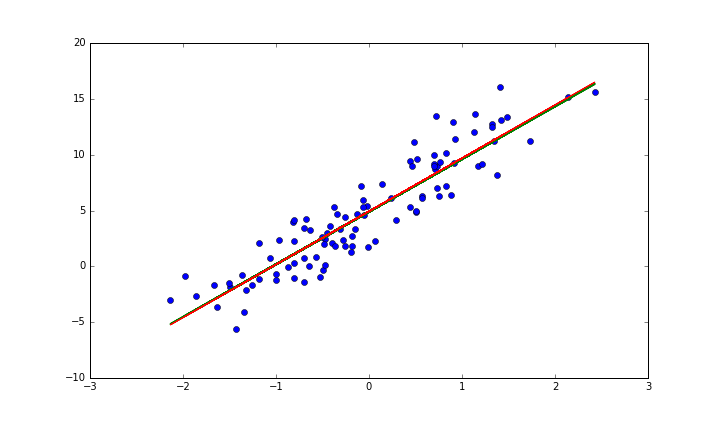
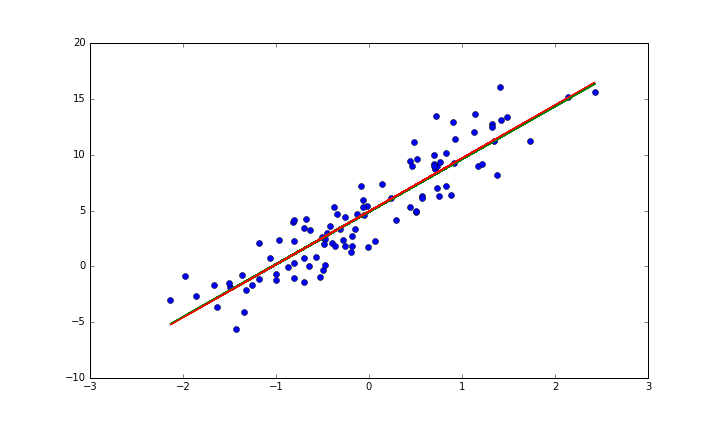
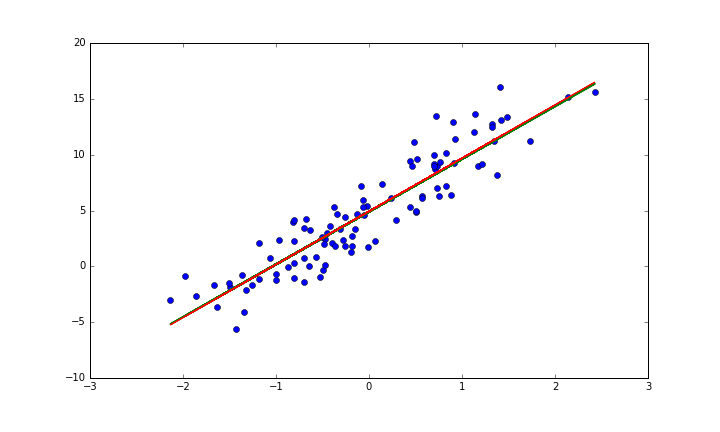
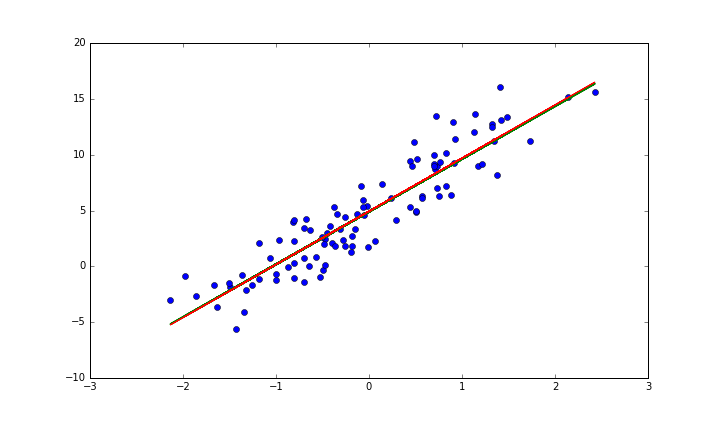
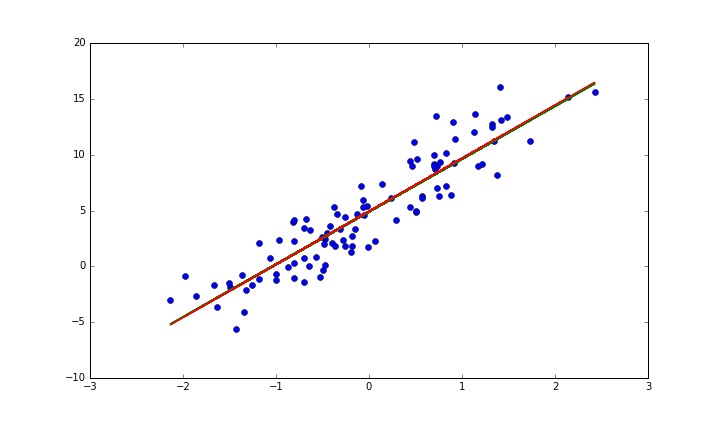
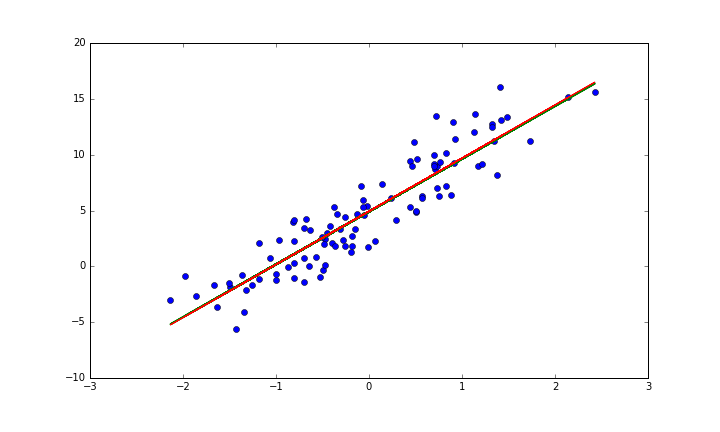
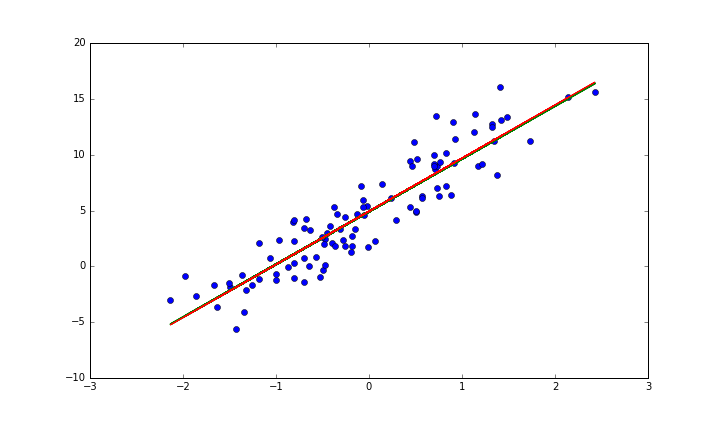
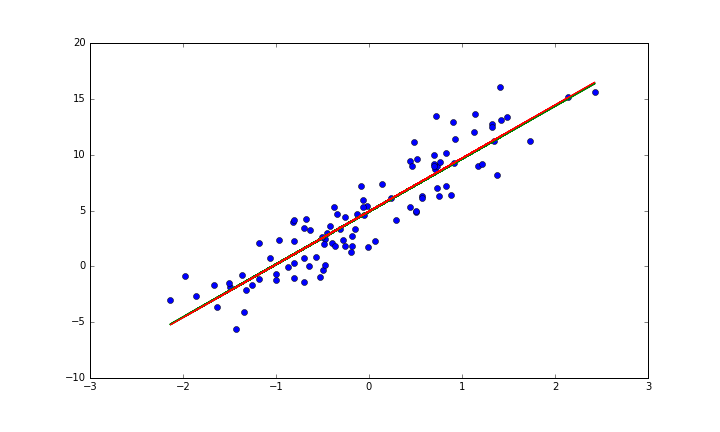
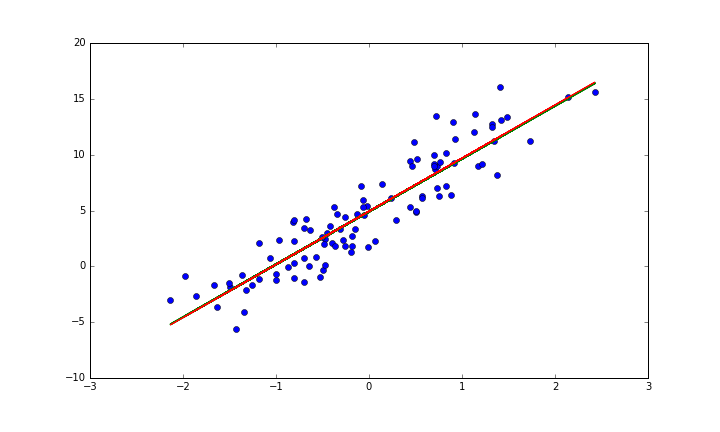
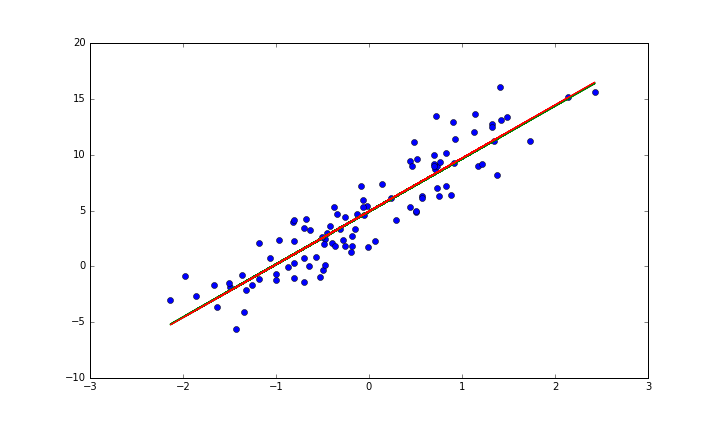
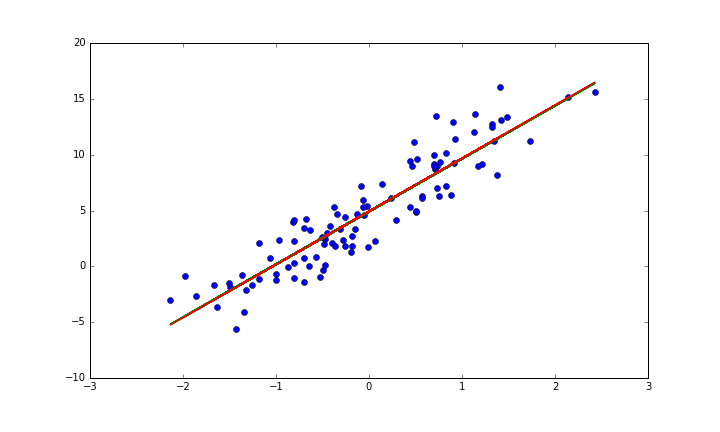
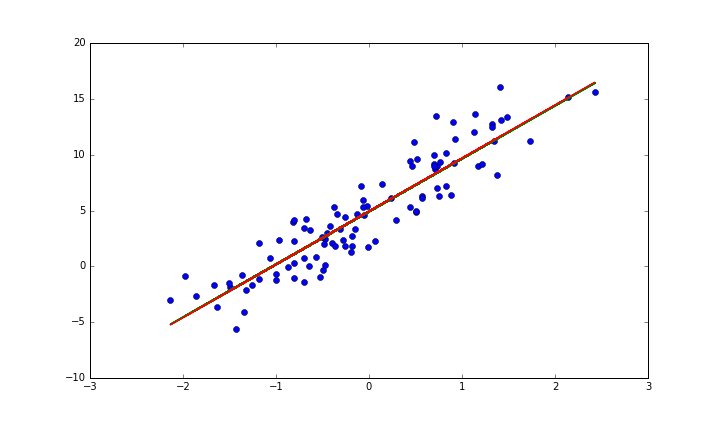
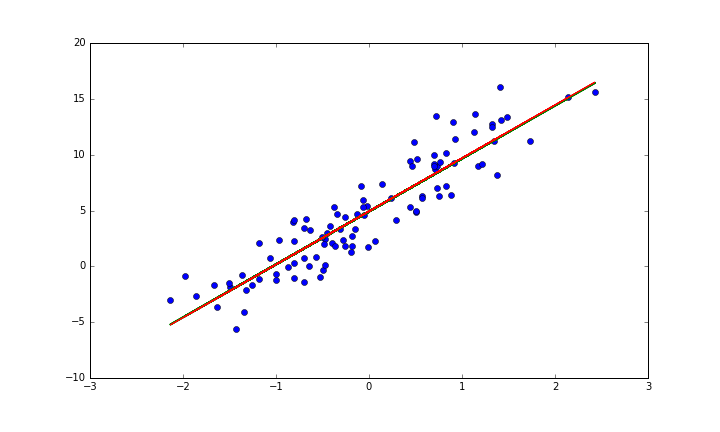
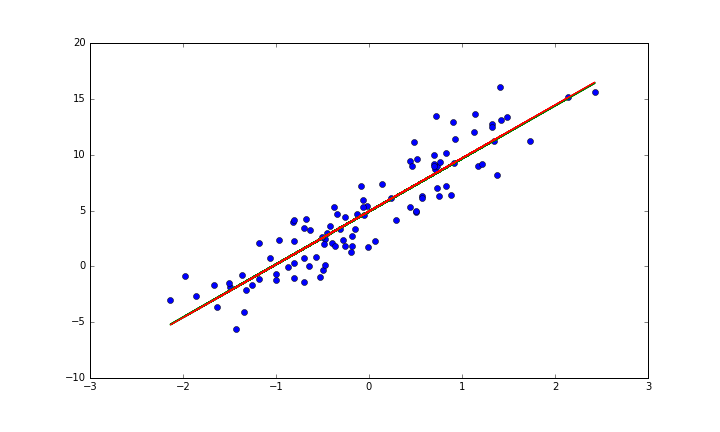
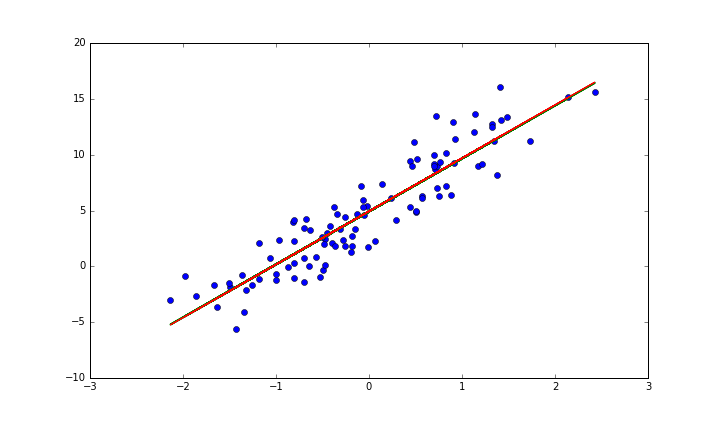
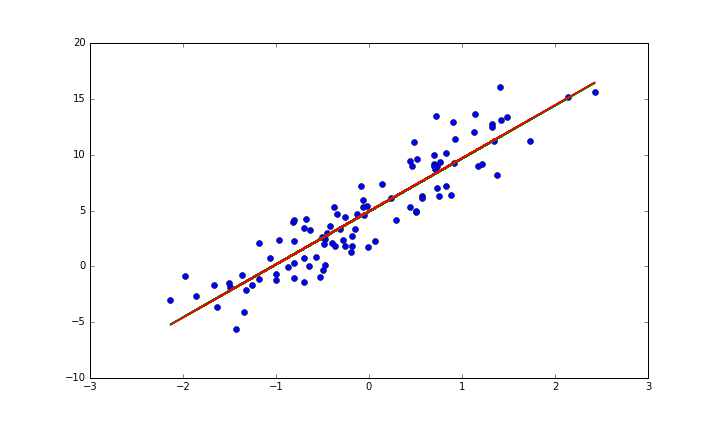
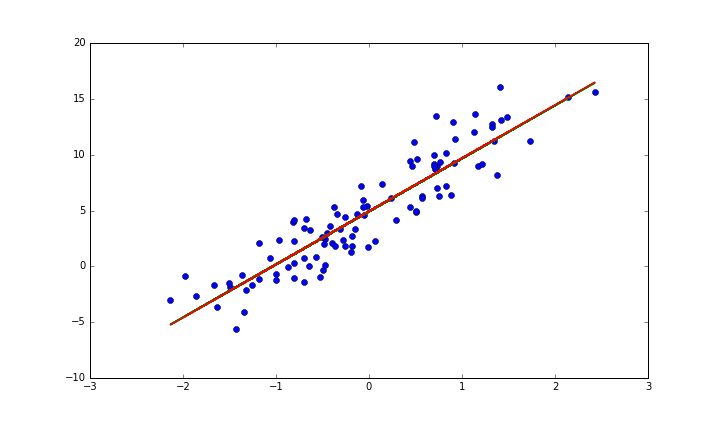
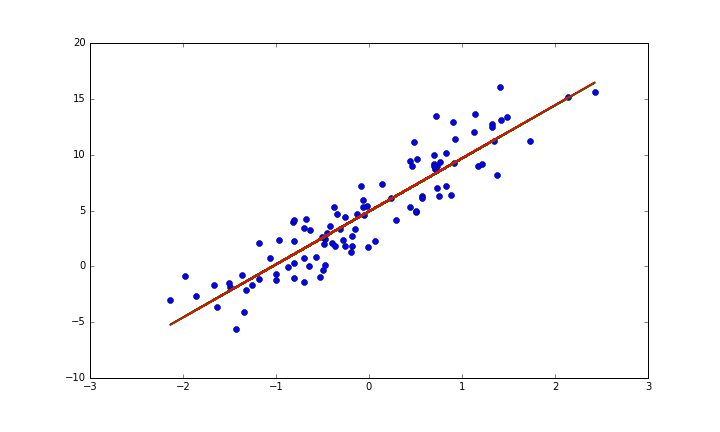
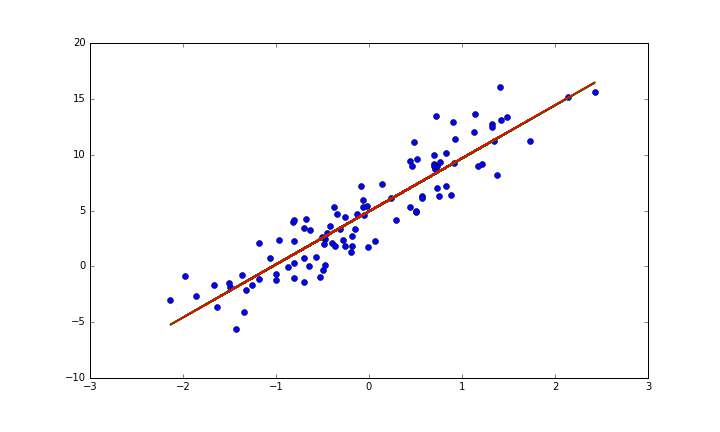
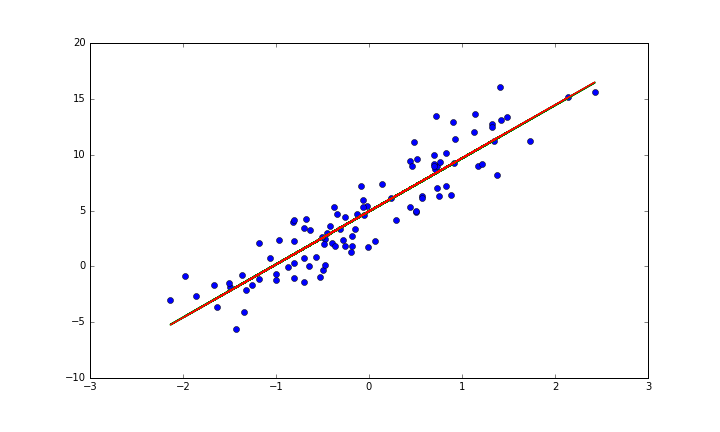
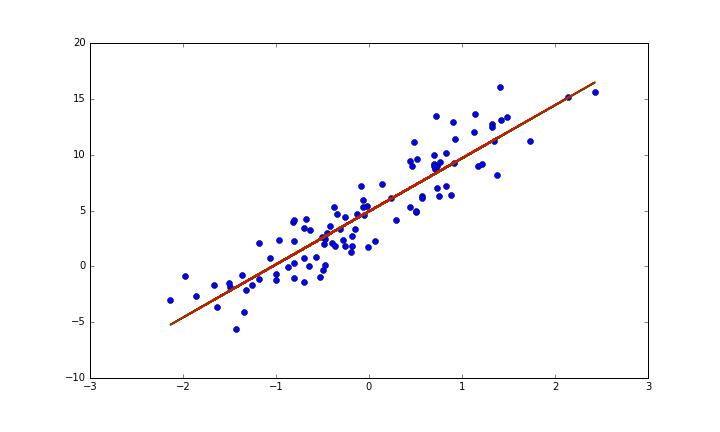
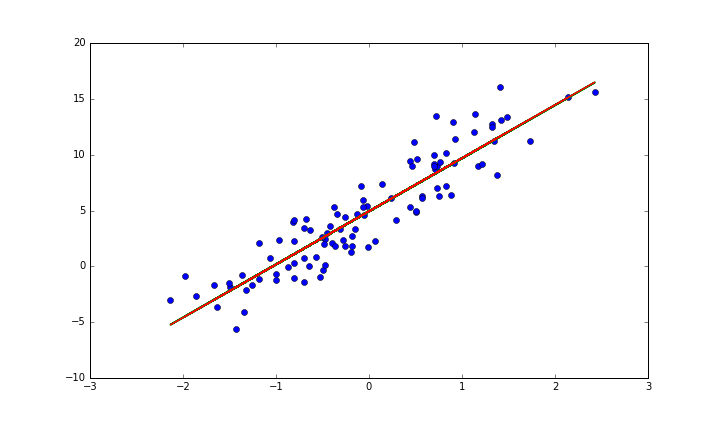
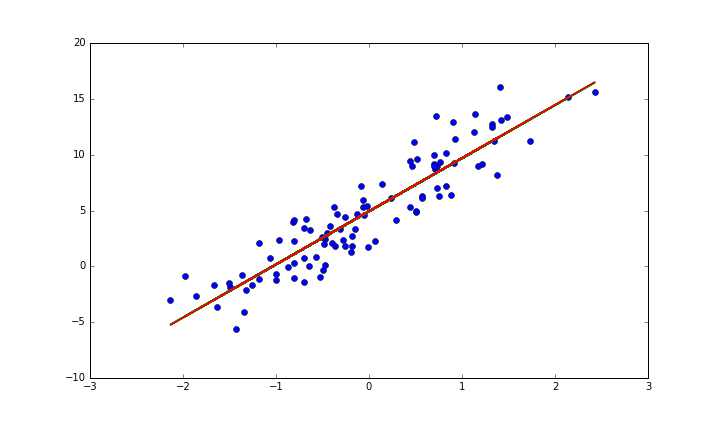
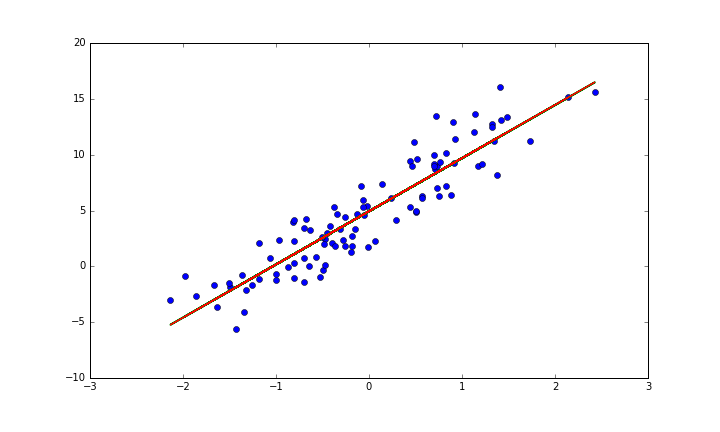
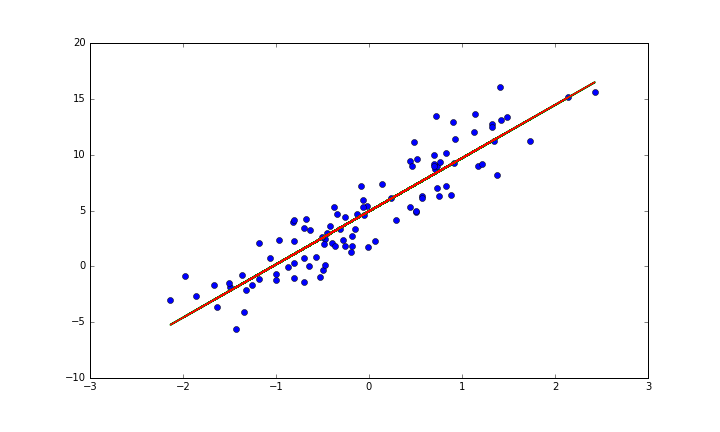
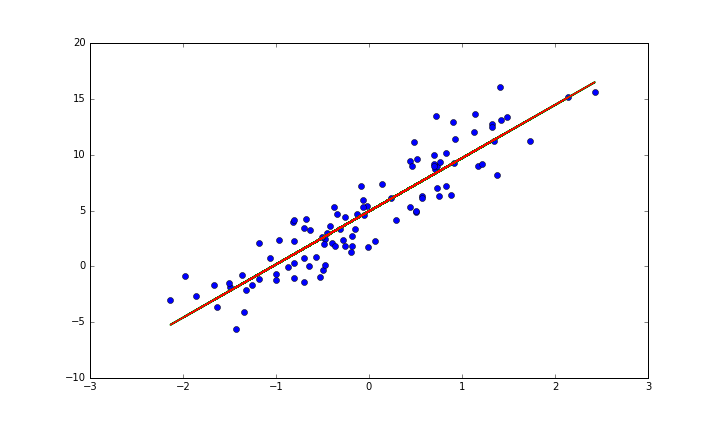
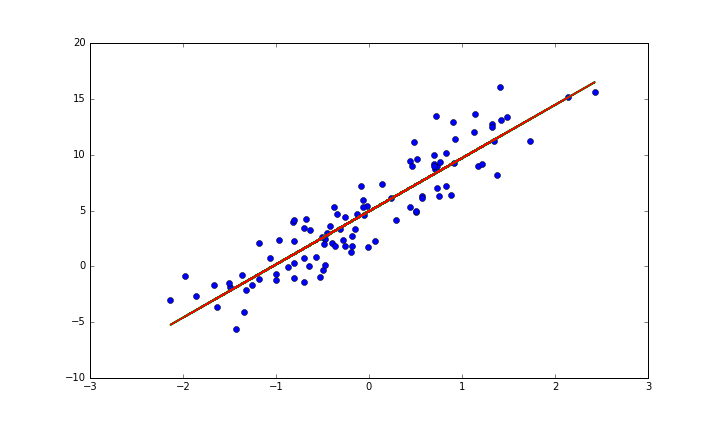

In [14]:
def animate(i):
    ys = preds[i]
    line.set_data(X[:, 0], ys)
    return line,

fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(-3, 3), ylim=(-10, 20))
ax.plot(X[:,0],y, 'o')
line, = ax.plot([], [], lw=2)
plt.plot(X[:,0], best_fit_gradient_descent, 'k-', color = "r")

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=len(preds), interval=100)